# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

#for reading and handling the dat
import pandas as pd
import numpy as np

#for visualizinng and analyzing it
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [3]:
# Importing the file porter_data_1.csv
porter_data = pd.read_csv("porter_data_1.csv")

In [4]:
#Checking shape of the Dataframe
porter_data.shape

(175777, 14)

<span style="color: blue;">The Dataset has 175,777 entries and 14 columns.</span>

In [5]:
porter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

<span style="color: blue;">`created_at` and `actual_delivery_time` are object type variables but it should be of Datetime type.</span>

In [6]:
#looking at Dataset
porter_data.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [7]:
porter_data.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

<span style="color: blue;">Looks like there are some outliers in `total_items`, `subtotal`, `min_item_price` and `max_item_price` but we can check them in further analysis.</span>

In [8]:
#checking null values
porter_data.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

<span style="color: blue;">Looks like there are no null values present in the data.</span>

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [9]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porter_data['created_at'] = pd.to_datetime(porter_data['created_at'])
porter_data['actual_delivery_time'] = pd.to_datetime(porter_data['actual_delivery_time'])

In [10]:
porter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [11]:
porter_data.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [12]:
# Convert categorical features to category type
categorical_columns = ['market_id','store_primary_category','order_protocol']

for col in categorical_columns:
    porter_data[col]=porter_data[col].astype('category')


In [13]:
porter_data.dtypes

market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

<span style="color: blue;">This ensures that the specified columns are treated as categorical variables, which is useful for encoding them later in the modeling process.</span>

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [14]:
# Calculate time taken in minutes
porter_data['delivery_time_minutes'] = (porter_data['actual_delivery_time'] - porter_data['created_at']).dt.seconds/60

In [15]:
porter_data.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_minutes  
0                      21.0     34.44                   47.0  
1                       2.0     27.60                   44.0  
2                      18.0     11.56                   55.0  
3                       8.0     31.80                   59.0  
4                       7.0      8.20                   46.0

In [16]:
porter_data.describe()

created_at           actual_delivery_time  \
count                         175777                         175777   
mean   2015-02-04 19:57:50.009631744  2015-02-04 20:44:02.190406144   
min              2015-01-21 15:22:03            2015-01-21 16:07:03   
25%              2015-01-29 01:31:19            2015-01-29 02:16:30   
50%              2015-02-05 02:41:26            2015-02-05 03:34:33   
75%              2015-02-12 01:04:32            2015-02-12 01:48:24   
max              2015-02-18 06:00:44            2015-02-18 06:51:10   
std                              NaN                            NaN   

         total_items       subtotal  num_distinct_items  min_item_price  \
count  175777.000000  175777.000000       175777.000000   175777.000000   
mean        3.204976    2697.111147            2.675060      684.965433   
min         1.000000       0.000000            1.000000      -86.000000   
25%         2.000000    1412.000000            1.000000      299.000000   
50%         3.000000    2224.000000            2.000000      595.000000   
75%         4.000000    3410.000000            3.000000      942.000000   
max       411.000000   26800.000000           20.000000    14700.000000   
std         2.674055    1828.554893            1.625681      519.882924   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   175777.000000          175777.000000       175777.000000   
mean      1160.158616              44.918664           41.861381   
min          0.000000              -4.000000           -5.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   
std        560.828571              34.544724           32.168505   

       total_outstanding_orders       distance  delivery_time_minutes  
count             175777.000000  175777.000000          175777.000000  
mean                  58.230115      21.843090              46.203013  
min                   -6.000000       0.000000              32.000000  
25%                   17.000000      15.360000              39.000000  
50%                   41.000000      21.760000              45.000000  
75%                   85.000000      28.120000              52.000000  
max                  285.000000      83.520000             110.000000  
std                   52.731043       8.748712               9.327424

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [17]:
# Extract the hour and day of week from the 'created_at' timestamp
porter_data['order_hour'] = porter_data['created_at'].dt.hour
porter_data['order_day_of_week'] = porter_data['created_at'].dt.dayofweek

In [18]:
porter_data.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_minutes  order_hour  \
0                      21.0     34.44                   47.0          22   
1                       2.0     27.60                   44.0          21   
2                      18.0     11.56                   55.0           0   
3                       8.0     31.80                   59.0           3   
4                       7.0      8.20                   46.0           2   

   order_day_of_week  
0                  4  
1                  1  
2                  0  
3                  3  
4                  1

In [19]:
# Create a categorical feature 'isWeekend' (1 if Saturday or Sunday, else 0)
porter_data['isWeekend'] = porter_data['order_day_of_week'].apply(lambda x: 1 if x>=5 else 0)

In [20]:
porter_data.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_minutes  order_hour  \
0                      21.0     34.44                   47.0          22   
1                       2.0     27.60                   44.0          21   
2                      18.0     11.56                   55.0           0   
3                       8.0     31.80                   59.0           3   
4                       7.0      8.20                   46.0           2   

   order_day_of_week  isWeekend  
0                  4          0  
1                  1          0  
2                  0          0  
3                  3          0  
4                  1          0

<span style="color: blue;">Since we have created `delivery_time_minutes`, `order_hour`, `order_day_of_week` and  `isWeekend` columns, we will drop `created_at` and  `actual_delivery_time` as they are not necessary anymore.</span>

<span style="color: blue;">Also, there will be no impact of Category of the restaurant (e.g., fast food, dine-in) on the delivery time. Hence, dropping `store_primary_category` column too.</span>

In [21]:
# Drop unnecessary columns
porter_data.drop(['created_at','actual_delivery_time'], axis=1, inplace=True)
porter_data.drop(['store_primary_category'], axis=1, inplace=True)

In [22]:
porter_data.head()

market_id order_protocol  total_items  subtotal  num_distinct_items  \
0       1.0            1.0            4      3441                   4   
1       2.0            2.0            1      1900                   1   
2       2.0            3.0            4      4771                   3   
3       1.0            1.0            1      1525                   1   
4       1.0            1.0            2      3620                   2   

   min_item_price  max_item_price  total_onshift_dashers  total_busy_dashers  \
0             557            1239                   33.0                14.0   
1            1400            1400                    1.0                 2.0   
2             820            1604                    8.0                 6.0   
3            1525            1525                    5.0                 6.0   
4            1425            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_minutes  order_hour  \
0                      21.0     34.44                   47.0          22   
1                       2.0     27.60                   44.0          21   
2                      18.0     11.56                   55.0           0   
3                       8.0     31.80                   59.0           3   
4                       7.0      8.20                   46.0           2   

   order_day_of_week  isWeekend  
0                  4          0  
1                  1          0  
2                  0          0  
3                  3          0  
4                  1          0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [23]:
# Define target variable (y) and features (X)
y = porter_data.pop('delivery_time_minutes')
X = porter_data

In [24]:
X.head()

market_id order_protocol  total_items  subtotal  num_distinct_items  \
0       1.0            1.0            4      3441                   4   
1       2.0            2.0            1      1900                   1   
2       2.0            3.0            4      4771                   3   
3       1.0            1.0            1      1525                   1   
4       1.0            1.0            2      3620                   2   

   min_item_price  max_item_price  total_onshift_dashers  total_busy_dashers  \
0             557            1239                   33.0                14.0   
1            1400            1400                    1.0                 2.0   
2             820            1604                    8.0                 6.0   
3            1525            1525                    5.0                 6.0   
4            1425            2195                    5.0                 5.0   

   total_outstanding_orders  distance  order_hour  order_day_of_week  \
0                      21.0     34.44          22                  4   
1                       2.0     27.60          21                  1   
2                      18.0     11.56           0                  0   
3                       8.0     31.80           3                  3   
4                       7.0      8.20           2                  1   

   isWeekend  
0          0  
1          0  
2          0  
3          0  
4          0

In [25]:
y.head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: delivery_time_minutes, dtype: float64

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [26]:
# Split data into training and testing sets
# Creating train dataset with 80% of the rows.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140621, 14), (35156, 14), (140621,), (35156,))

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [28]:
# Define numerical and categorical columns for easy EDA and data manipulation
cat_cols = ['market_id', 'order_protocol', 'order_hour', 'order_day_of_week', 'isWeekend']

num_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

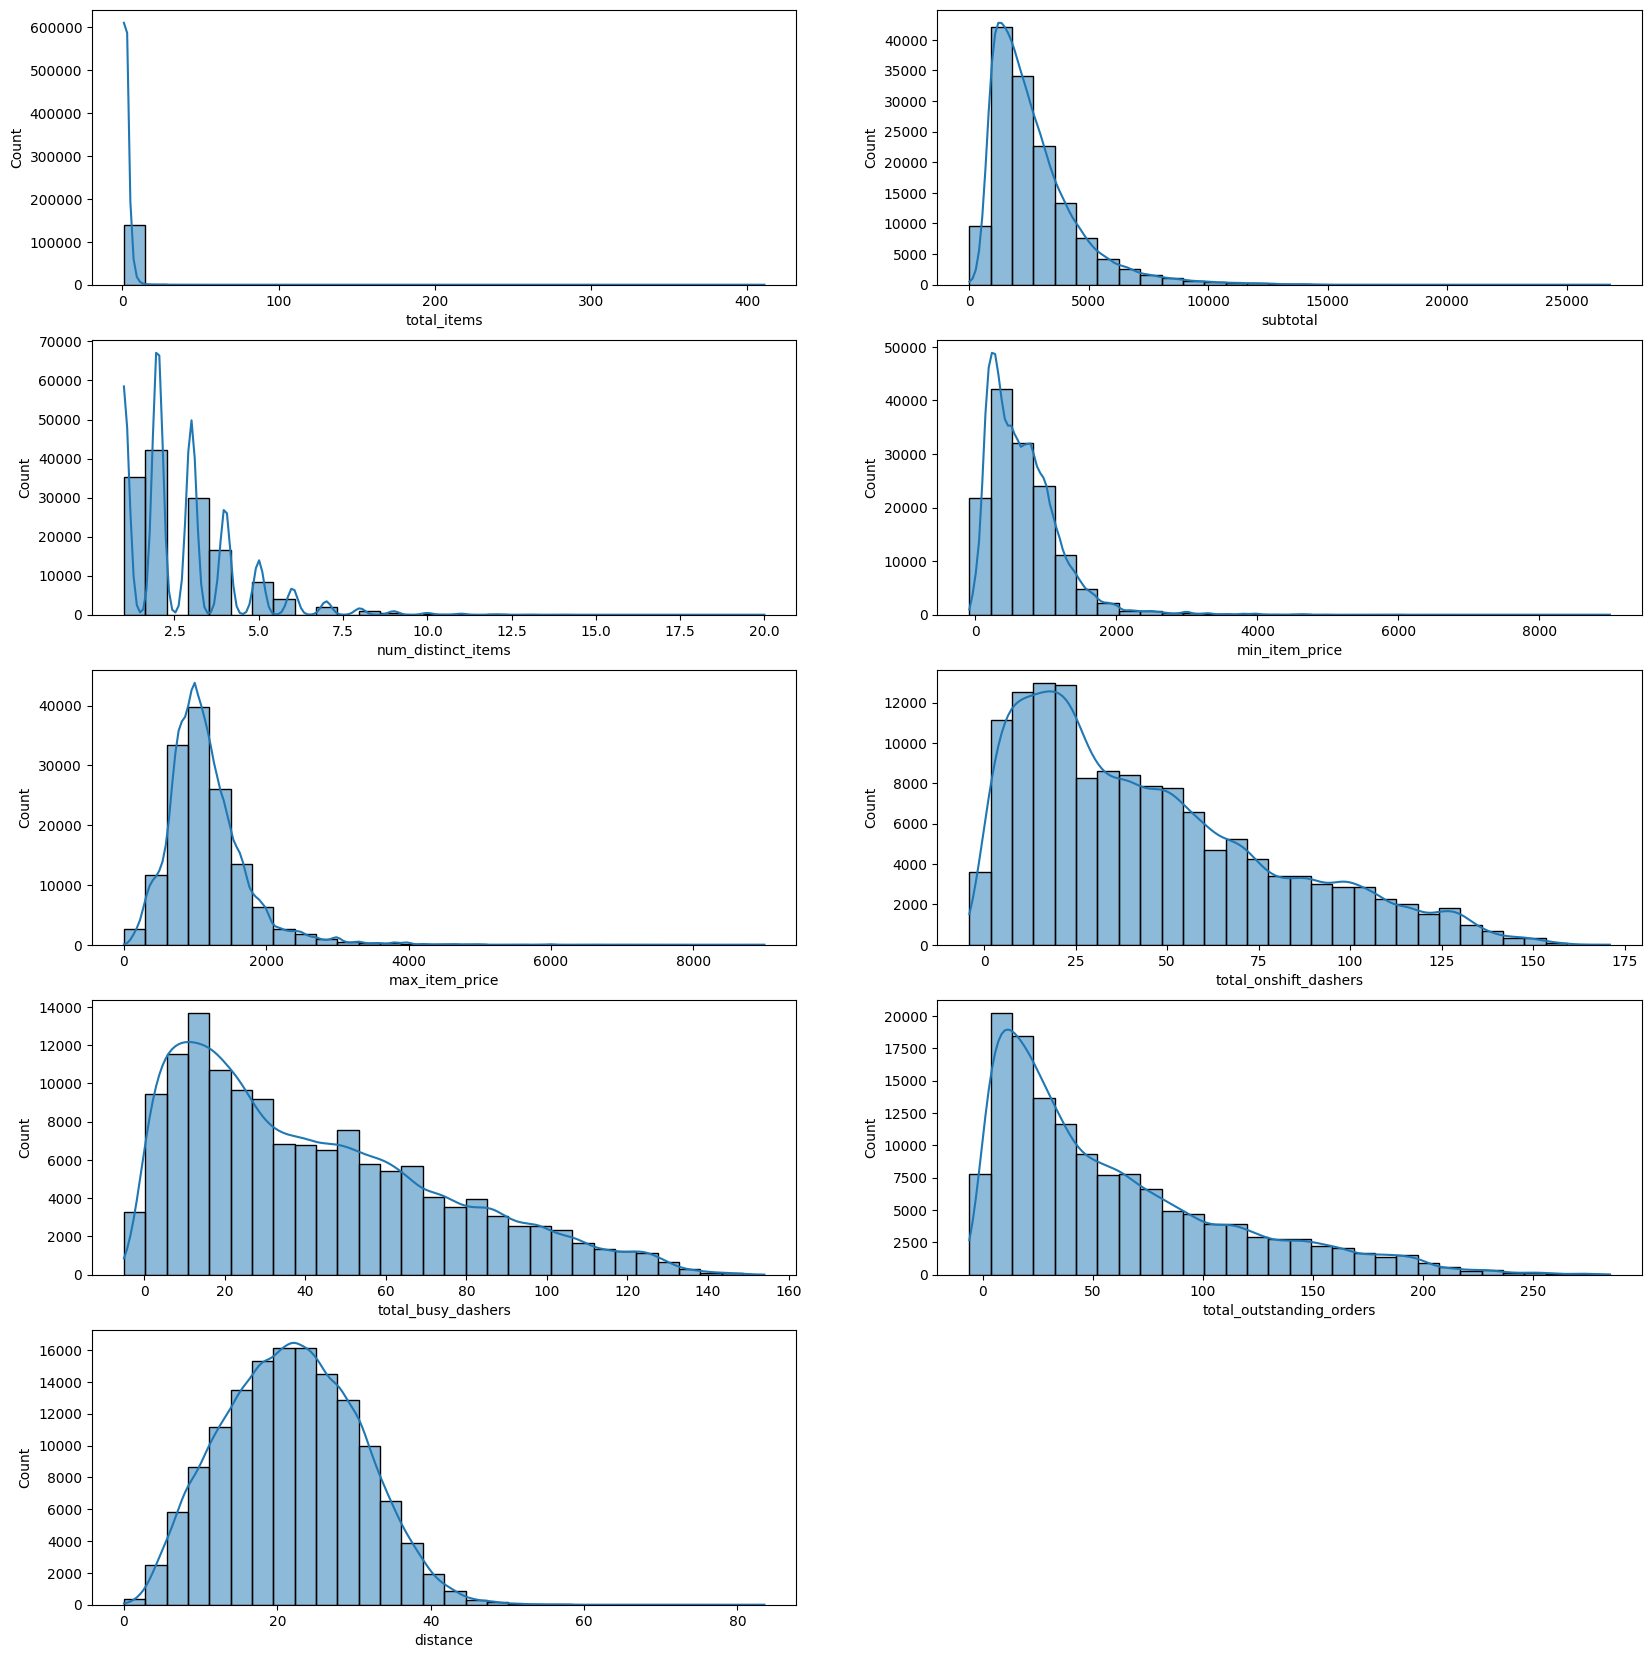

In [29]:
# Plot distributions for all numerical columns
plt.figure(figsize=(20, 25))
i = 1
for var in num_cols:
    plt.subplot(6,2,i)
    sns.histplot(X_train[var], bins=30, kde=True)
    i += 1
plt.show()

<span style="color: blue;">I can see that almost all plots are heavily right skewed. This skewness of data will be handled when we remove outliers and scale the data.</span>

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

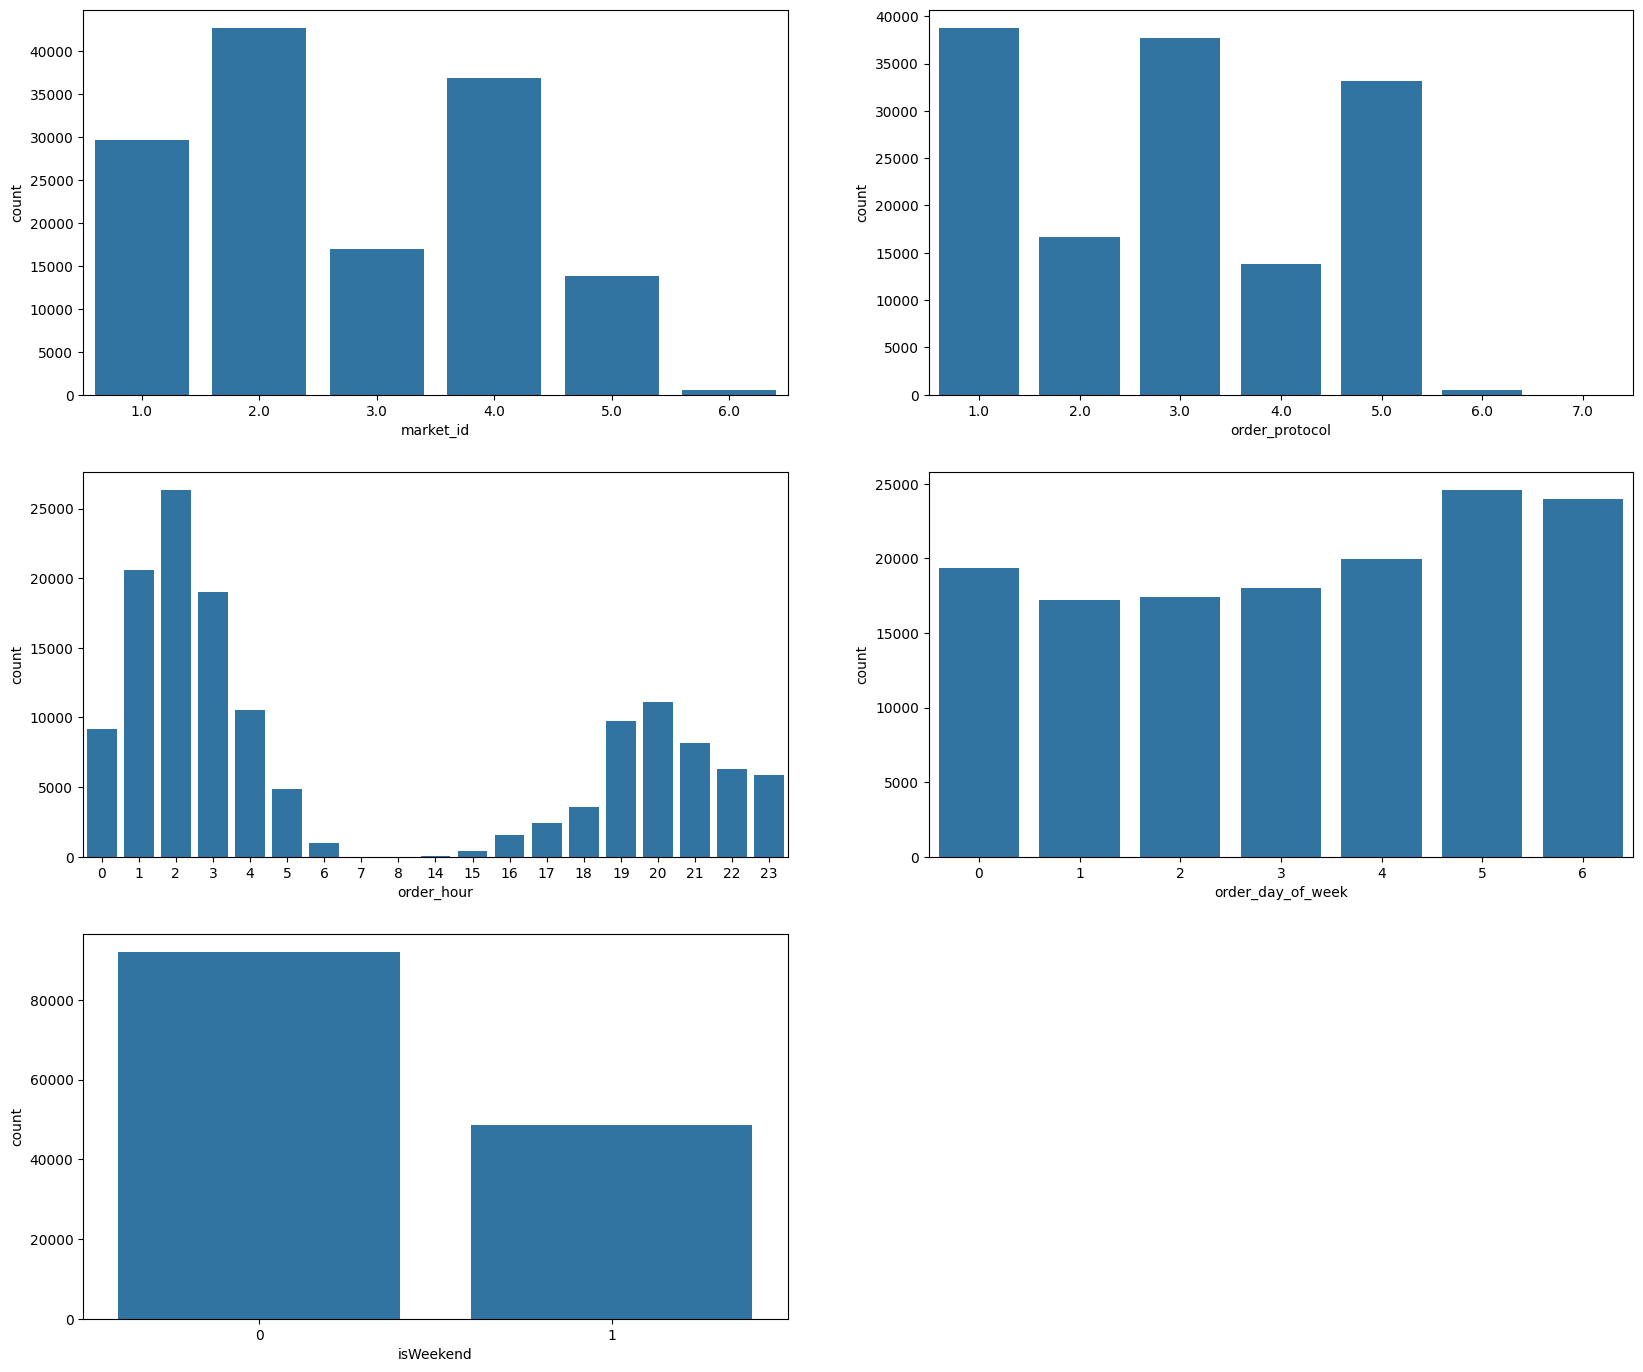

In [30]:
# Distribution of categorical columns
plt.figure(figsize=(20, 35))
i = 1
for var in cat_cols:
    plt.subplot(6,2,i)
    sns.countplot(data=X_train, x=var)
    i += 1
plt.show()

<span style="color: blue;">Insights from the count plots.</span>
- Market IDs 2 and 4 dominate the dataset with highest number of orders.
- Most of the orders have been made through protocols 1, 3 and 5.
- Its weird to see that more no. of the orders have been made in the early hours of day which 1, 2 and 3. We also do not have any information on orders after 7:00 until 14:00.
- Its no surprise that maximum of the orders are during weekends.

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

<Axes: xlabel='delivery_time_minutes', ylabel='Count'>

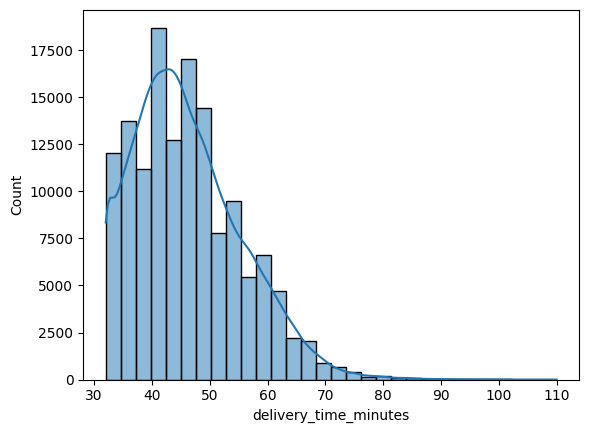

In [31]:
# Distribution of time_taken

sns.histplot(y_train, bins=30, kde=True)

<span style="color: blue;">The target variable `delivery_time_minutes` appears to be fairly normally distributed, but with some potential outliers.</span>

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

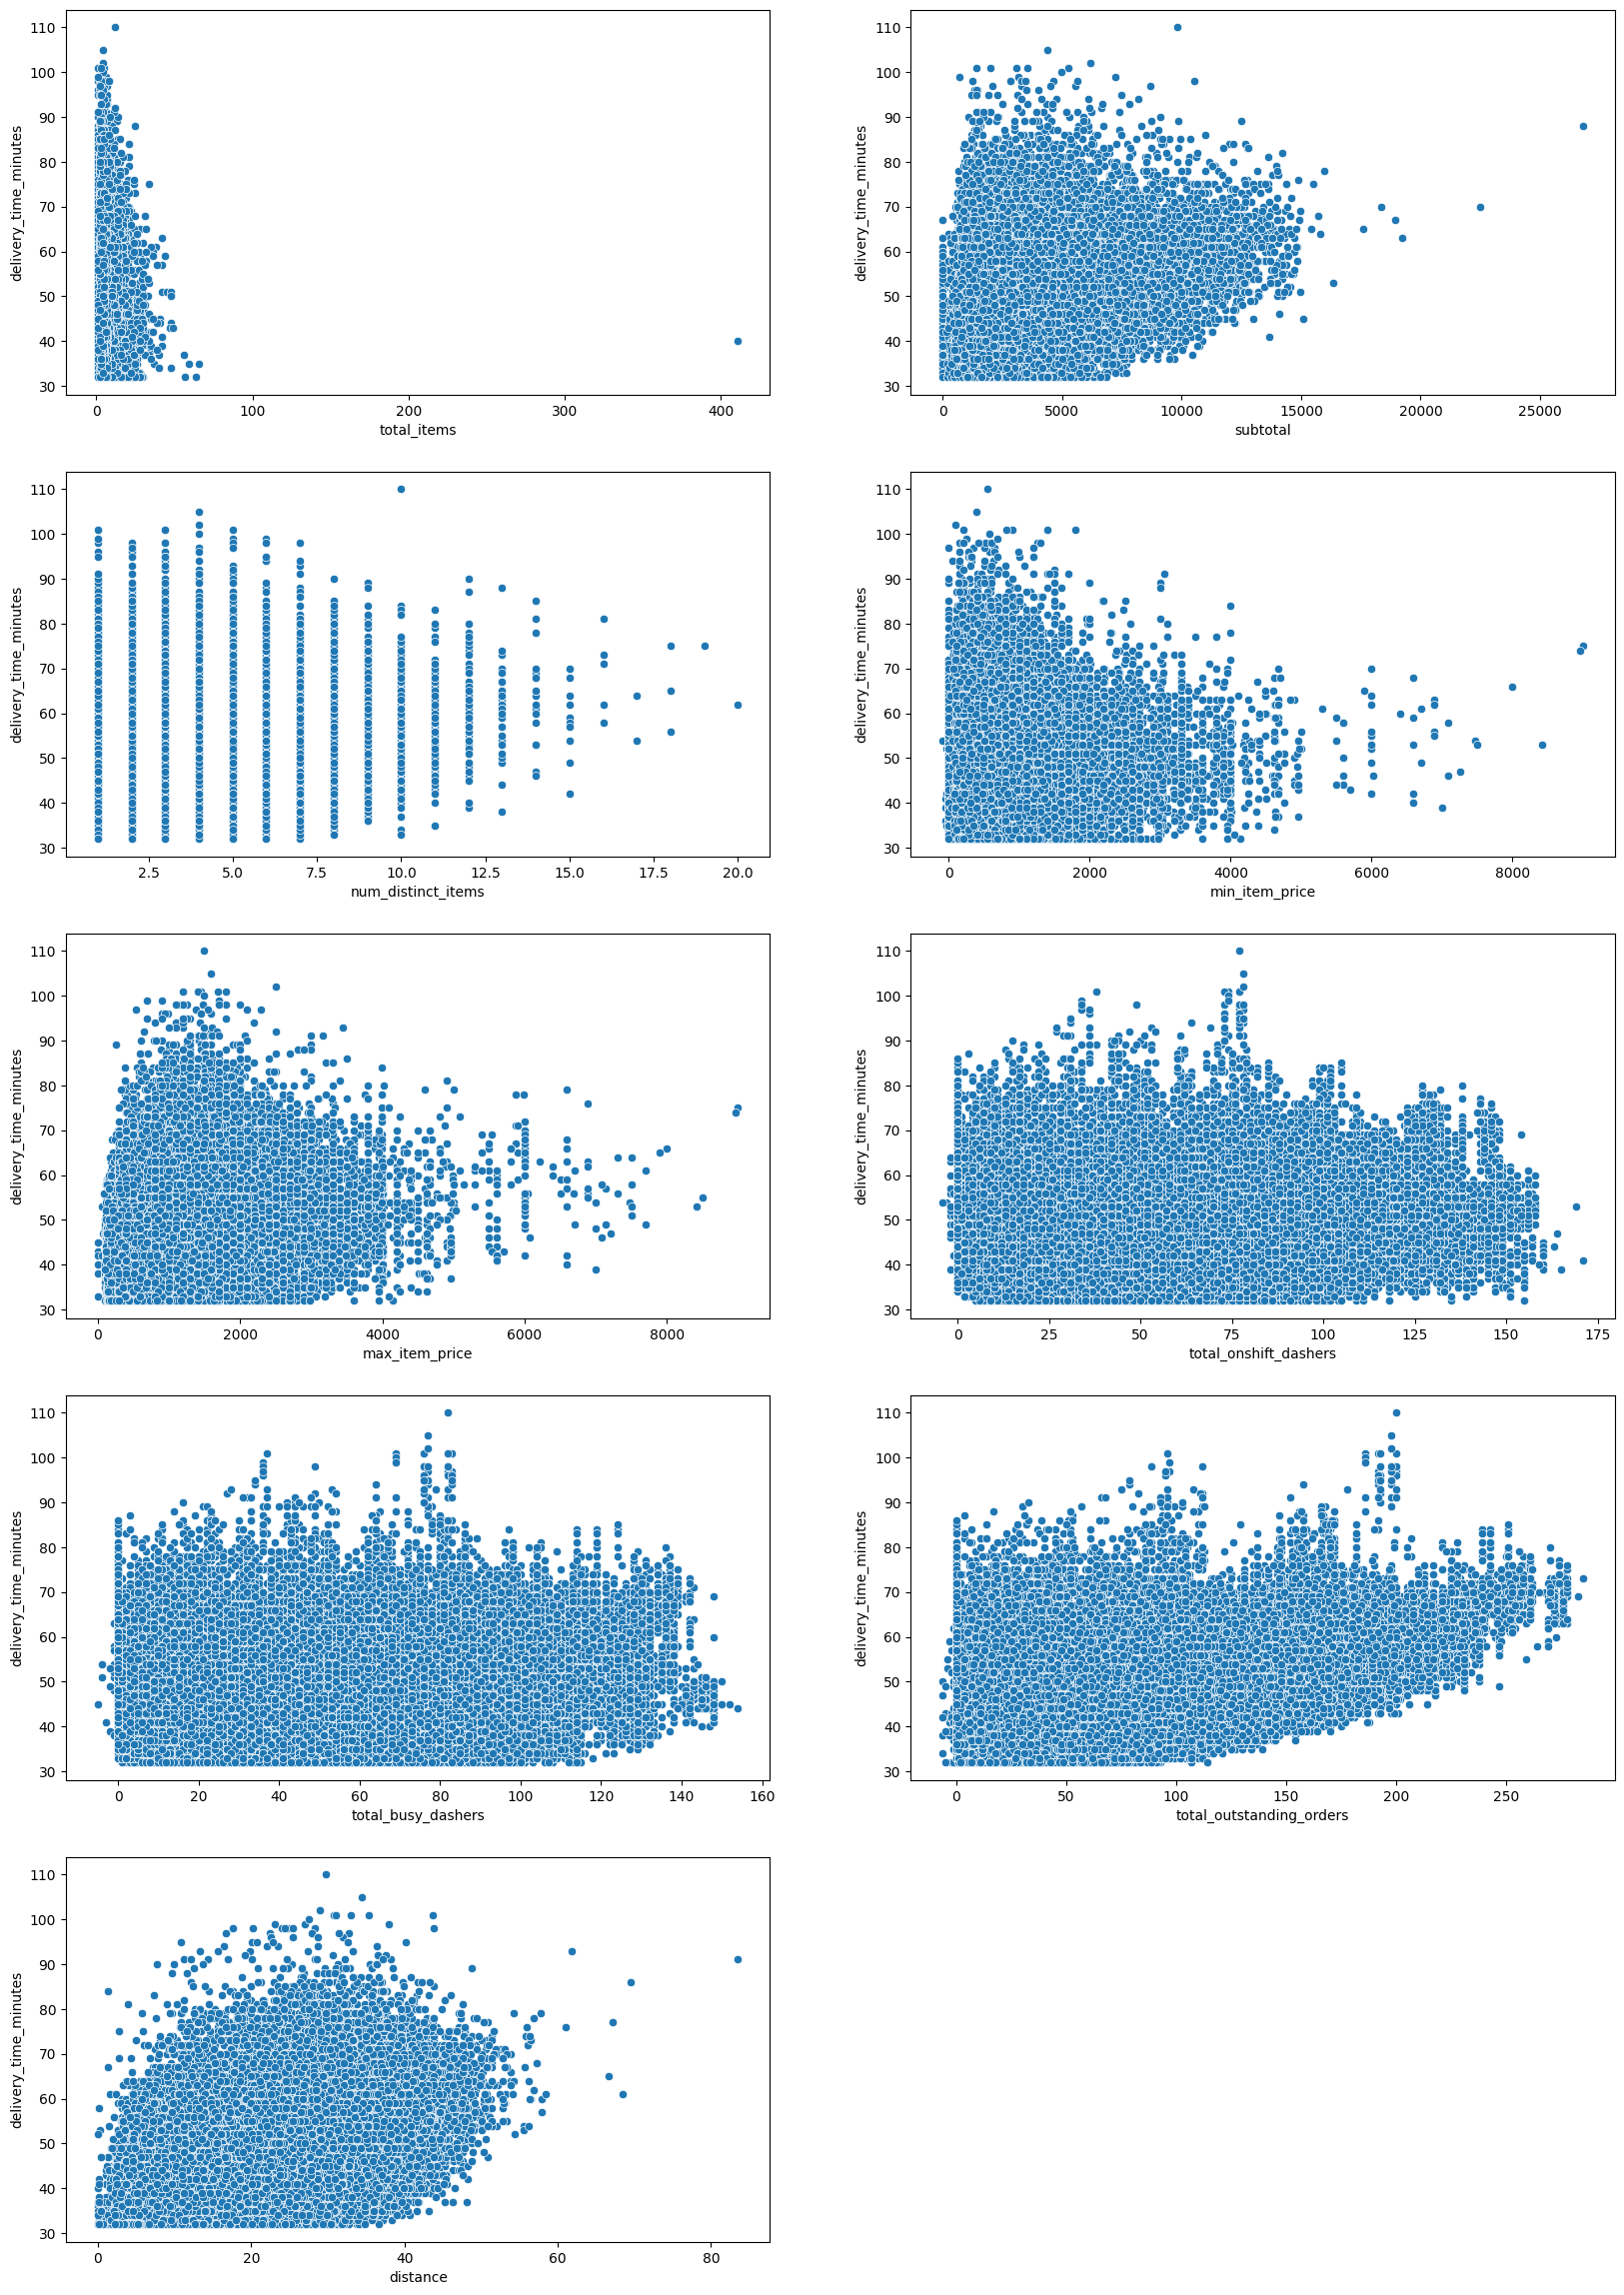

In [32]:
# Scatter plot to visualise the relationship between time_taken and numerical features
plt.figure(figsize=(20, 35))
i = 1
for var in num_cols:
    plt.subplot(6,2,i)
    sns.scatterplot(x=X_train[var], y=y_train)
    i += 1
plt.show()

<span style="color: blue;">From above we can see that most of the Numerical Features have relationship with Delivery time except Number of distinct items and from above scatter plots we can understand that **Distance** is having good positive relationship with **Delivery time**. </span>

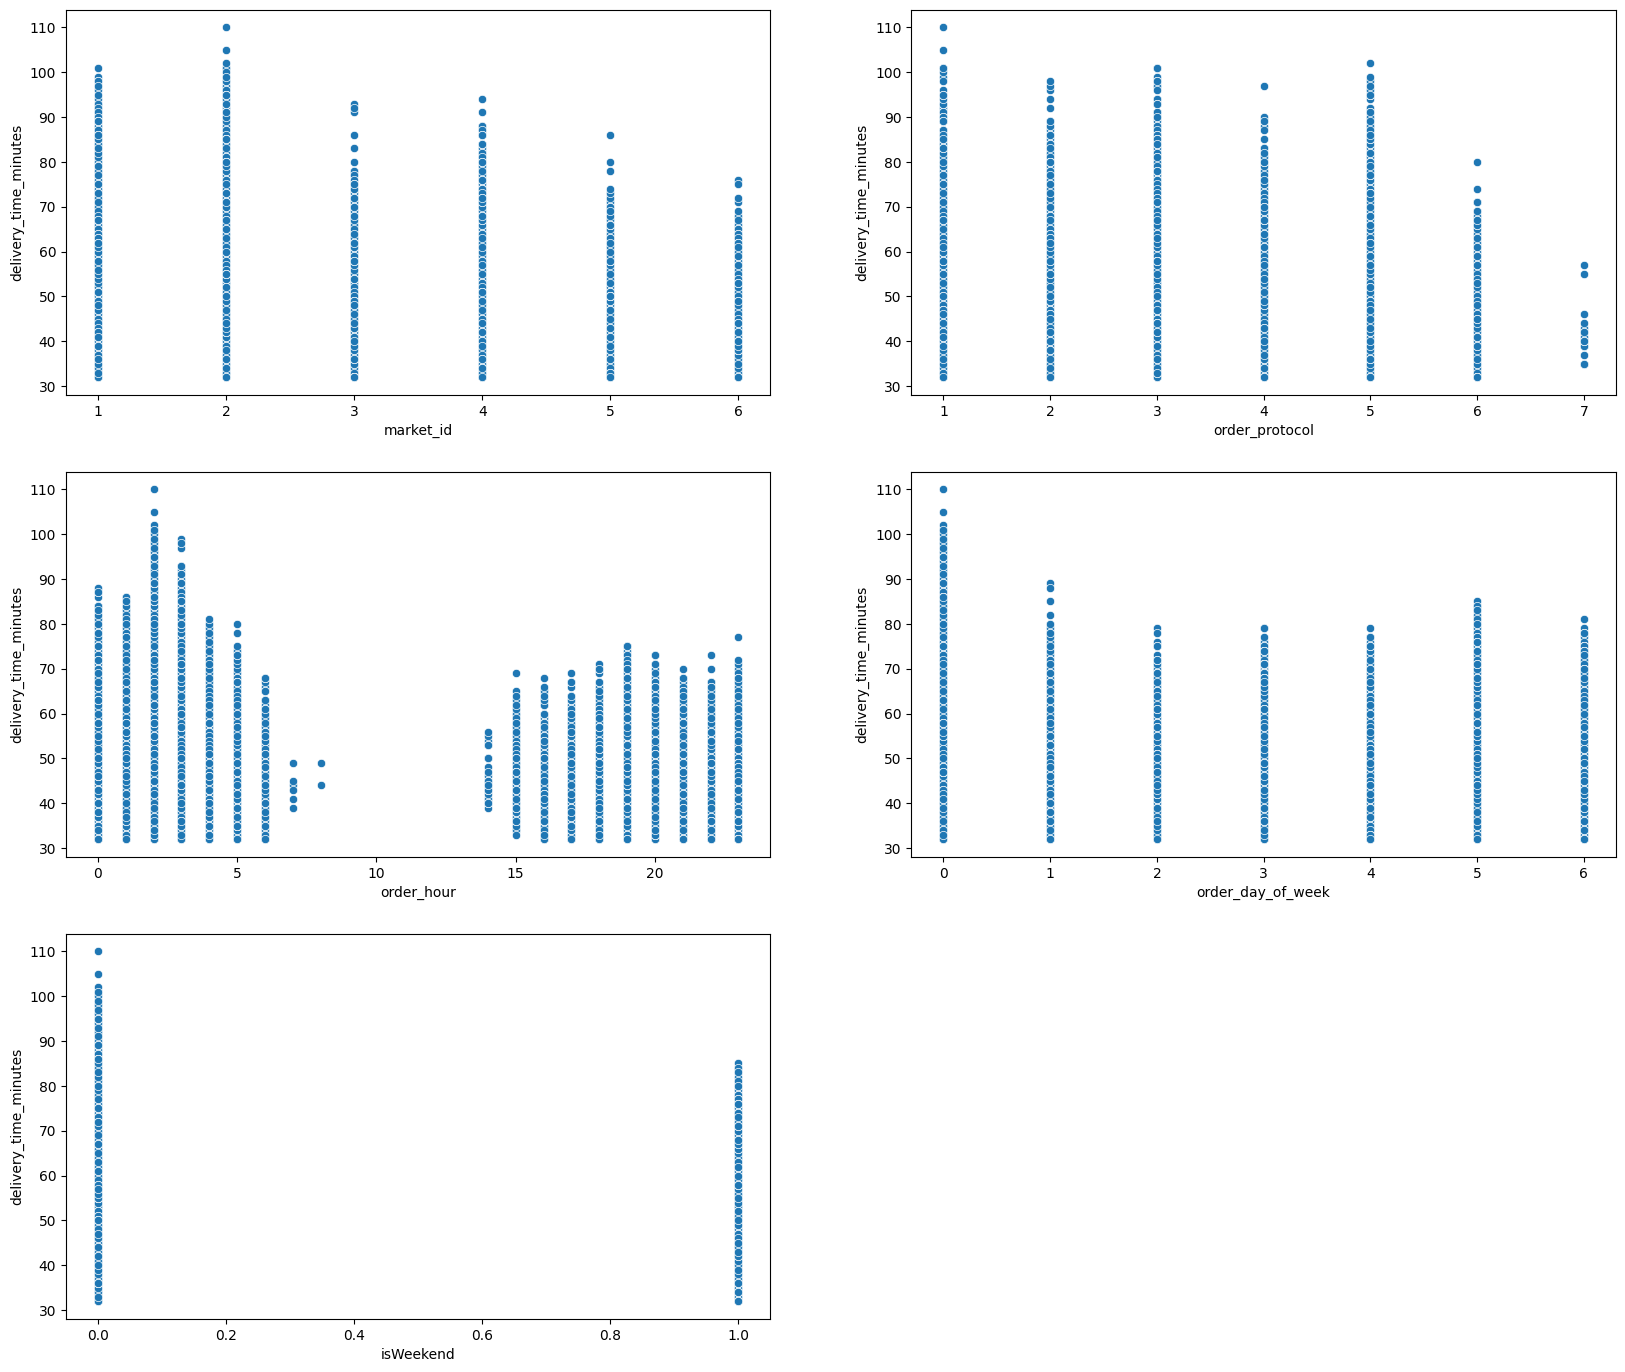

In [33]:
# Scatter plot to visualise the relationship between time_taken and categorical features
plt.figure(figsize=(20, 35))
i = 1
for var in cat_cols:
    plt.subplot(6,2,i)
    sns.scatterplot(x=X_train[var], y=y_train)
    i += 1
plt.show()

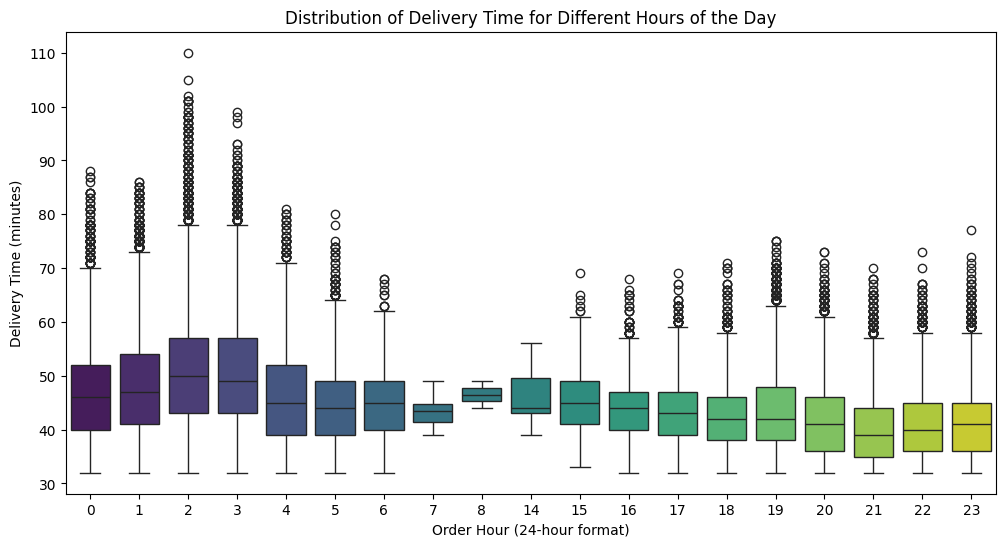

In [34]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 6))

# Create a boxplot to show the time_taken for different hours
sns.boxplot(x=X_train['order_hour'], y=y_train, palette="viridis")

# Set labels and title
plt.xlabel("Order Hour (24-hour format)")
plt.ylabel("Delivery Time (minutes)")
plt.title("Distribution of Delivery Time for Different Hours of the Day")

plt.show()

<span style="color: blue;">This shows average delivery time for every hour. For most of the hours the **average delivery time is between 40 to 50 mins**. The **peak hours** where it is taking more time for delivery are **midnight 1 AM to 4 AM**.</span>

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

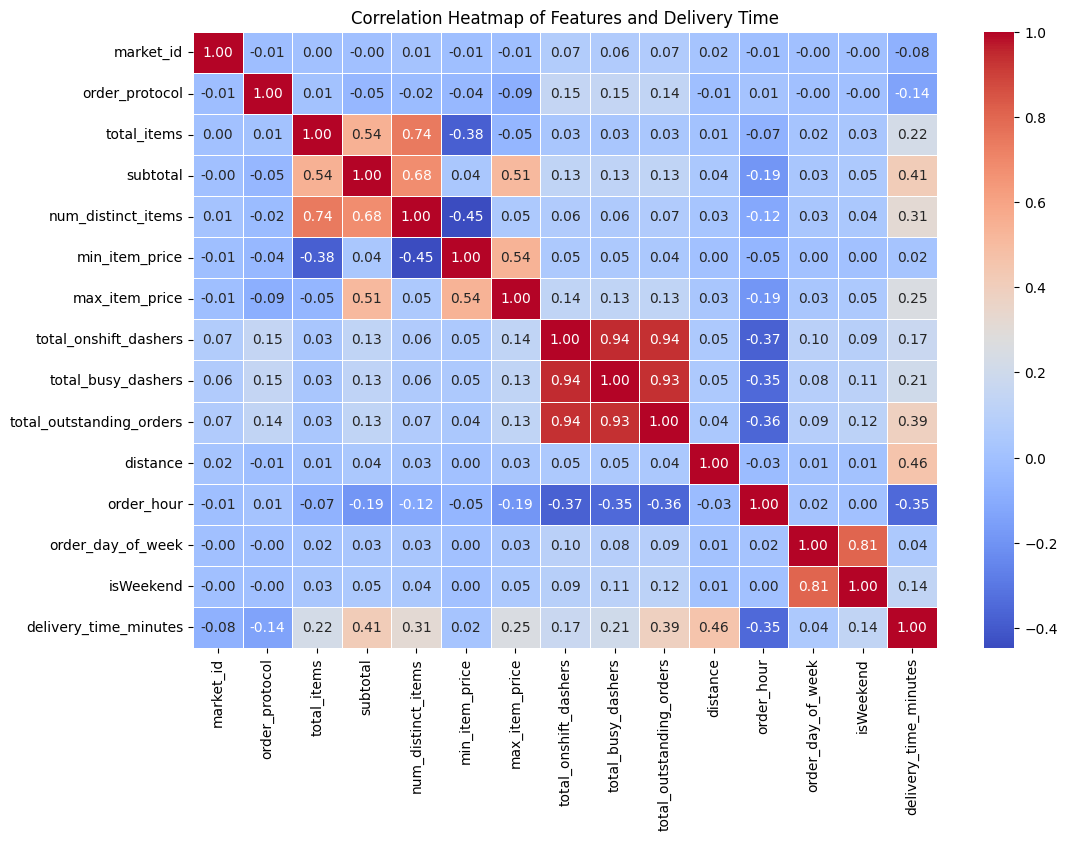

In [35]:
# Plot the heatmap of the correlation matrix
# Combine X_train and y_train for correlation analysis
train_corr = X_train.copy()
train_corr['delivery_time_minutes'] = y_train

# Compute correlation matrix
corr_matrix = train_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set title
plt.title("Correlation Heatmap of Features and Delivery Time")
plt.show()

<span style="color: blue;">From above heatmap we can see that `distance` is having 46% correlation with `delivery_time_minutes` followed by `subtotal` 41% and `total_outstanding_orders` 39% correlation.</span>

<span style="color: blue;">Some independent variables are correlated to each other, which shows **Multicollinearity** like: </span>
- <span style="color: blue;">total_items and num_distinct_items</span>
- <span style="color: blue;">min_item_price and max_item_price</span>
- <span style="color: blue;">total_onshift_dashers, total_busy_dashers and total_outstanding_orders</span>
- <span style="color: blue;">order_day_of_week and isWeekend</span>

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [36]:
# Drop 3-5 weakly correlated columns from training dataset
# Set a correlation threshold
threshold = 0.1

# Find features with weak correlation (absolute value < threshold)
weak_features = corr_matrix['delivery_time_minutes'][abs(corr_matrix['delivery_time_minutes']) < threshold].index

print(f"Dropping features due to weak correlation: {list(weak_features)}")

# Drop weak features from X_train and X_test
X_train_filter = X_train.drop(columns=weak_features)

Dropping features due to weak correlation: ['market_id', 'min_item_price', 'order_day_of_week']


In [37]:
X_train_filter.head()

order_protocol  total_items  subtotal  num_distinct_items  \
102712            2.0            1       820                   1   
94576             3.0            1       995                   1   
49784             3.0            4      2040                   4   
37753             1.0            2      2376                   2   
91728             1.0            1      1430                   1   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
102712             745                   35.0                39.0   
94576              995                  110.0                72.0   
49784              895                    6.0                 3.0   
37753             1399                   16.0                17.0   
91728             1320                   64.0                47.0   

        total_outstanding_orders  distance  order_hour  isWeekend  
102712                      56.0     30.32          21          0  
94576                      116.0     31.16           2          0  
49784                        7.0     18.16          21          0  
37753                       19.0     33.44           3          0  
91728                       52.0     31.56          21          0

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [38]:
# Boxplot for time_taken
# defining the categorical columns and numerical columns after dropping some columns
cat_cols = ['order_protocol', 'order_hour', 'isWeekend']

num_cols = ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

In [39]:
X_train_filter.shape, y_train.shape

((140621, 11), (140621,))

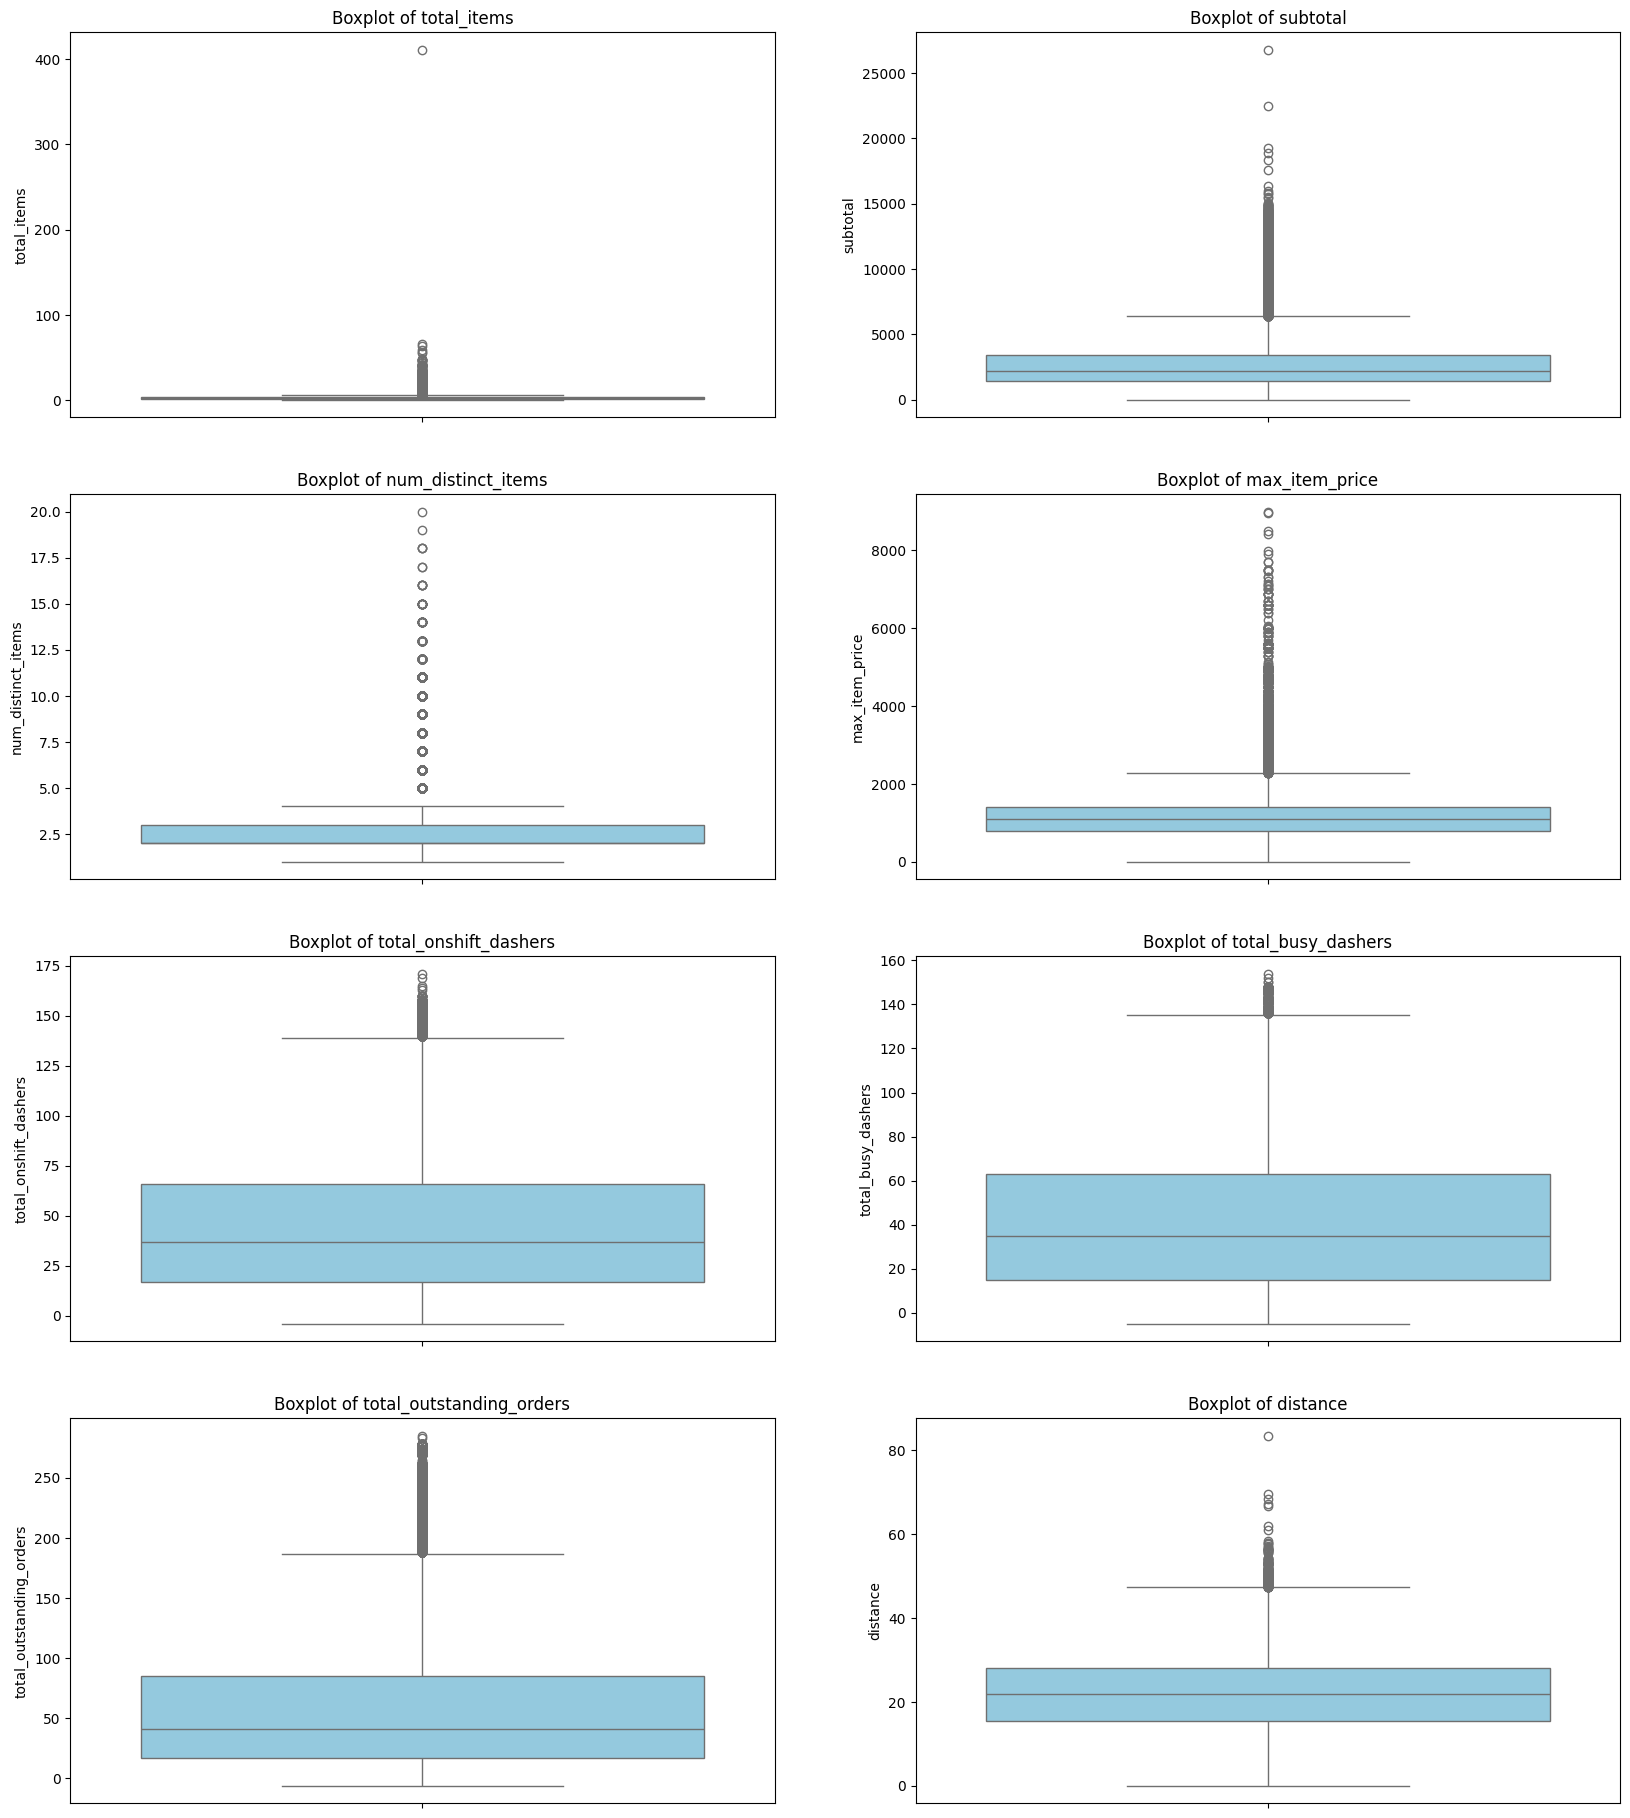

In [40]:
# Set up subplots
plt.figure(figsize=(20, 35))
i = 1
for var in num_cols:
    plt.subplot(6,2,i)
    sns.boxplot(y=X_train_filter[var], color="skyblue")
    plt.title(f"Boxplot of {var}")
    i += 1
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [41]:
# Handle outliers

In [42]:
#Check for outliers in total_items column
X_train_filter['total_items'].describe()

count    140621.000000
mean          3.208582
std           2.727133
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max         411.000000
Name: total_items, dtype: float64

In [43]:
# Remove outliers - Z-Score
mean = np.mean(X_train_filter['total_items'])
std_dev = np.std(X_train_filter['total_items'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Compute the Z-scores
X_train_filter['z_score'] = (X_train_filter['total_items'] - mean) / std_dev

# Define the threshold
threshold = 3

# Identify outliers
outliers = X_train_filter[np.abs(X_train_filter['z_score']) > threshold]

#Getting the range of outliers
print("Outlier Range:",outliers['total_items'].min(), outliers['total_items'].max())

#Dropping the z_score column which we added to Dataset to get outlier range
X_train_filter.drop(['z_score'], axis=1, inplace=True)

Mean: 3.2085819329972054
Standard Deviation: 2.727123785174612
Outlier Range: 12 411


<span style="color: blue;">From above we got outlier range for `total_items` is between **12** and **411**. Let's check how many percentage of data we are loosing we will drop this range.</span>

In [44]:
X_train_filter['total_items'][X_train_filter['total_items']>12].count()/len(X_train_filter['total_items'])*100

0.9642940954764936

<span style="color: blue;">It's just about 0.96% data from entire Dataset. So, let's drop these rows.</span>

In [45]:
y_train.drop(index=X_train_filter[X_train_filter['total_items']>12].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['total_items']>12].index, inplace=True)

In [46]:
X_train_filter.shape, y_train.shape

((139265, 11), (139265,))

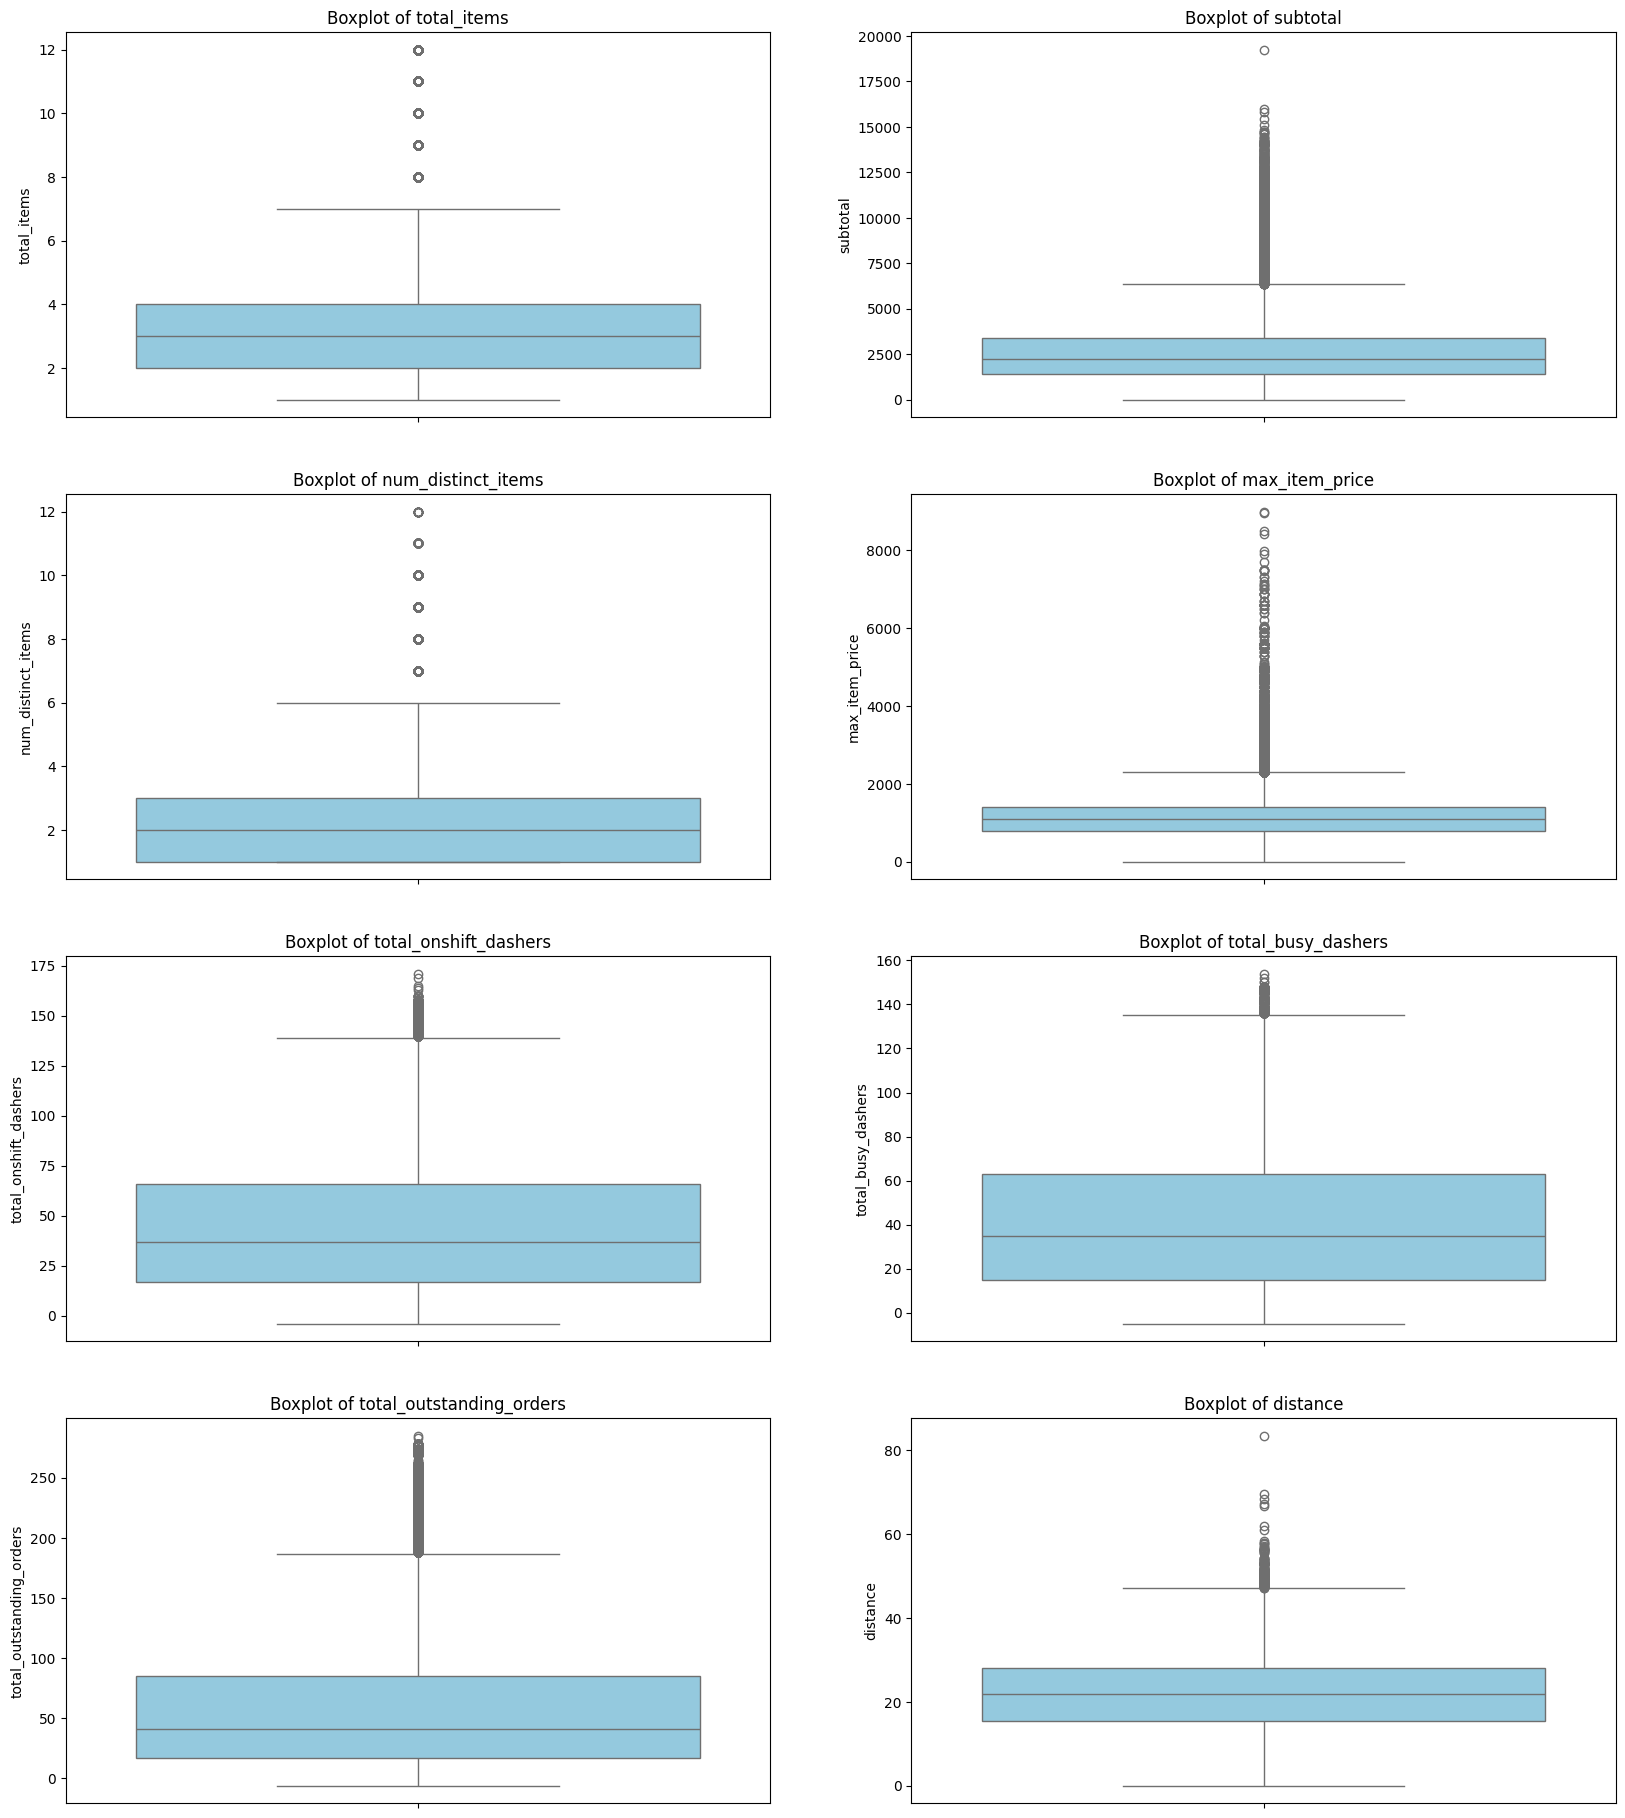

In [47]:
# again we will see box plots for all the features
plt.figure(figsize=(20, 35))
i = 1
for var in num_cols:
    plt.subplot(6,2,i)
    sns.boxplot(y=X_train_filter[var], color="skyblue")
    plt.title(f"Boxplot of {var}")
    i += 1
plt.show()

In [48]:
#Check for outliers in subtotal column
X_train_filter['subtotal'].describe()

count    139265.000000
mean       2666.111492
std        1757.846213
min           0.000000
25%        1410.000000
50%        2215.000000
75%        3398.000000
max       19250.000000
Name: subtotal, dtype: float64

In [49]:
# Remove outliers - Z-Score
mean = np.mean(X_train_filter['subtotal'])
std_dev = np.std(X_train_filter['subtotal'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Compute the Z-scores
X_train_filter['z_score_subtotal'] = (X_train_filter['subtotal'] - mean) / std_dev

# Identify outliers
outliers = X_train_filter[np.abs(X_train_filter['z_score_subtotal']) > threshold]

#Getting the range of outliers
print("Outlier Range:",outliers['subtotal'].min(), outliers['subtotal'].max())

#Dropping the z_score column which we added to Dataset to get outlier range
X_train_filter.drop(['z_score_subtotal'], axis=1, inplace=True)

Mean: 2666.1114924783687
Standard Deviation: 1757.8399014749928
Outlier Range: 7940 19250


<span style="color: blue;">From above we got outlier range for `subtotal` is between **7940** and **19250**. Let's check how many percentage of data we are loosingwe will drop this range.</span>

In [50]:
X_train_filter['subtotal'][X_train_filter['subtotal']>7940].count()/len(X_train_filter['subtotal'])*100

1.8037554302947618

<span style="color: blue;">It's just about 1.80% data from entire Dataset. So, let's drop these rows.</span>

In [51]:
y_train.drop(index=X_train_filter[X_train_filter['subtotal']>7940].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['subtotal']>7940].index, inplace=True)

In [52]:
X_train_filter.shape, y_train.shape

((136753, 11), (136753,))

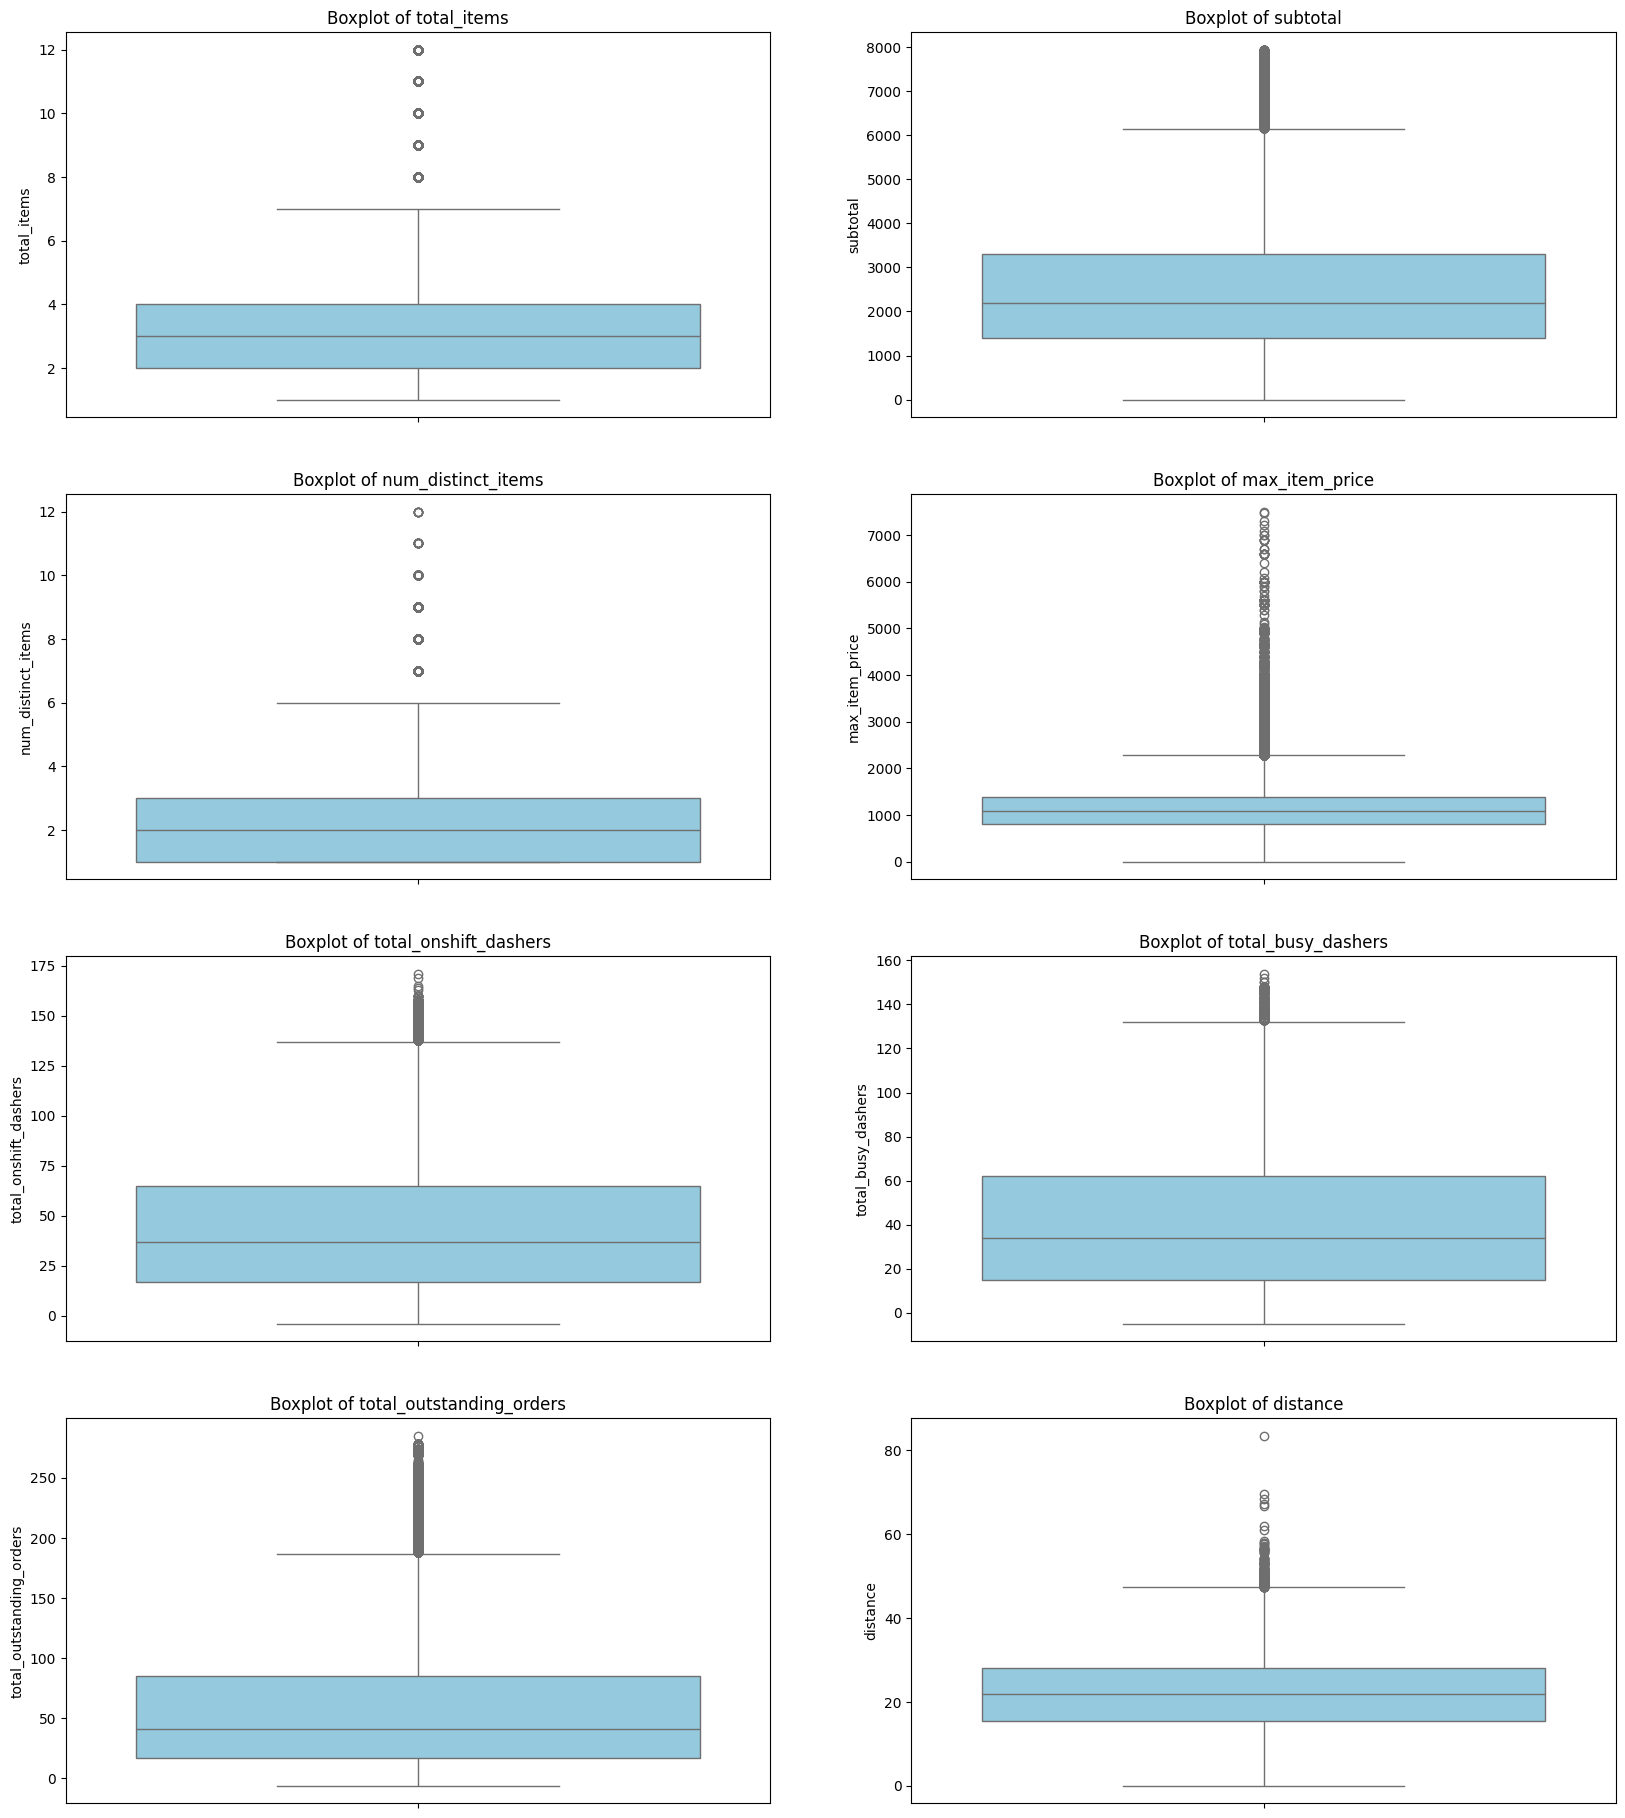

In [53]:
# again we will see box plots for all the features
plt.figure(figsize=(20, 35))
i = 1
for var in num_cols:
    plt.subplot(6,2,i)
    sns.boxplot(y=X_train_filter[var], color="skyblue")
    plt.title(f"Boxplot of {var}")
    i += 1
plt.show()

In [54]:
#Check for outliers in num_distinct_items column
X_train_filter['num_distinct_items'].describe()

count    136753.000000
mean          2.566569
std           1.443711
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          12.000000
Name: num_distinct_items, dtype: float64

In [55]:
# Remove outliers - Z-Score
mean = np.mean(X_train_filter['num_distinct_items'])
std_dev = np.std(X_train_filter['num_distinct_items'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Compute the Z-scores
X_train_filter['z_score_distinct_items'] = (X_train_filter['num_distinct_items'] - mean) / std_dev

# Identify outliers
outliers = X_train_filter[np.abs(X_train_filter['z_score_distinct_items']) > threshold]

#Getting the range of outliers
print("Outlier Range:",outliers['num_distinct_items'].min(), outliers['num_distinct_items'].max())

#Dropping the z_score column which we added to Dataset to get outlier range
X_train_filter.drop(['z_score_distinct_items'], axis=1, inplace=True)

Mean: 2.56656892353367
Standard Deviation: 1.4437053357663014
Outlier Range: 7 12


<span style="color: blue;">From above we got outlier range for `num_distinct_items` is between **7** and **12**. Let's check how many percentage of data we are loosing we will drop this range.</span>

In [56]:
X_train_filter['num_distinct_items'][X_train_filter['num_distinct_items']>7].count()/len(X_train_filter['num_distinct_items'])*100

0.5952337425869999

<span style="color: blue;">It's just about 0.59% data from entire Dataset. So, let's drop these rows.</span>

In [57]:
y_train.drop(index=X_train_filter[X_train_filter['num_distinct_items']>7].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['num_distinct_items']>7].index, inplace=True)

In [58]:
X_train_filter.shape, y_train.shape

((135939, 11), (135939,))

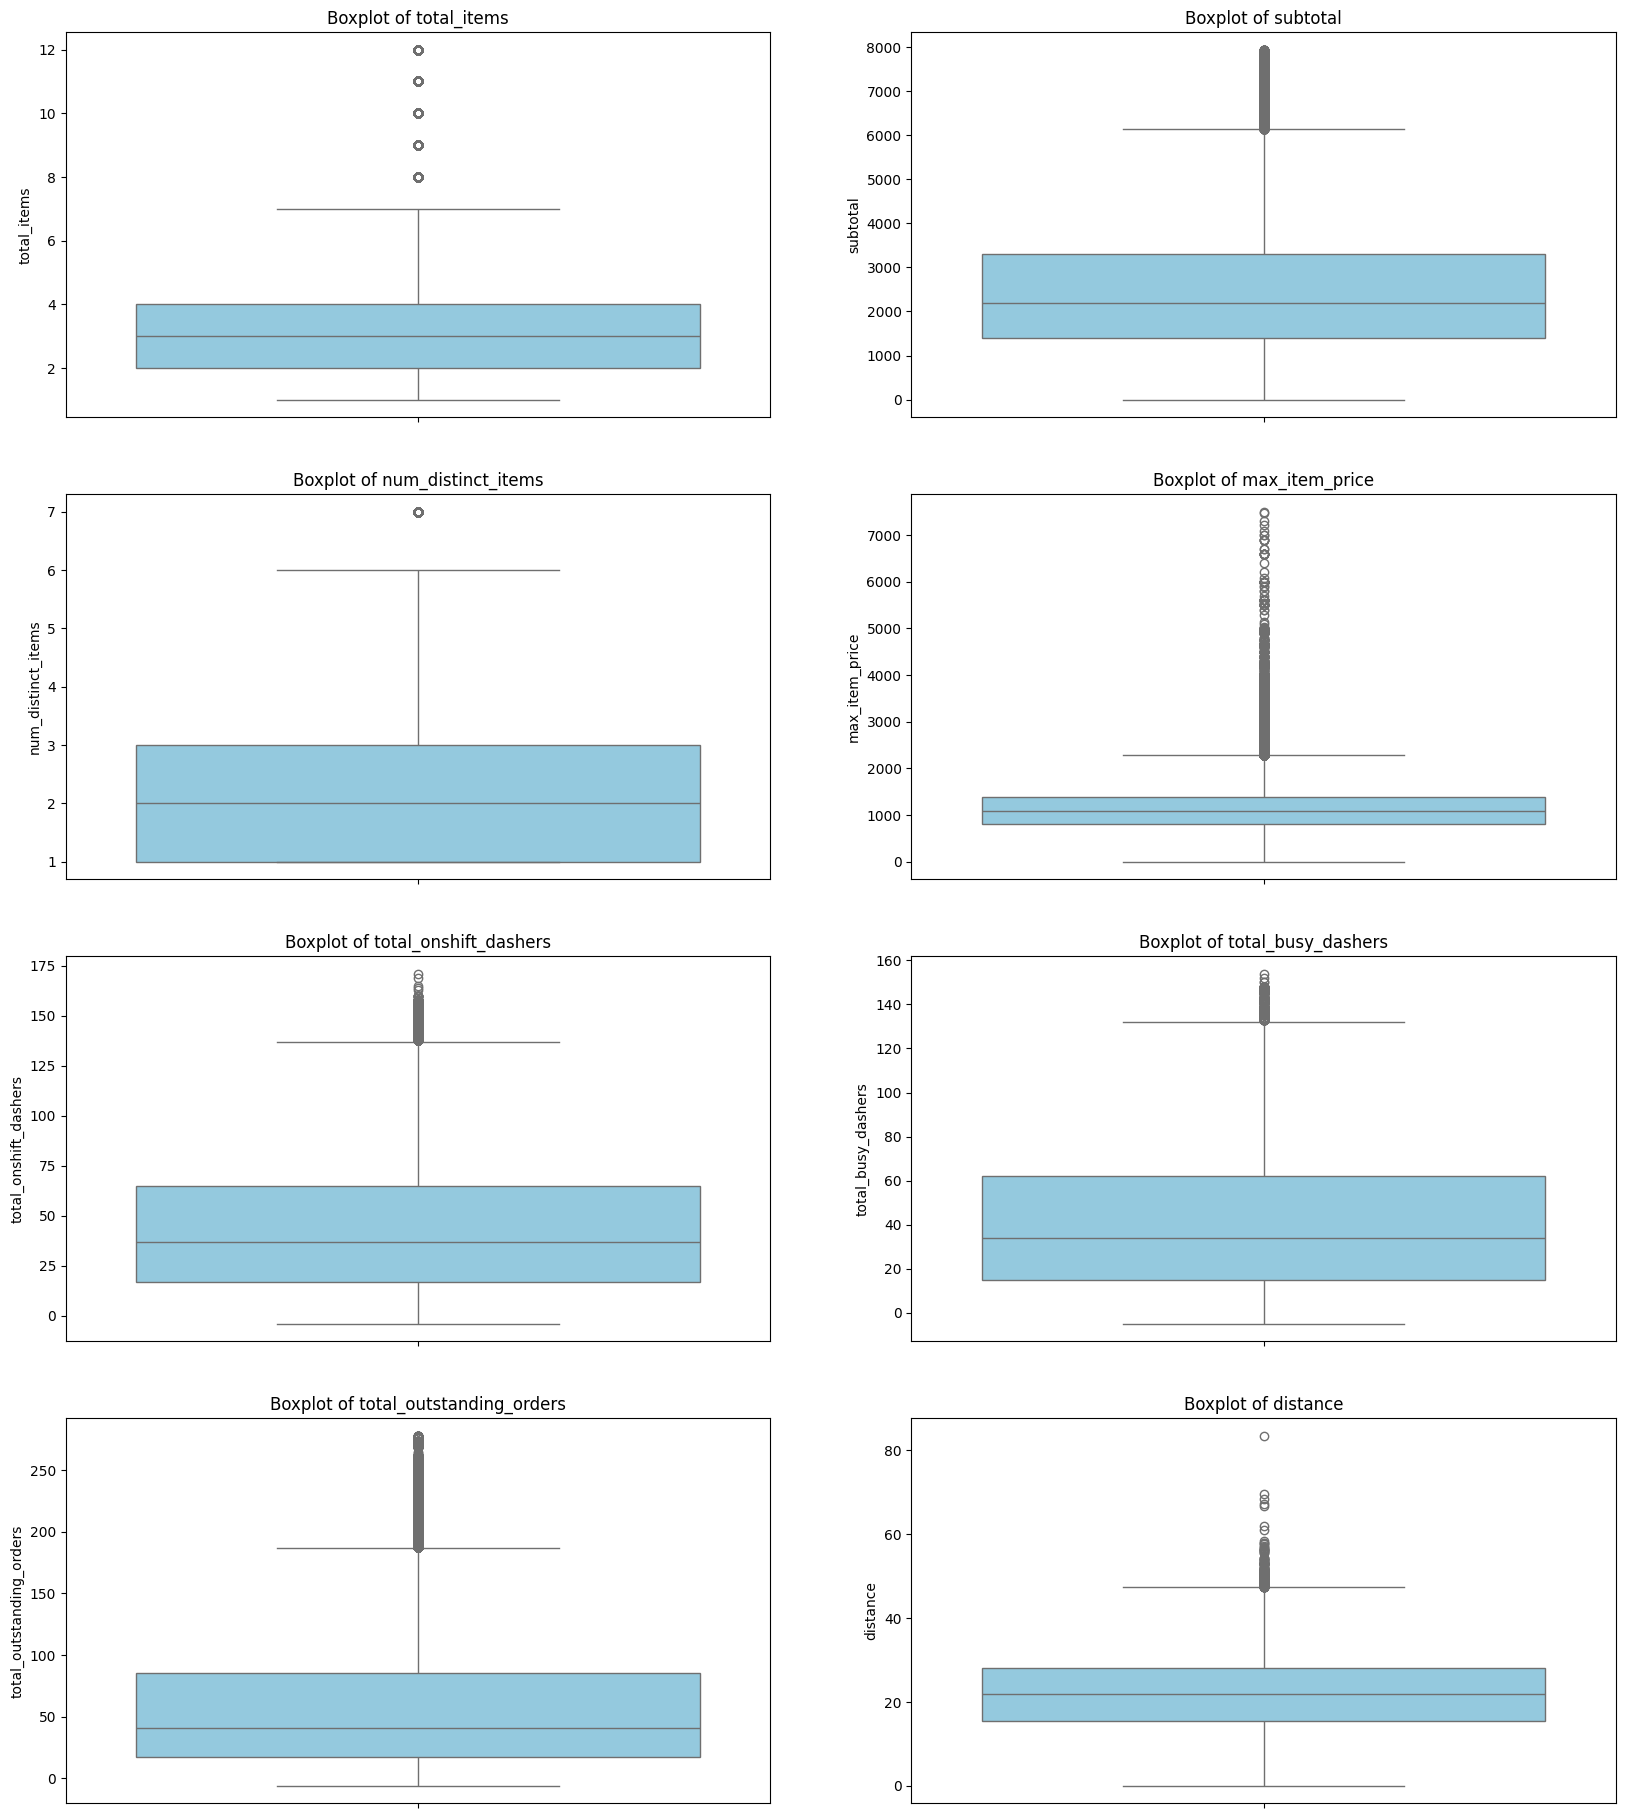

In [59]:
# again we will see box plots for all the features
plt.figure(figsize=(20, 35))
i = 1
for var in num_cols:
    plt.subplot(6,2,i)
    sns.boxplot(y=X_train_filter[var], color="skyblue")
    plt.title(f"Boxplot of {var}")
    i += 1
plt.show()

In [60]:
#Check for outliers in max_item_price column
X_train_filter['max_item_price'].describe()

count    135939.000000
mean       1148.819610
std         537.344354
min           0.000000
25%         799.000000
50%        1075.000000
75%        1395.000000
max        7500.000000
Name: max_item_price, dtype: float64

In [61]:
# Remove outliers - Z-Score
mean = np.mean(X_train_filter['max_item_price'])
std_dev = np.std(X_train_filter['max_item_price'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Compute the Z-scores
X_train_filter['z_score_max_price'] = (X_train_filter['max_item_price'] - mean) / std_dev

# Identify outliers
outliers = X_train_filter[np.abs(X_train_filter['z_score_max_price']) > threshold]

#Getting the range of outliers
print("Outlier Range:",outliers['max_item_price'].min(), outliers['max_item_price'].max())

#Dropping the z_score column which we added to Dataset to get outlier range
X_train_filter.drop(['z_score_max_price'], axis=1, inplace=True)

Mean: 1148.8196102663694
Standard Deviation: 537.3423778405296
Outlier Range: 2765 7500


<span style="color: blue;">From above we got outlier range for `max_item_price` is between **2765** and **7500**. Let's check how many percentage of data we are loosing we will drop this range.</span>

In [62]:
X_train_filter['max_item_price'][X_train_filter['max_item_price']>2765].count()/len(X_train_filter['max_item_price'])*100

1.5654080138885824

<span style="color: blue;">It's just about 1.56% data from entire Dataset. So, let's drop these rows.</span>

In [63]:
y_train.drop(index=X_train_filter[X_train_filter['max_item_price']>2765].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['max_item_price']>2765].index, inplace=True)

In [64]:
X_train_filter.shape, y_train.shape

((133811, 11), (133811,))

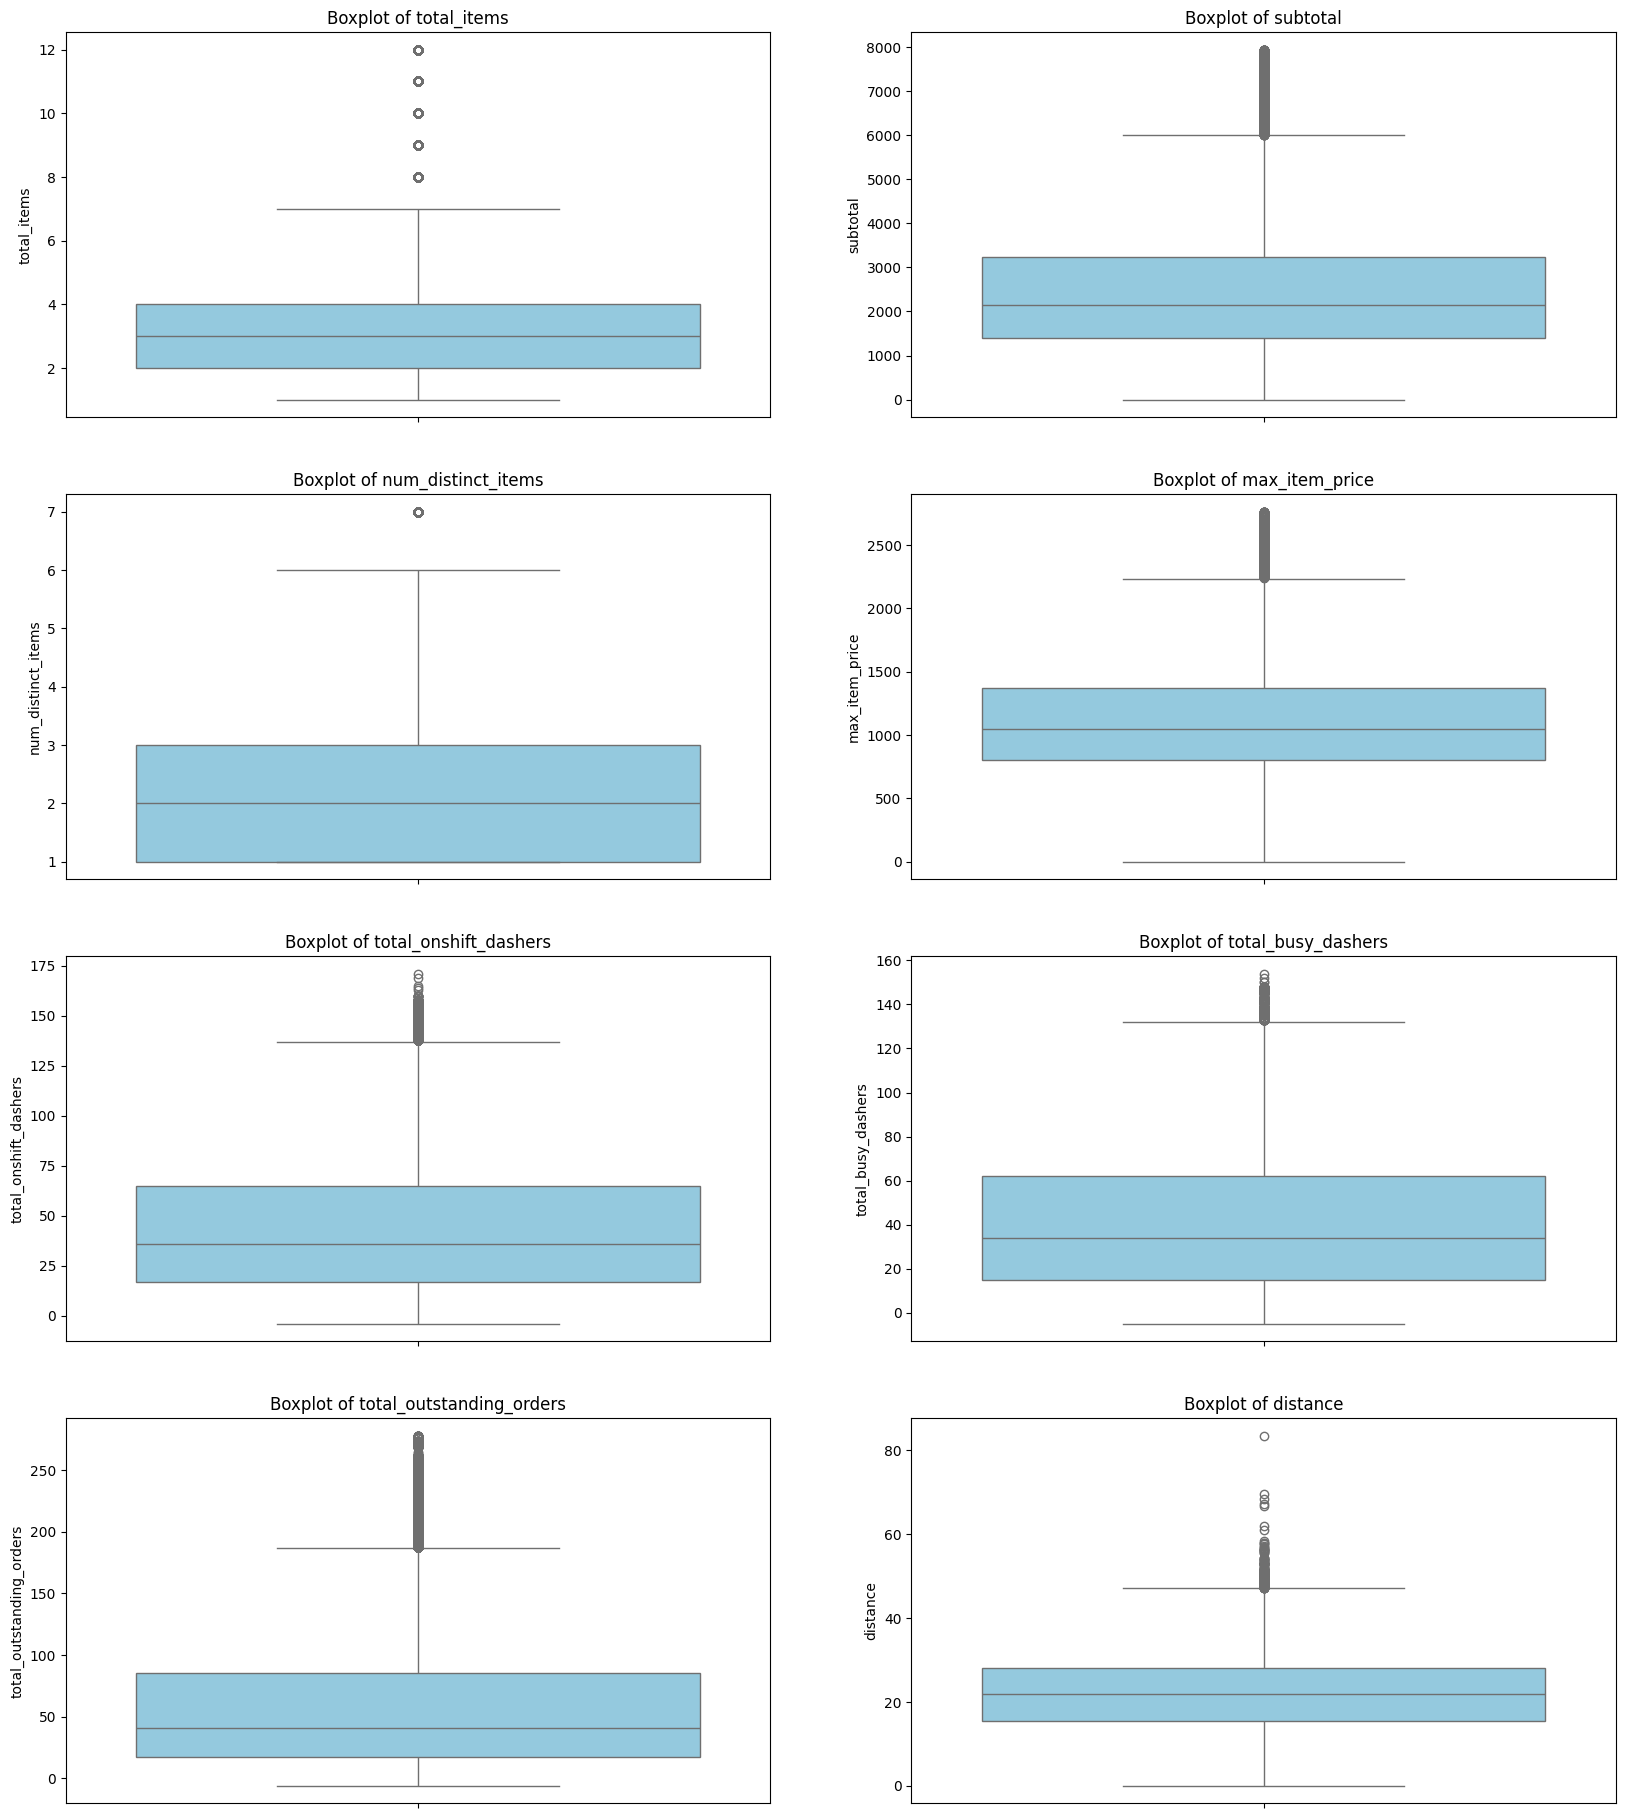

In [65]:
# again we will see box plots for all the features
plt.figure(figsize=(20, 35))
i = 1
for var in num_cols:
    plt.subplot(6,2,i)
    sns.boxplot(y=X_train_filter[var], color="skyblue")
    plt.title(f"Boxplot of {var}")
    i += 1
plt.show()

In [66]:
#Check for outliers in total_onshift_dashers column
X_train_filter['total_onshift_dashers'].describe()

count    133811.000000
mean         44.792476
std          34.563941
min          -4.000000
25%          17.000000
50%          36.000000
75%          65.000000
max         171.000000
Name: total_onshift_dashers, dtype: float64

<span style="color: blue;">Here, we can see that there are negative values present in the column and `total_onshift_dashers` cannot be negative. So, let's first handle the negative values.</span>

In [67]:
X_train_filter[X_train_filter['total_onshift_dashers']<0]

order_protocol  total_items  subtotal  num_distinct_items  \
5535              1.0            2      3538                   2   
106422            4.0            4      1874                   3   
167570            6.0            2       720                   1   
127986            3.0            2      3146                   2   
23697             3.0            2      1327                   1   
54001             5.0            7      2666                   7   
11396             2.0            1       986                   1   
121641            5.0            3       997                   3   
47616             1.0            2      1803                   2   
106426            4.0            3      1980                   3   
105659            3.0            2      1862                   2   
169700            4.0            3      2238                   3   
171630            3.0            2      5240                   2   
123144            3.0            1      1524                   1   
53207             5.0            2      1117                   2   
29825             1.0            2      2831                   2   
27924             1.0            1      1202                   1   
156218            1.0            3      2776                   3   
159437            1.0            2      1934                   2   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
5535              1606                   -2.0                 2.0   
106422            1378                   -2.0                -1.0   
167570             495                   -2.0                 1.0   
127986            1721                   -1.0                 7.0   
23697              615                   -1.0                 6.0   
54001              437                   -2.0                 8.0   
11396              827                   -2.0                 5.0   
121641             399                   -2.0                 6.0   
47616             1061                   -1.0                 4.0   
106426             768                   -2.0                 2.0   
105659            1162                   -2.0                 3.0   
169700             768                   -1.0                 5.0   
171630            2644                   -2.0                 5.0   
123144             897                   -2.0                 3.0   
53207              956                   -3.0                 0.0   
29825              635                   -1.0                13.0   
27924             1092                   -1.0                 9.0   
156218            1227                   -2.0                 6.0   
159437            1024                   -4.0                 7.0   

        total_outstanding_orders  distance  order_hour  isWeekend  
5535                        10.0     10.64           1          1  
106422                      11.0     38.84           4          1  
167570                      10.0     18.64           4          0  
127986                       1.0     20.40          20          0  
23697                        6.0     14.72          18          1  
54001                        5.0     19.44           3          1  
11396                        1.0     31.48          21          0  
121641                      -1.0     22.72          22          0  
47616                        7.0     15.24           2          1  
106426                       2.0     29.12          23          0  
105659                       3.0     24.12           3          0  
169700                      10.0     29.52          20          0  
171630                       6.0      6.88           4          1  
123144                      -3.0     13.00          20          1  
53207                       16.0      7.48           2          0  
29825                       16.0     15.76          22          0  
27924                        5.0     30.92          19          1  
156218                       6.0     33.4

<span style="color: blue;">Total onshift dashers will be either 0 or greater than 0 but not negative and we have found 19 negative values for onshift dashers. So let's drop these rows.</span>

In [68]:
y_train.drop(index=X_train_filter[X_train_filter['total_onshift_dashers']<0].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['total_onshift_dashers']<0].index, inplace=True)

In [69]:
# Remove outliers - Z-Score
mean = np.mean(X_train_filter['total_onshift_dashers'])
std_dev = np.std(X_train_filter['total_onshift_dashers'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Compute the Z-scores
X_train_filter['z_score_onshift'] = (X_train_filter['total_onshift_dashers'] - mean) / std_dev

# Identify outliers
outliers = X_train_filter[np.abs(X_train_filter['z_score_onshift']) > threshold]

#Getting the range of outliers
print("Outlier Range:",outliers['total_onshift_dashers'].min(), outliers['total_onshift_dashers'].max())

#Dropping the z_score column which we added to Dataset to get outlier range
X_train_filter.drop(['z_score_onshift'], axis=1, inplace=True)

Mean: 44.7990986008132
Standard Deviation: 34.56179633886446
Outlier Range: 149.0 171.0


<span style="color: blue;">From above we got outlier range for `total_onshift_dashers` is between **149** and **171**. Let's check how many percentage of data we are loosing we will drop this range.</span>

In [70]:
X_train_filter['total_onshift_dashers'][X_train_filter['total_onshift_dashers']>149].count()/len(X_train_filter['total_onshift_dashers'])*100

0.19956350155465202

<span style="color: blue;">It's just about 0.19% data from entire Dataset. So, let's drop these rows.</span>

In [71]:
y_train.drop(index=X_train_filter[X_train_filter['total_onshift_dashers']>149].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['total_onshift_dashers']>149].index, inplace=True)

In [72]:
X_train_filter.shape, y_train.shape

((133525, 11), (133525,))

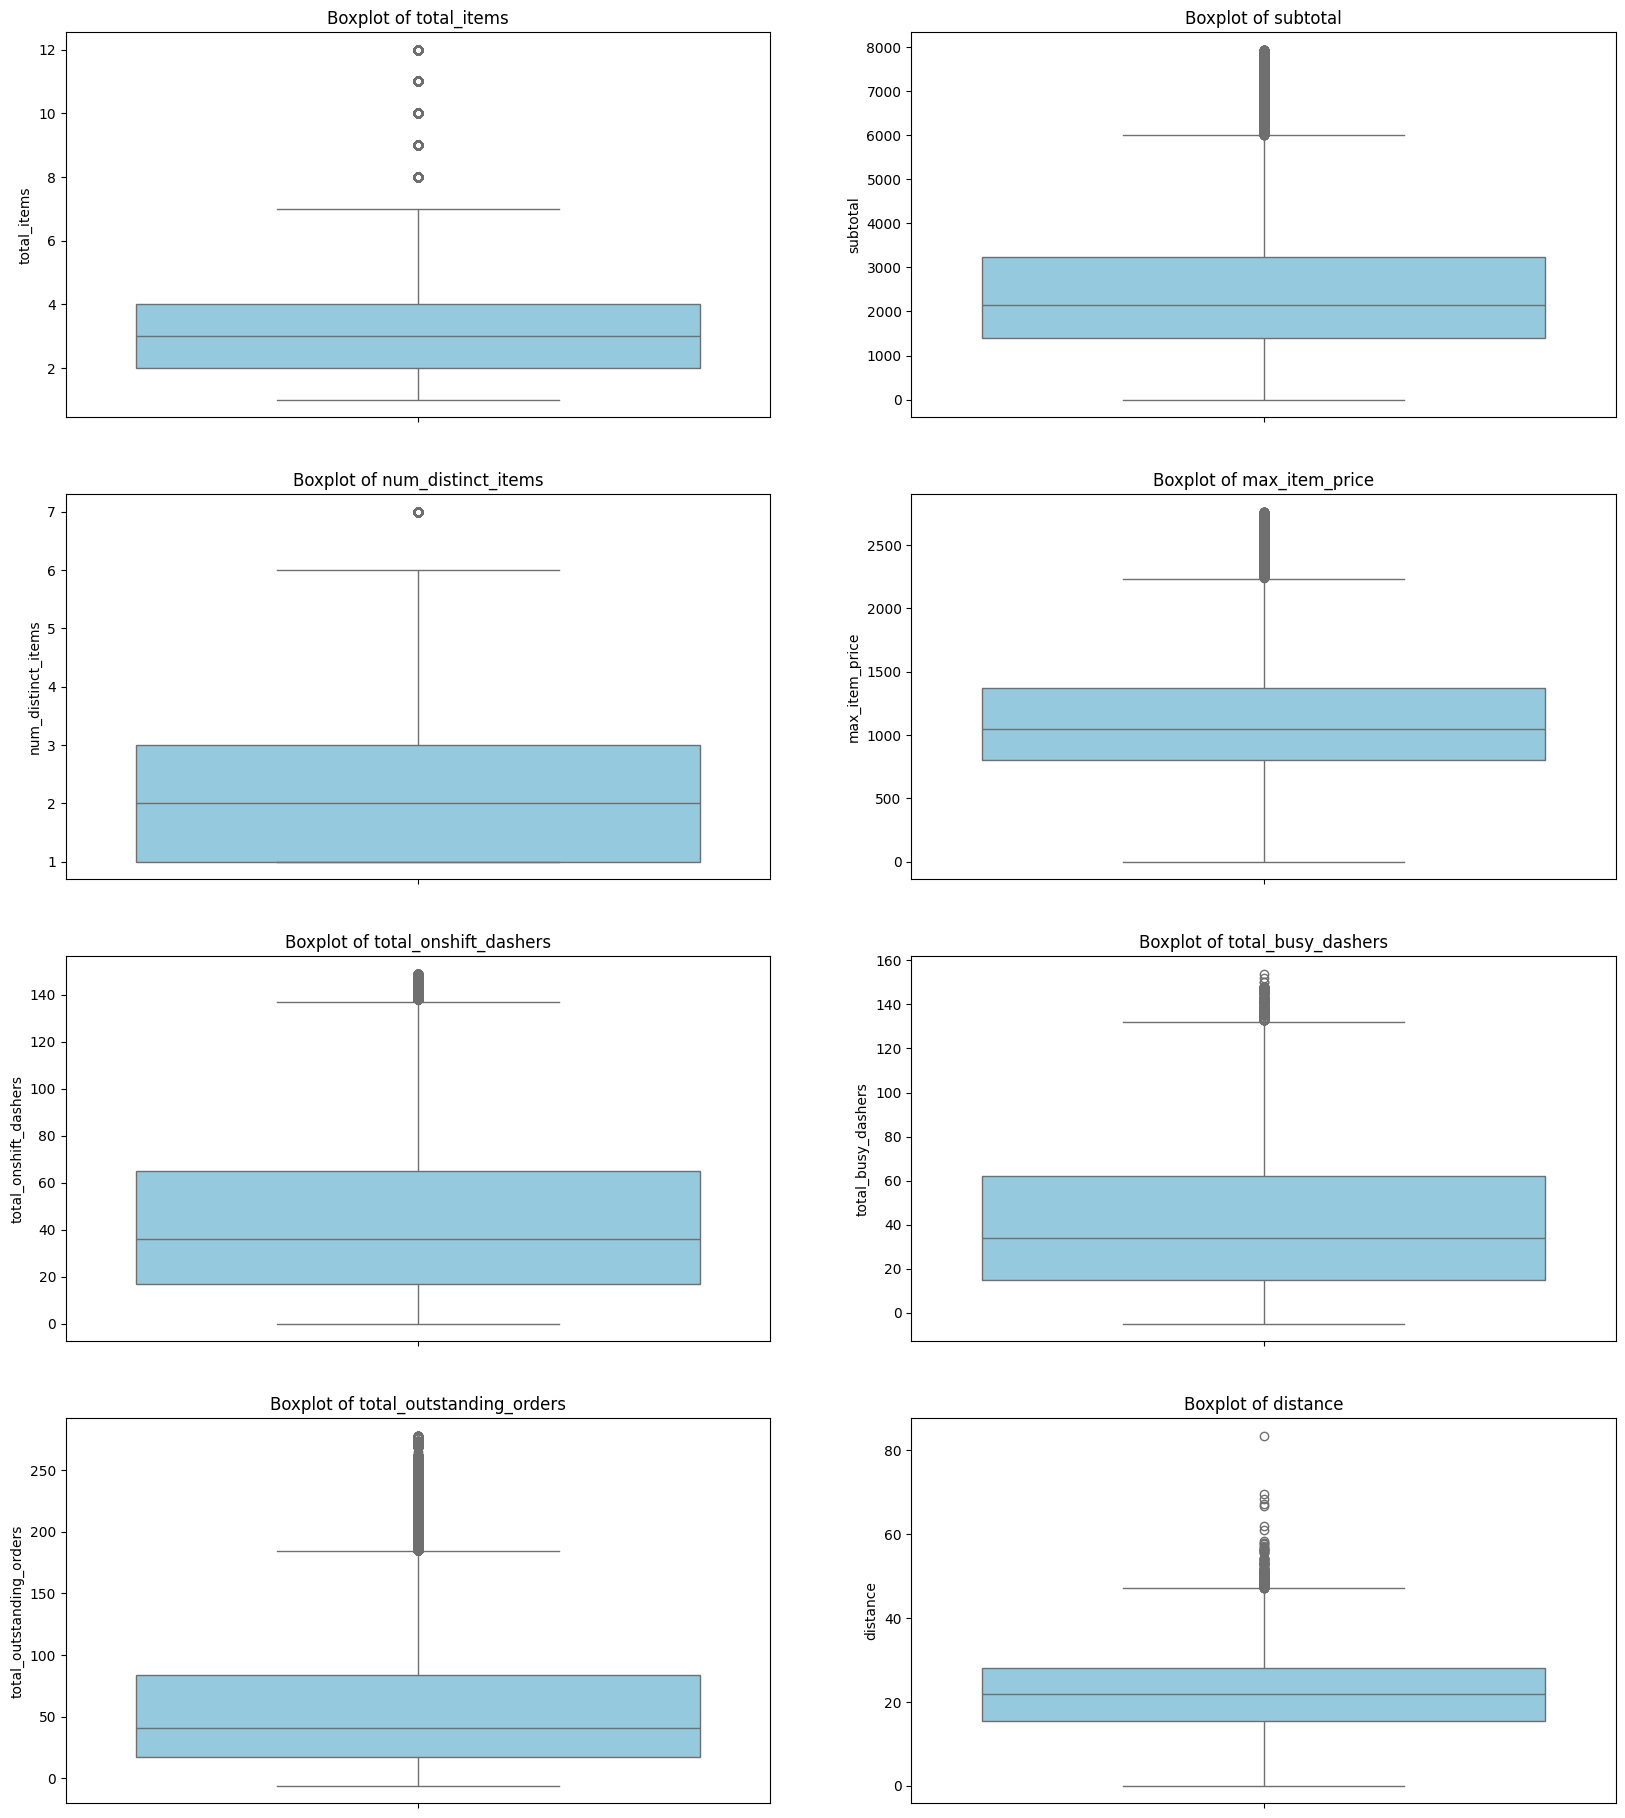

In [73]:
# again we will see box plots for all the features
plt.figure(figsize=(20, 35))
i = 1
for var in num_cols:
    plt.subplot(6,2,i)
    sns.boxplot(y=X_train_filter[var], color="skyblue")
    plt.title(f"Boxplot of {var}")
    i += 1
plt.show()

In [74]:
#Check for outliers in total_busy_dashers column
X_train_filter['total_busy_dashers'].describe()

count    133525.000000
mean         41.608935
std          32.028814
min          -5.000000
25%          15.000000
50%          34.000000
75%          62.000000
max         154.000000
Name: total_busy_dashers, dtype: float64

<span style="color: blue;">Here, we can see that there are negative values present in the column and `total_busy_dashers` cannot be negative. So, let's first handle the negative values.</span>

In [75]:
X_train_filter[X_train_filter['total_busy_dashers']<0]

order_protocol  total_items  subtotal  num_distinct_items  \
170680            1.0            5      2338                   4   
42676             3.0            2      1859                   2   
59467             5.0            2      3830                   2   
52730             1.0            1      1661                   1   
20272             1.0            2      1578                   2   
7133              3.0            1      1514                   1   
23920             1.0            6      5773                   6   
50763             1.0            2      1540                   2   
134303            1.0            5      6151                   5   
165441            1.0            5      3364                   4   
167480            6.0            2      2226                   1   
113043            2.0            3      1303                   3   
168006            1.0            1      1345                   1   
107357            1.0            1       808                   1   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
170680             942                    8.0                -2.0   
42676             1240                    6.0                -1.0   
59467             1890                    0.0                -4.0   
52730             1211                    2.0                -4.0   
20272              803                    0.0                -1.0   
7133              1063                    1.0                -1.0   
23920             1926                   10.0                -1.0   
50763             1236                    6.0                -1.0   
134303            1793                   15.0                -1.0   
165441             874                   14.0                -1.0   
167480            1216                    0.0                -1.0   
113043             493                    9.0                -3.0   
168006            1113                    2.0                -2.0   
107357             712                    7.0                -5.0   

        total_outstanding_orders  distance  order_hour  isWeekend  
170680                       8.0      8.52          16          0  
42676                        8.0     29.28           5          1  
59467                        6.0     18.24          22          1  
52730                       12.0      6.12           1          0  
20272                        9.0     29.40          19          0  
7133                         3.0     26.00          15          1  
23920                        6.0     22.08           3          0  
50763                        3.0     15.20          23          0  
134303                       8.0     17.88           1          0  
165441                       0.0     36.16           4          0  
167480                       7.0     10.24          19          1  
113043                       4.0     24.48          23          0  
168006                      23.0     24.36          14          0  
107357                      10.0     18.32           1          0

<span style="color: blue;">Total busy dashers will be either 0 or greater than 0 but not negative and we have found 14 negative values for busy dashers. So let's drop these rows.</span>

In [76]:
y_train.drop(index=X_train_filter[X_train_filter['total_busy_dashers']<0].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['total_busy_dashers']<0].index, inplace=True)

In [77]:
# Remove outliers - Z-Score
mean = np.mean(X_train_filter['total_busy_dashers'])
std_dev = np.std(X_train_filter['total_busy_dashers'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Compute the Z-scores
X_train_filter['z_score_busy'] = (X_train_filter['total_busy_dashers'] - mean) / std_dev

# Identify outliers
outliers = X_train_filter[np.abs(X_train_filter['z_score_busy']) > threshold]

#Getting the range of outliers
print("Outlier Range:",outliers['total_busy_dashers'].min(), outliers['total_busy_dashers'].max())

#Dropping the z_score column which we added to Dataset to get outlier range
X_train_filter.drop(['z_score_busy'], axis=1, inplace=True)

Mean: 41.61350750125458
Standard Deviation: 32.02725693129531
Outlier Range: 138.0 154.0


<span style="color: blue;">From above we got outlier range for `total_busy_dashers` is between **138** and **154**. Let's check how many percentage of data we are loosing we will drop this range.</span>

In [78]:
X_train_filter['total_busy_dashers'][X_train_filter['total_busy_dashers']>138].count()/len(X_train_filter['total_busy_dashers'])*100

0.1325733460164331

<span style="color: blue;">It's just about 0.13% data from entire Dataset. So, let's drop these rows.</span>

In [79]:
y_train.drop(index=X_train_filter[X_train_filter['total_busy_dashers']>138].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['total_busy_dashers']>138].index, inplace=True)

In [80]:
X_train_filter.shape, y_train.shape

((133334, 11), (133334,))

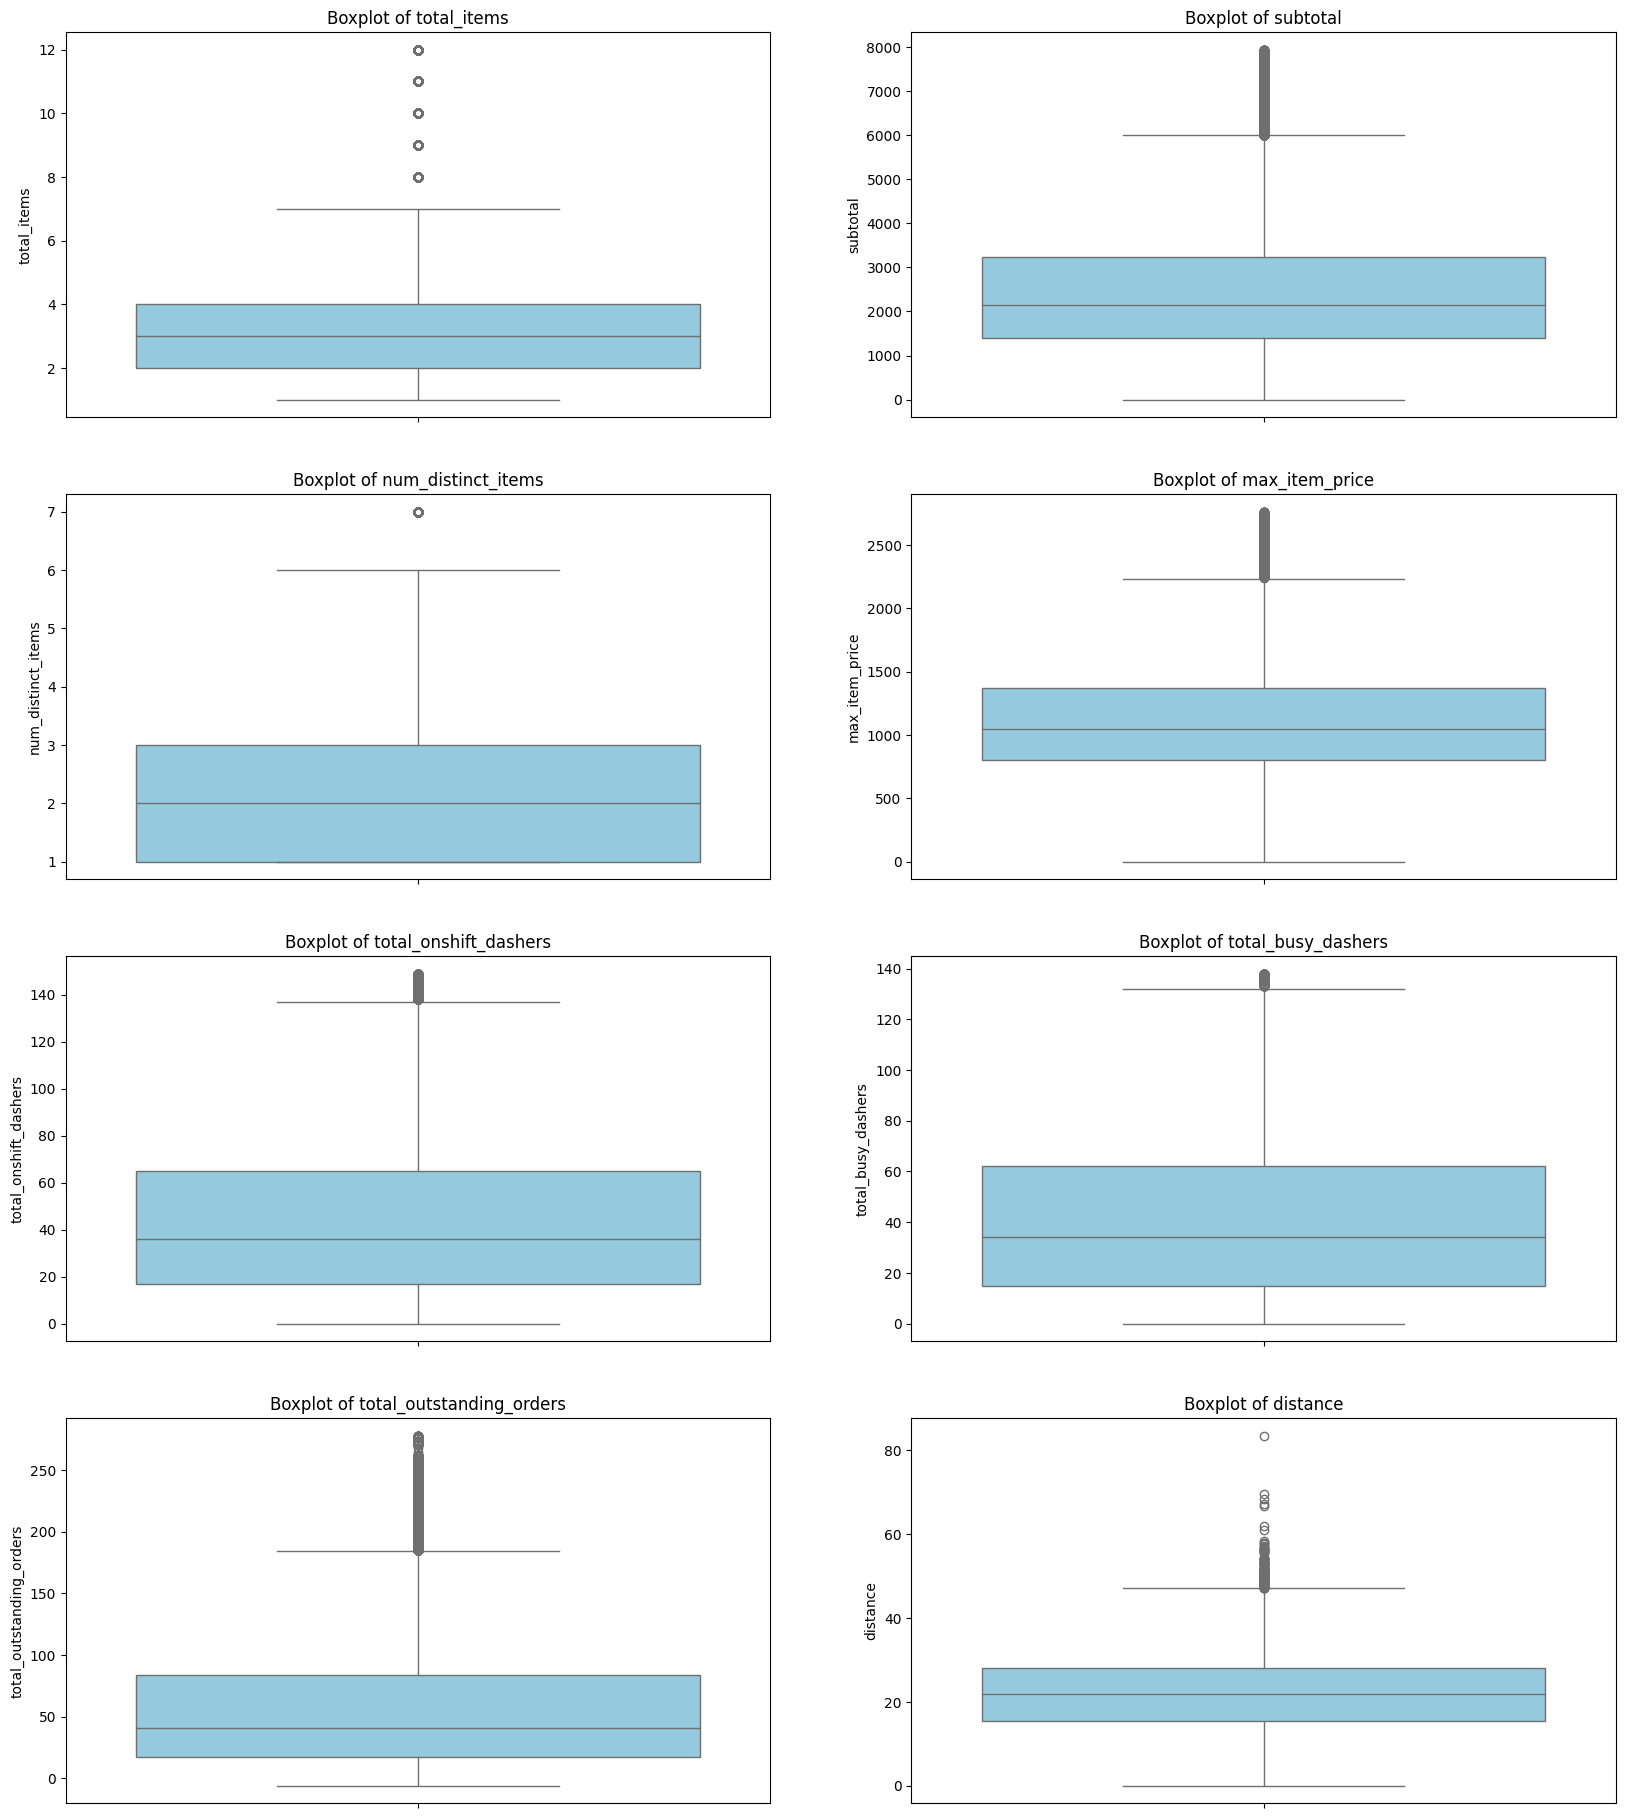

In [81]:
# again we will see box plots for all the features
plt.figure(figsize=(20, 35))
i = 1
for var in num_cols:
    plt.subplot(6,2,i)
    sns.boxplot(y=X_train_filter[var], color="skyblue")
    plt.title(f"Boxplot of {var}")
    i += 1
plt.show()

In [82]:
#Check for outliers in total_outstanding_orders column
X_train_filter['total_outstanding_orders'].describe()

count    133334.000000
mean         57.624102
std          52.236682
min          -6.000000
25%          17.000000
50%          41.000000
75%          84.000000
max         278.000000
Name: total_outstanding_orders, dtype: float64

<span style="color: blue;">Here, we can see that there are negative values present in the column and `total_outstanding_orders` cannot be negative. So, let's first handle the negative values.</span>

In [83]:
X_train_filter[X_train_filter['total_outstanding_orders']<0]

order_protocol  total_items  subtotal  num_distinct_items  \
39567             1.0            3      2258                   2   
84181             5.0            4      2428                   3   
64474             1.0            5      3952                   4   
79460             5.0            1      1408                   1   
82737             1.0            5      2967                   5   
91981             3.0            2      2114                   2   
80696             4.0            4      3388                   1   
148942            1.0            3      1685                   3   
60338             5.0            4      3146                   4   
172967            3.0            2      2692                   2   
41694             4.0            1      1317                   1   
18219             1.0            3      2039                   3   
146546            1.0            4      3381                   3   
147757            4.0            3      3115                   3   
157957            1.0            5      4842                   4   
87199             3.0            6      7413                   2   
97678             4.0            2      1670                   2   
111112            3.0            3      1543                   3   
76193             1.0            4      2924                   3   
98444             1.0            1      1050                   1   
32639             4.0            3       617                   2   
75108             3.0            2      1946                   2   
50087             1.0            3      1963                   2   
20592             1.0            2      1641                   2   
17275             4.0            3      1778                   2   
123978            1.0            2      1904                   2   
127081            1.0            1      2325                   1   
159983            1.0            3      4364                   2   
157642            1.0            1      1671                   1   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
39567              837                   24.0                 8.0   
84181              815                    3.0                 5.0   
64474             1636                    4.0                 0.0   
79460              827                   13.0                 4.0   
82737             1028                   14.0                10.0   
91981             1413                   15.0                 8.0   
80696              903                    9.0                 8.0   
148942             436                    8.0                 5.0   
60338              945                    2.0                 5.0   
172967            1643                   14.0                 3.0   
41694             1042                    6.0                 7.0   
18219              798                    9.0                 7.0   
146546            1013                    6.0                 3.0   
147757            2176                   13.0                19.0   
157957            1450                    8.0                 0.0   
87199             1399                    1.0                 0.0   
97678              782                    6.0                 7.0   
111112             727                    5.0                12.0   
76193              851                    5.0                 4.0   
98444              782                    9.0                14.0   
32639              365                    6.0                 6.0   
75108             1053                    9.0                10.0   
50087              855                    2.0                 5.0   
20592             1217                    5.0                 2.0   
17275              869                    7.0                10.0   
123978             942                   14.0                11.0   
127081            2433                    7.0                 9.0   
159983            1461            

<span style="color: blue;">Total outstanding orders will be either 0 or greater than 0 but not negative and we have found 29 negative values for outstanding orders. So let's drop these rows.</span>

In [84]:
y_train.drop(index=X_train_filter[X_train_filter['total_outstanding_orders']<0].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['total_outstanding_orders']<0].index, inplace=True)

In [85]:
# Remove outliers - Z-Score
mean = np.mean(X_train_filter['total_outstanding_orders'])
std_dev = np.std(X_train_filter['total_outstanding_orders'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Compute the Z-scores
X_train_filter['z_score_outstanding'] = (X_train_filter['total_outstanding_orders'] - mean) / std_dev

# Identify outliers
outliers = X_train_filter[np.abs(X_train_filter['z_score_outstanding']) > threshold]

#Getting the range of outliers
print("Outlier Range:",outliers['total_outstanding_orders'].min(), outliers['total_outstanding_orders'].max())

#Dropping the z_score column which we added to Dataset to get outlier range
X_train_filter.drop(['z_score_outstanding'], axis=1, inplace=True)

Mean: 57.63726041783879
Standard Deviation: 52.23454121083617
Outlier Range: 215.0 278.0


<span style="color: blue;">From above we got outlier range for `total_outstanding_orders` is between **215** and **278**. Let's check how many percentage of data we are loosing we will drop this range.</span>

In [86]:
X_train_filter['total_outstanding_orders'][X_train_filter['total_outstanding_orders']>215].count()/len(X_train_filter['total_outstanding_orders'])*100

0.8004200892689696

<span style="color: blue;">It's just about 0.80% data from entire Dataset. So, let's drop these rows.</span>

In [87]:
y_train.drop(index=X_train_filter[X_train_filter['total_outstanding_orders']>215].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['total_outstanding_orders']>215].index, inplace=True)

In [88]:
X_train_filter.shape, y_train.shape

((132238, 11), (132238,))

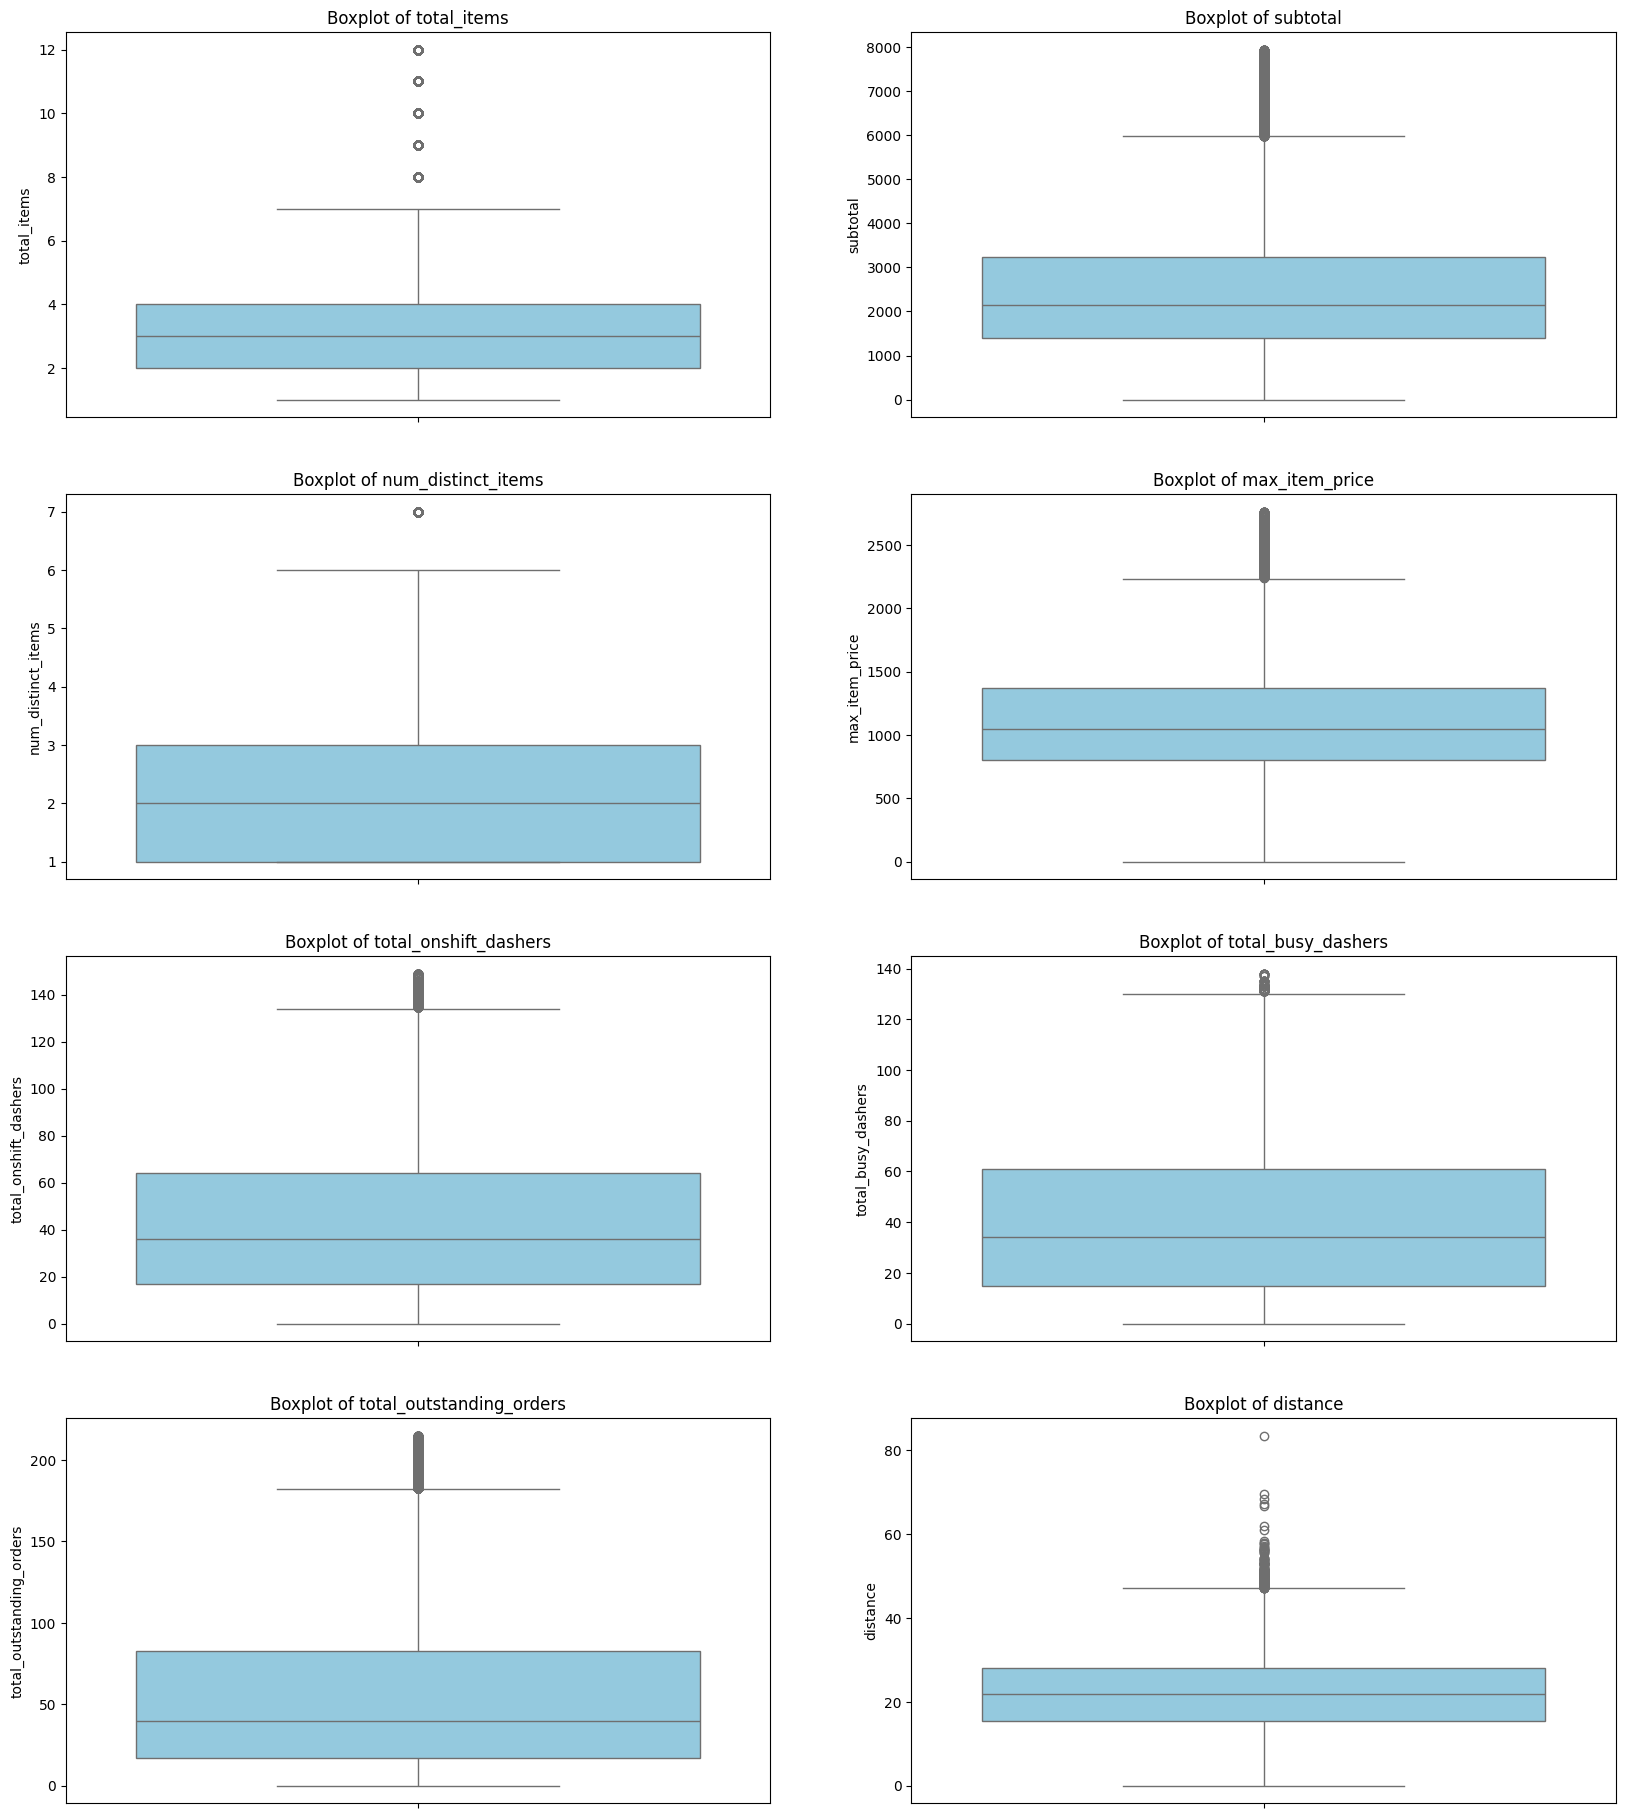

In [89]:
# again we will see box plots for all the features
plt.figure(figsize=(20, 35))
i = 1
for var in num_cols:
    plt.subplot(6,2,i)
    sns.boxplot(y=X_train_filter[var], color="skyblue")
    plt.title(f"Boxplot of {var}")
    i += 1
plt.show()

In [90]:
#Check for outliers in distance column
X_train_filter['distance'].describe()

count    132238.000000
mean         21.821615
std           8.754521
min           0.000000
25%          15.320000
50%          21.760000
75%          28.080000
max          83.520000
Name: distance, dtype: float64

In [91]:
# Remove outliers - Z-Score
mean = np.mean(X_train_filter['distance'])
std_dev = np.std(X_train_filter['distance'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Compute the Z-scores
X_train_filter['z_score_distance'] = (X_train_filter['distance'] - mean) / std_dev

# Identify outliers
outliers = X_train_filter[np.abs(X_train_filter['z_score_distance']) > threshold]

#Getting the range of outliers
print("Outlier Range:",outliers['distance'].min(), outliers['distance'].max())

#Dropping the z_score column which we added to Dataset to get outlier range
X_train_filter.drop(['z_score_distance'], axis=1, inplace=True)

Mean: 21.821614966953526
Standard Deviation: 8.754487972717332
Outlier Range: 48.12 83.52


<span style="color: blue;">From above we got outlier range for `distance` is between **48.12** and **83.52**. Let's check how many percentage of data we are loosing we will drop this range.</span>

In [92]:
X_train_filter['distance'][X_train_filter['distance']>48.12].count()/len(X_train_filter['distance'])*100

0.1308247251168348

<span style="color: blue;">It's just about 0.13% data from entire Dataset. So, let's drop these rows.</span>

In [93]:
y_train.drop(index=X_train_filter[X_train_filter['distance']>48.12].index, inplace=True)
X_train_filter.drop(index=X_train_filter[X_train_filter['distance']>48.12].index, inplace=True)

In [94]:
X_train_filter.shape, y_train.shape

((132065, 11), (132065,))

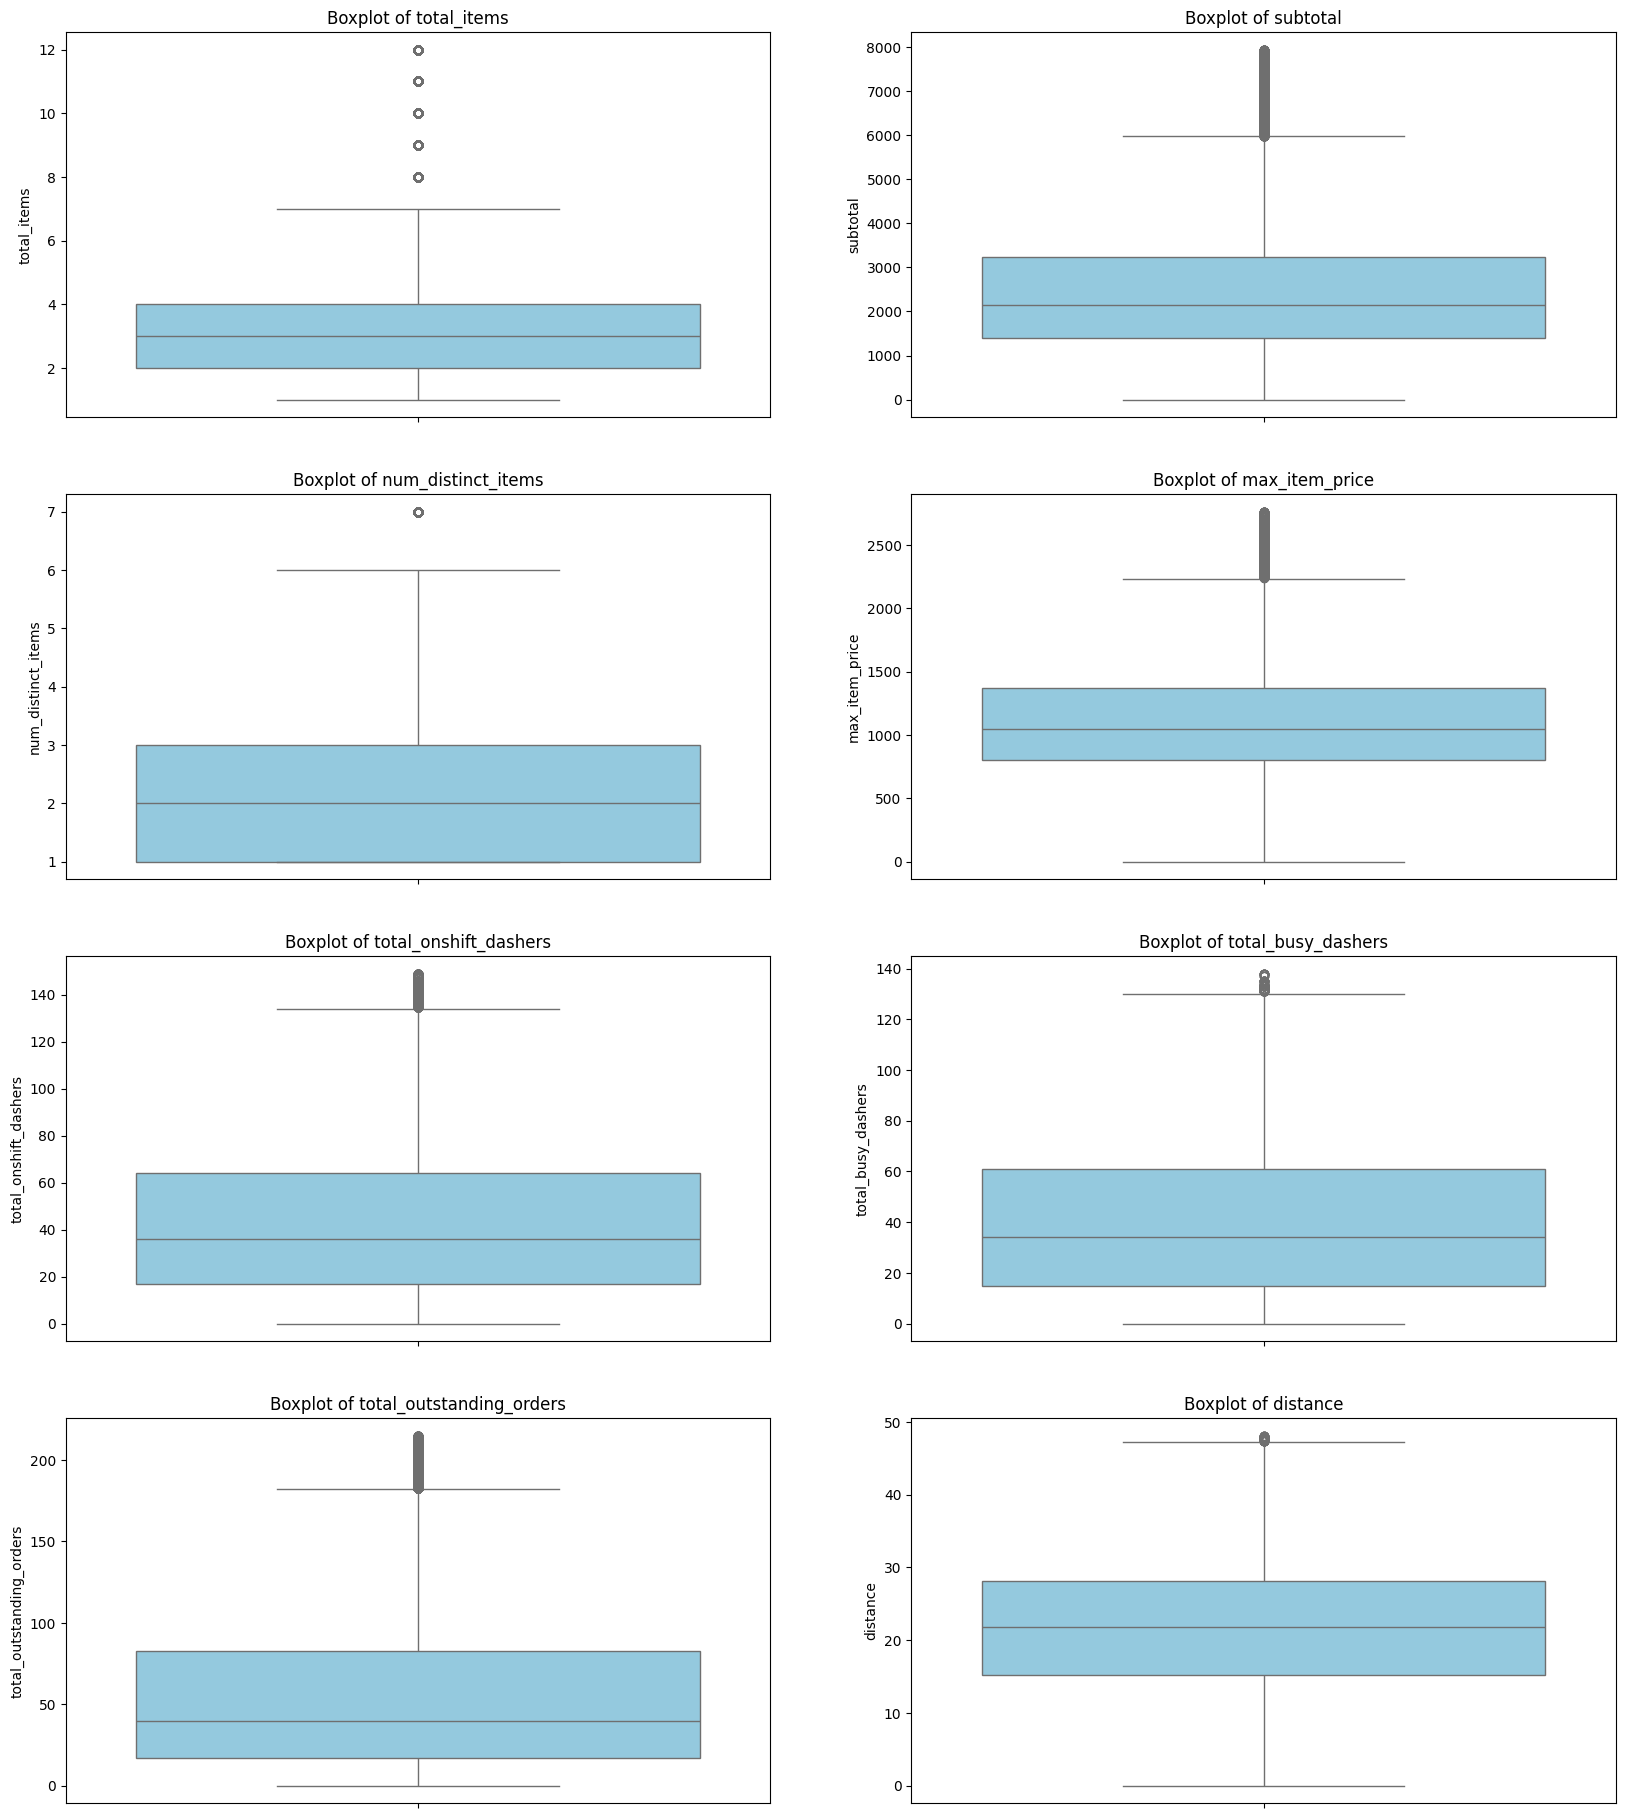

In [95]:
# again we will see box plots for all the features
plt.figure(figsize=(20, 35))
i = 1
for var in num_cols:
    plt.subplot(6,2,i)
    sns.boxplot(y=X_train_filter[var], color="skyblue")
    plt.title(f"Boxplot of {var}")
    i += 1
plt.show()

#### <span style="color: blue;">We have handled most of the outliers in predictor variables. Now let's check outliers in Target variable.</span>

In [96]:
#Check for outliers in delivery_time_minutes column
y_train.describe()

count    132065.000000
mean         45.596138
std           8.925602
min          32.000000
25%          39.000000
50%          44.000000
75%          51.000000
max         105.000000
Name: delivery_time_minutes, dtype: float64

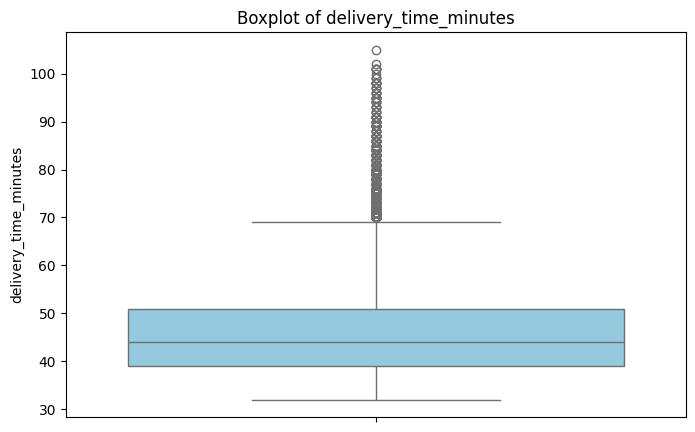

In [97]:
#Now we will plot boxplot for target variable
plt.figure(figsize=(8, 5))
sns.boxplot(y=y_train, color="skyblue")
plt.title(f"Boxplot of delivery_time_minutes")
plt.show()

In [98]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 132065 entries, 102712 to 121958
Series name: delivery_time_minutes
Non-Null Count   Dtype  
--------------   -----  
132065 non-null  float64
dtypes: float64(1)
memory usage: 2.0 MB


<span style="color: blue;">Since y_train is series object, we cannot add z_score column to it and calculate z_score for y_train. Hence we will use IQR method to check for Outlier Range. </span>

In [99]:
# Remove the outliers based on IQR
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

Lower Bound:  21.0
Upper Bound:  69.0


<span style="color: blue;">Outlier is beyond the upper bound i.e. 69. So let's check how many percentage of data we are loosing if we will drop abpve this range.</span>

In [100]:
# Filter y_train and corresponding X_train
outlier_mask = (y_train <= upper_bound)

In [101]:
(len(y_train)-y_train[outlier_mask].count())/len(y_train)*100

1.0017794267974103

<span style="color: blue;">It's just about 1% data from entire Dataset. So, let's drop these rows and create new filtered dataset.</span>

In [102]:
X_train_filtered = X_train_filter[outlier_mask]
y_train_filtered = y_train[outlier_mask]

In [103]:
X_train_filtered.shape, y_train_filtered.shape

((130742, 11), (130742,))

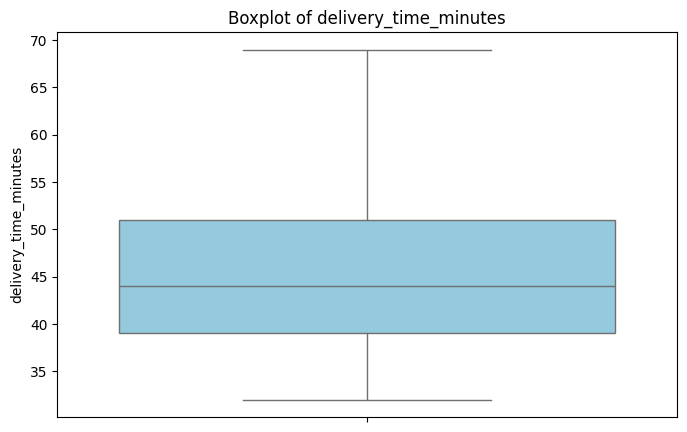

In [104]:
#Now we will plot boxplot for target variable after removing outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=y_train_filtered, color="skyblue")
plt.title(f"Boxplot of delivery_time_minutes")
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [105]:
#Let's first analyse test data
X_test.shape, y_test.shape

((35156, 14), (35156,))

In [106]:
X_test.head()

market_id order_protocol  total_items  subtotal  num_distinct_items  \
50609       1.0            1.0            4      2596                   4   
49181       4.0            3.0            3      3180                   2   
4526        5.0            1.0            1      1199                   1   
131         5.0            4.0            5      1590                   4   
57096       3.0            5.0            6      3680                   3   

       min_item_price  max_item_price  total_onshift_dashers  \
50609             299            1099                   55.0   
49181             580            1300                  101.0   
4526             1199            1199                    7.0   
131               200             440                    3.0   
57096             450             750                    9.0   

       total_busy_dashers  total_outstanding_orders  distance  order_hour  \
50609                52.0                      66.0     28.32           2   
49181                98.0                     192.0     23.56           2   
4526                  6.0                       6.0     14.60           5   
131                   4.0                       4.0     25.64          22   
57096                 1.0                       1.0     16.08          19   

       order_day_of_week  isWeekend  
50609                  2          0  
49181                  0          0  
4526                   4          0  
131                    2          0  
57096                  6          1

In [107]:
y_test.head()

50609    50.0
49181    69.0
4526     41.0
131      45.0
57096    40.0
Name: delivery_time_minutes, dtype: float64

In [108]:
# Define numerical and categorical columns for easy EDA and data manipulation
test_cat_cols = ['market_id', 'order_protocol', 'order_hour', 'order_day_of_week', 'isWeekend']

test_num_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

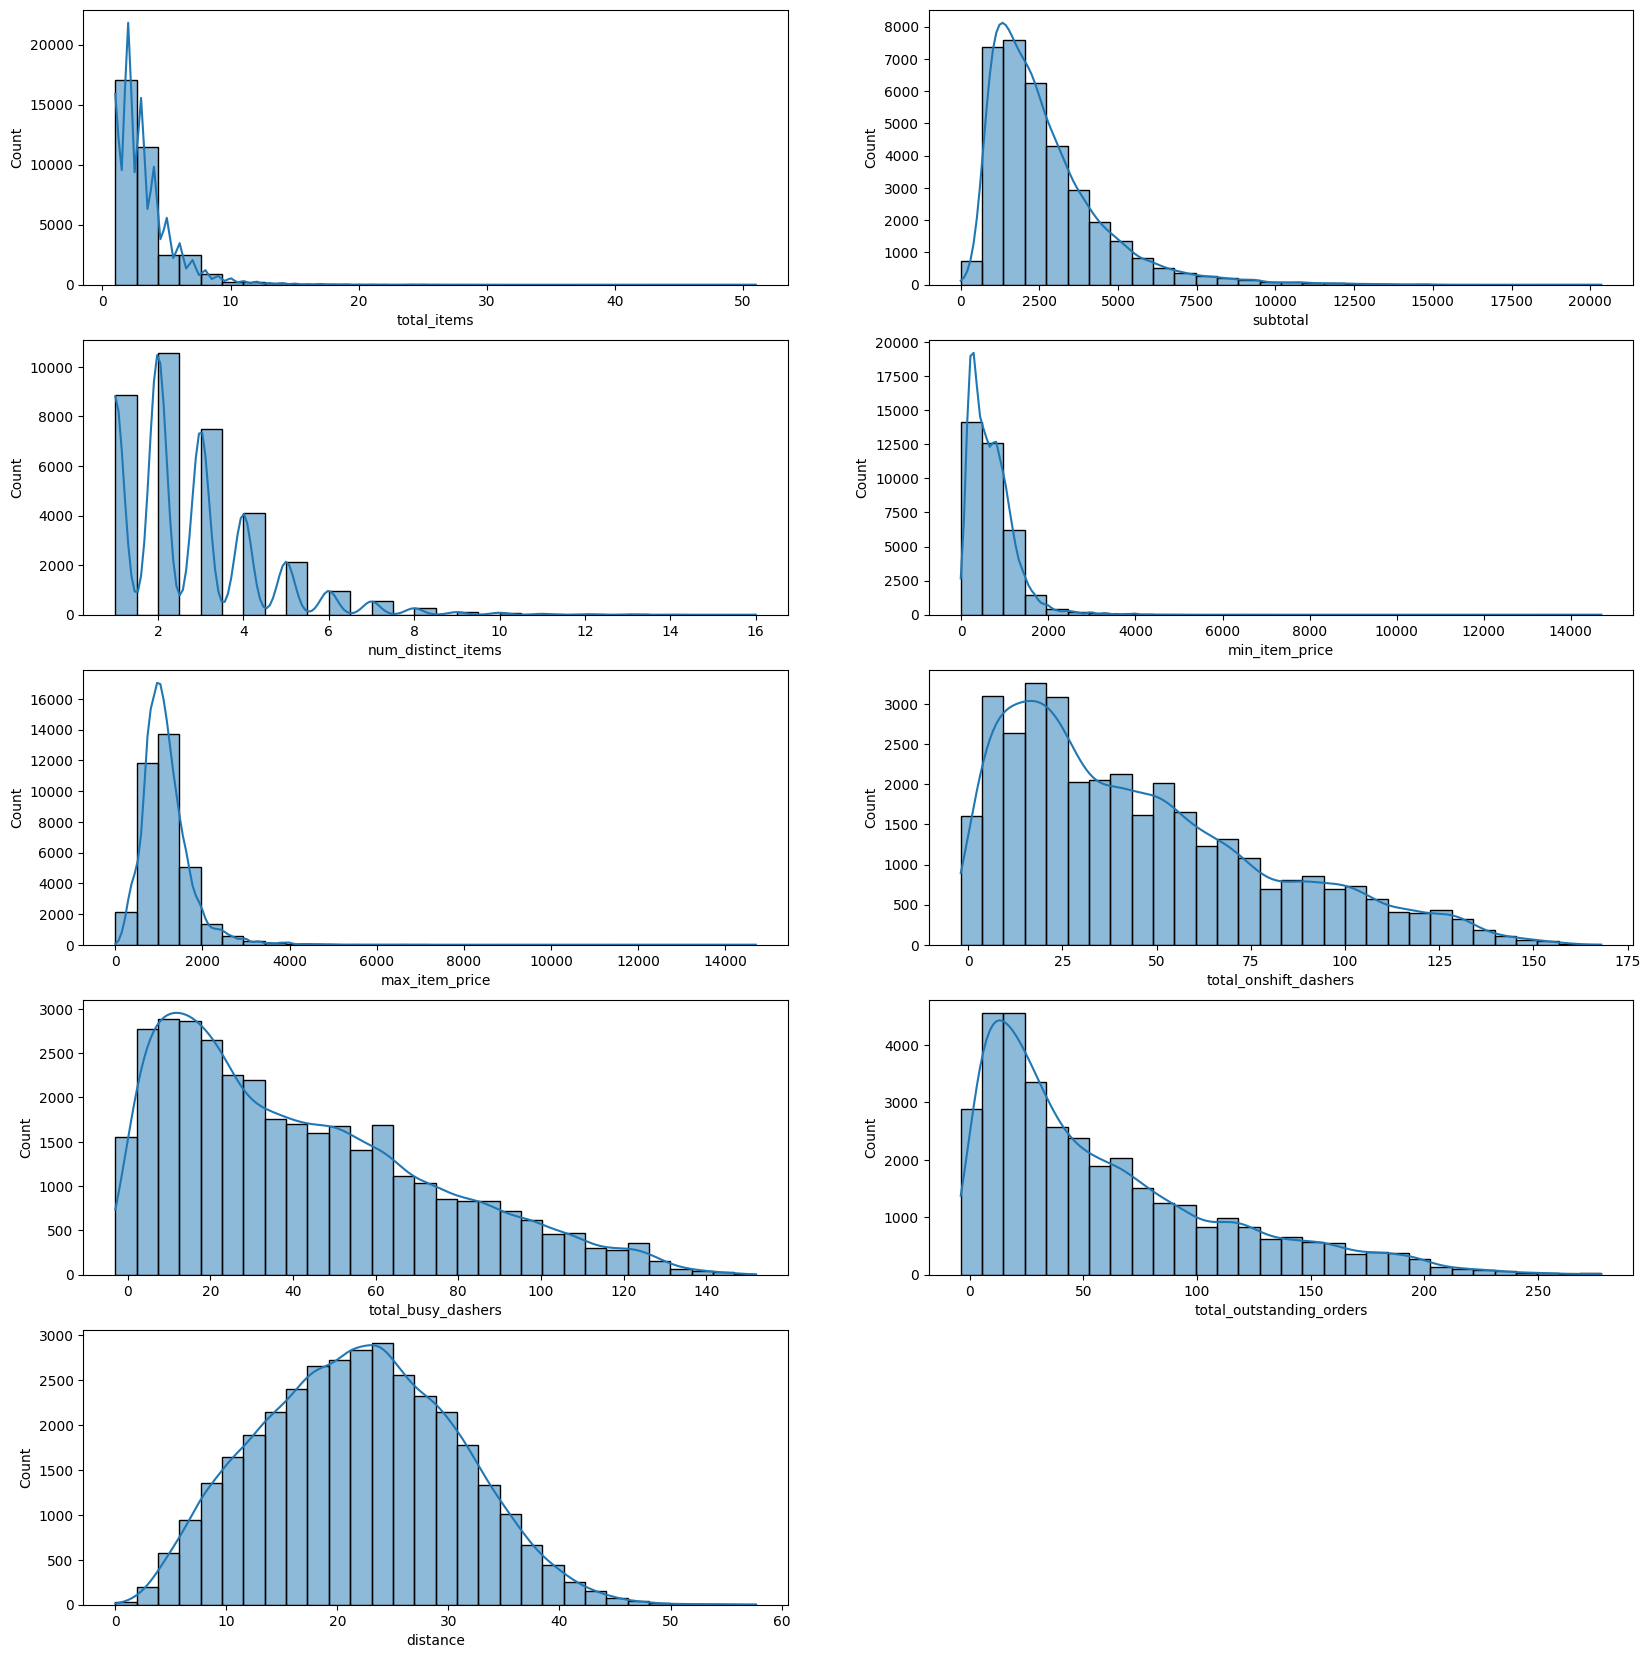

In [109]:
# Plot distributions for all numerical columns
plt.figure(figsize=(20, 25))
i = 1
for var in test_num_cols:
    plt.subplot(6,2,i)
    sns.histplot(X_test[var], bins=30, kde=True)
    i += 1
plt.show()

<span style="color: blue;">I can see that almost all plots are heavily right skewed except `distance`.</span>

##### **4.1.2**
Check the distribution of categorical features

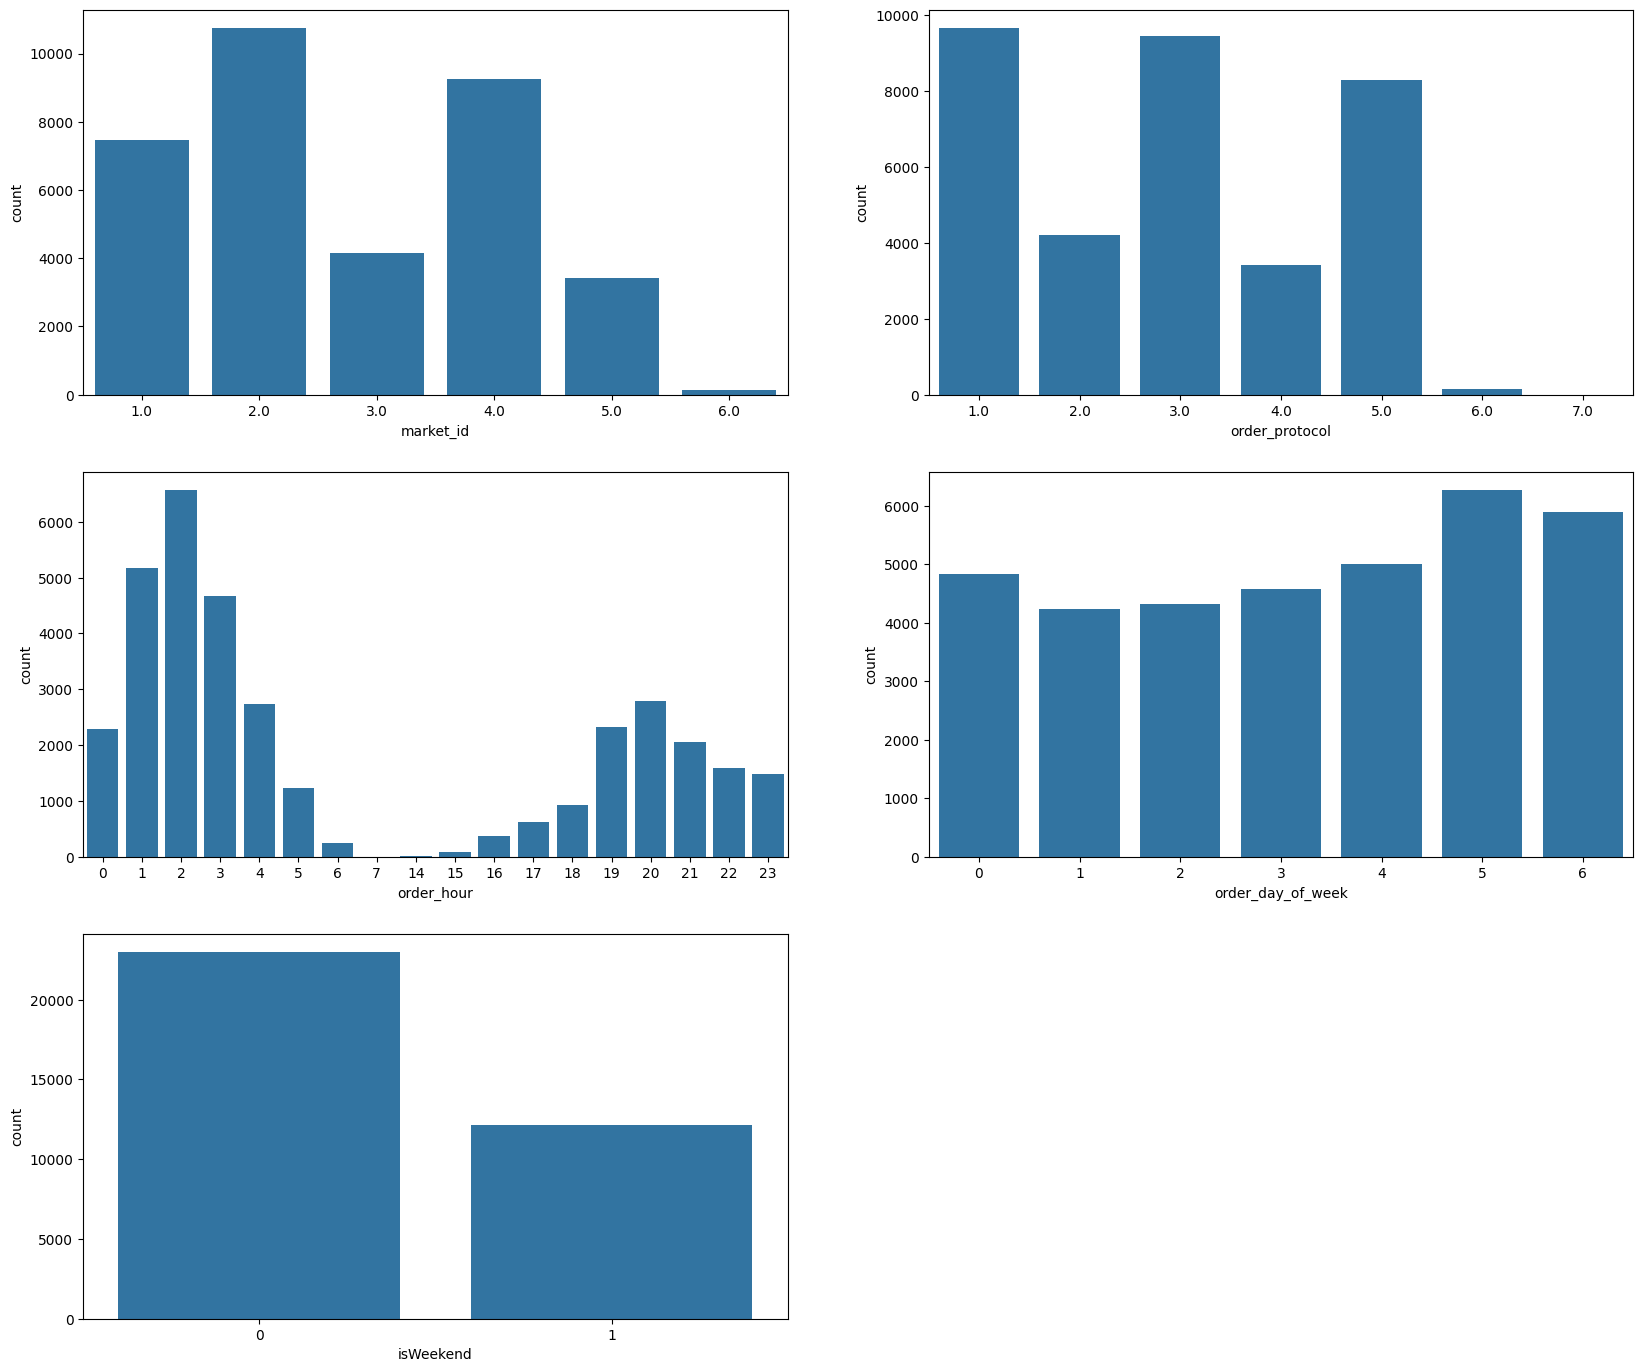

In [110]:
# Distribution of categorical columns
plt.figure(figsize=(20, 35))
i = 1
for var in test_cat_cols:
    plt.subplot(6,2,i)
    sns.countplot(data=X_test, x=var)
    i += 1
plt.show()

<span style="color: blue;">We can get similar Insights from the count plots of test data too</span>
- Market IDs 2 and 4 dominate the dataset with highest number of orders.
- Most of the orders have been made through protocols 1, 3 and 5.
- More no. of the orders have been made in the early hours of day which 1, 2 and 3. We also do not have any information on orders after 7:00 until 14:00.
- Its no surprise that maximum of the orders are during weekends.

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

<Axes: xlabel='delivery_time_minutes', ylabel='Count'>

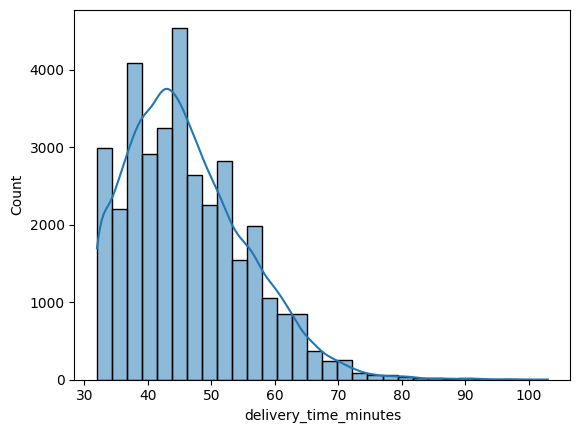

In [111]:
# Distribution of time_taken
sns.histplot(y_test, bins=30, kde=True)

<span style="color: blue;">The target variable `delivery_time_minutes` appears to be fairly normally distributed, but with some potential outliers.</span>

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

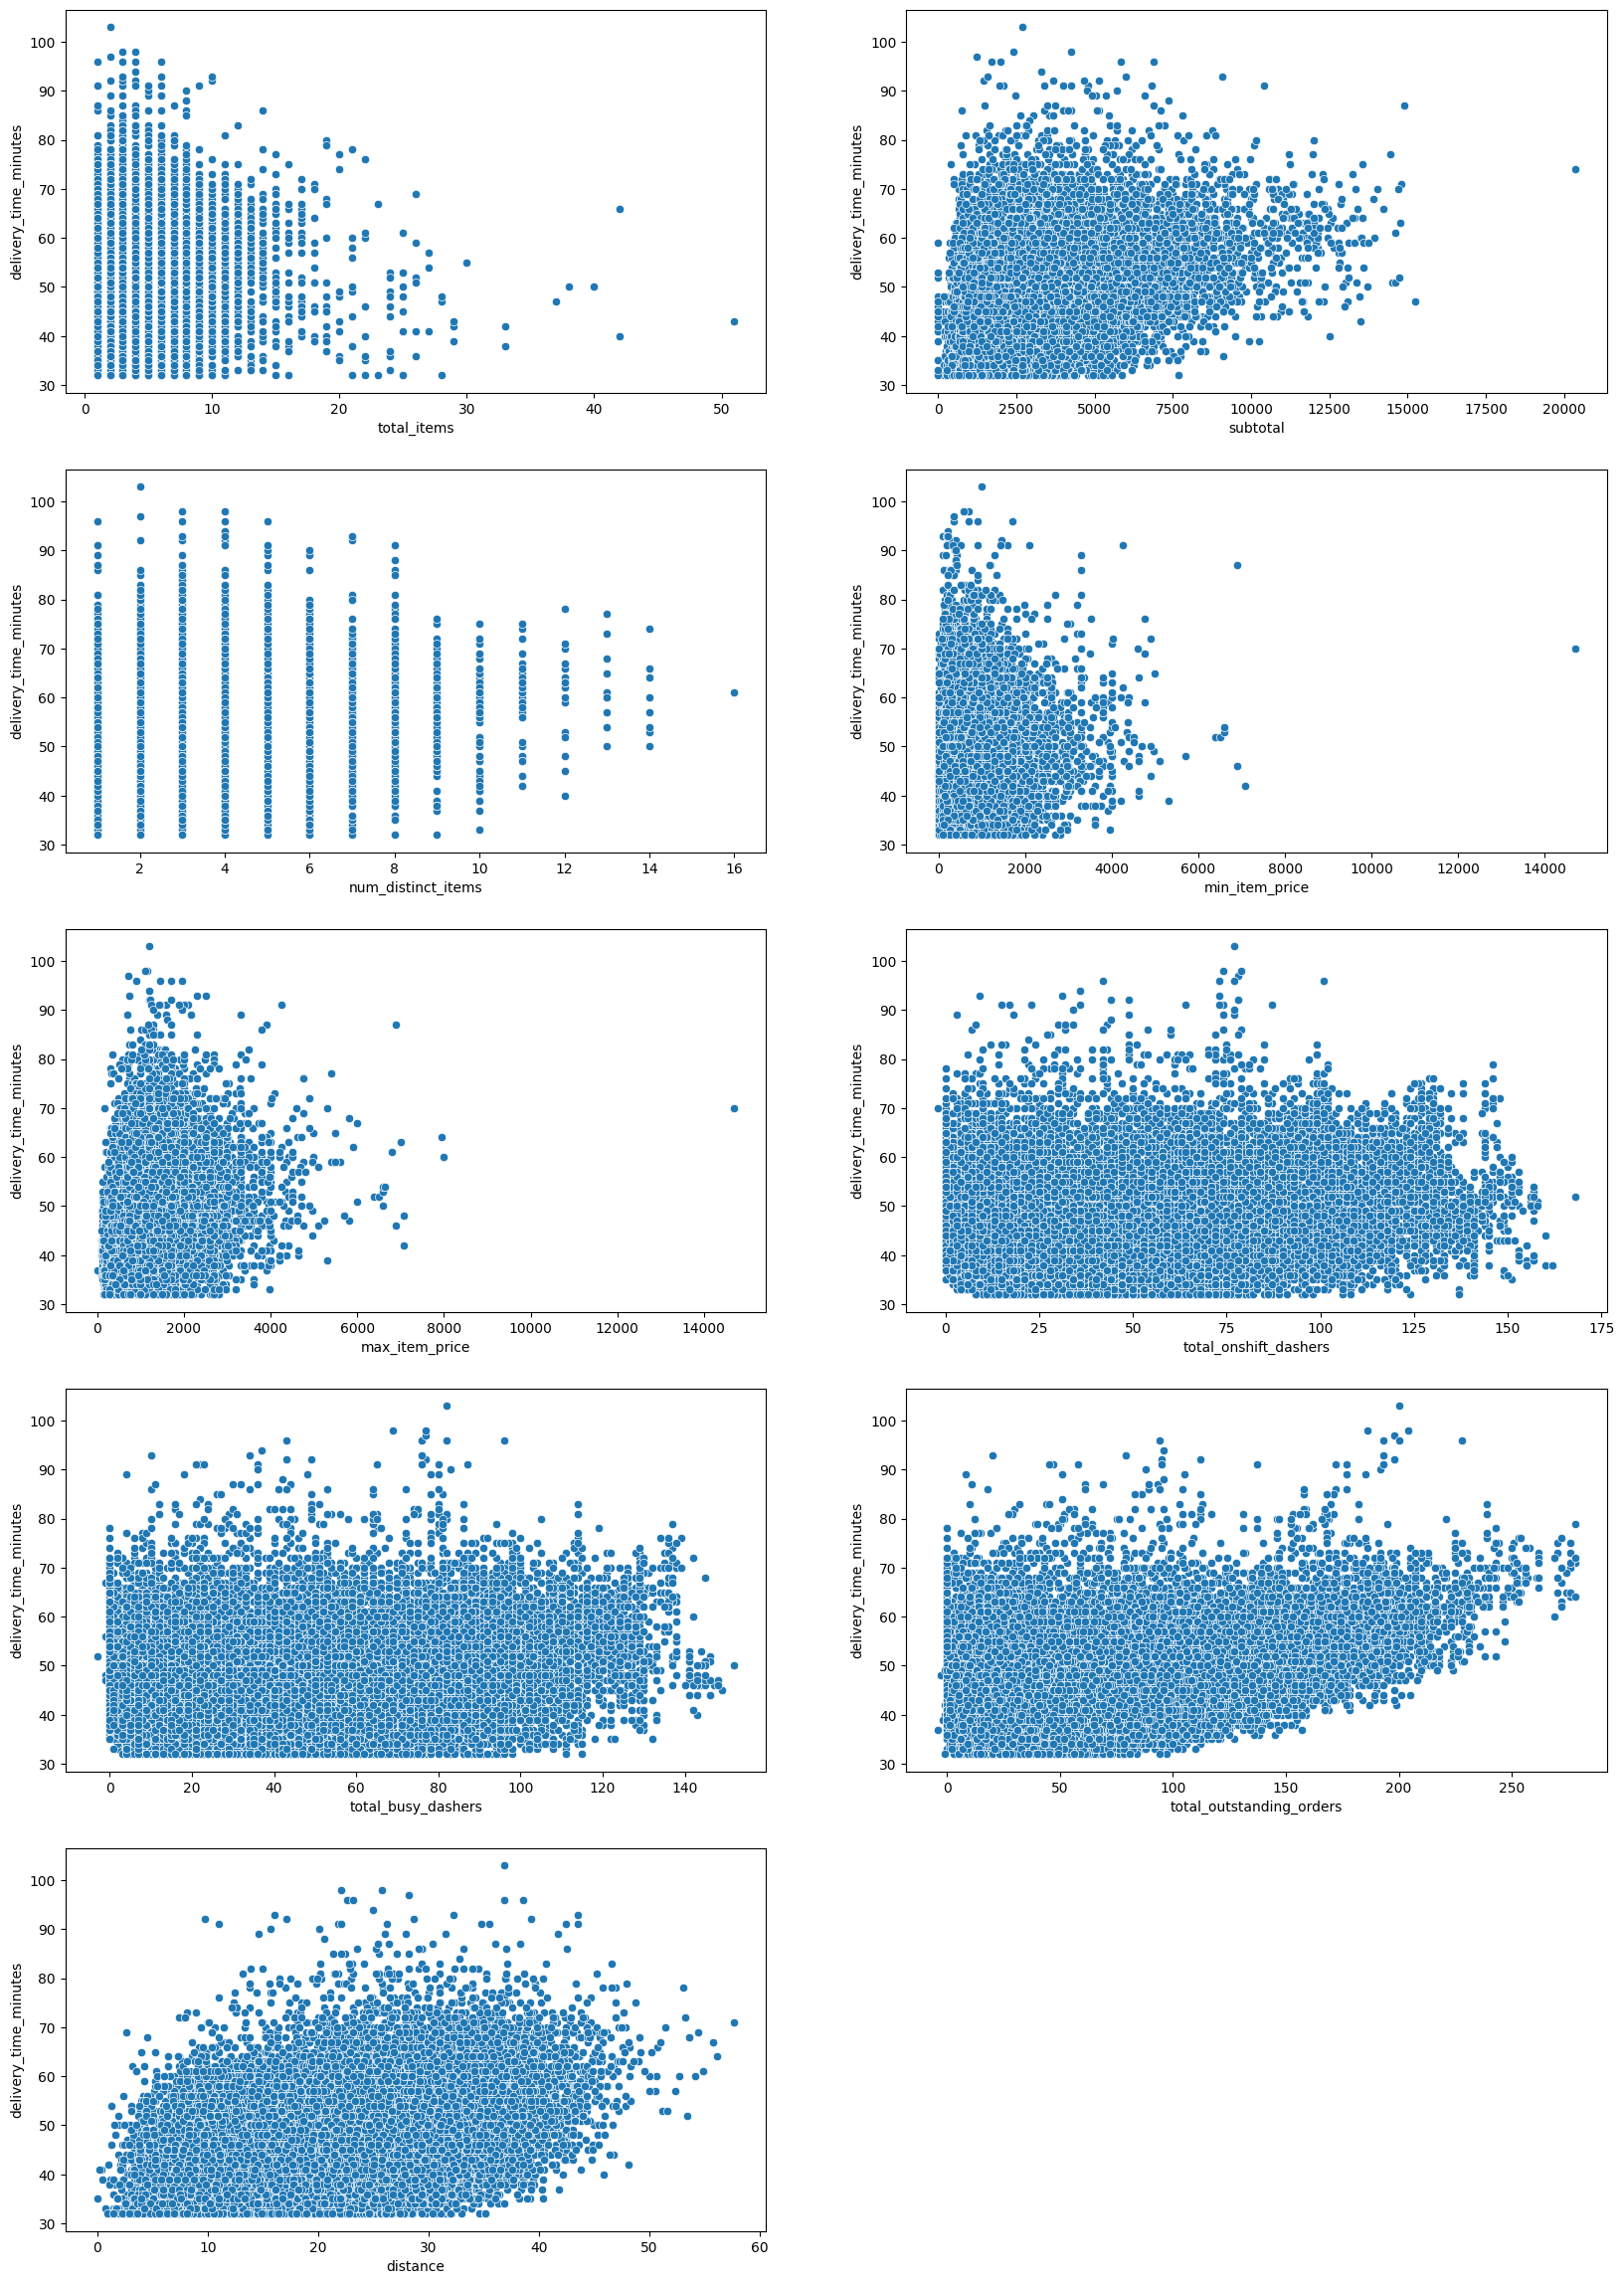

In [112]:
# Scatter plot to visualise the relationship between time_taken and numerical features
plt.figure(figsize=(20, 35))
i = 1
for var in test_num_cols:
    plt.subplot(6,2,i)
    sns.scatterplot(x=X_test[var], y=y_test)
    i += 1
plt.show()

<span style="color: blue;">From above we can see that most of the Numerical Features have relationship with Delivery time except Number of distinct items and from above scatter plots we can understand that `Distance` is having good positive relationship with **Delivery time**.</span>

#### **4.3** Drop the columns with weak correlations with the target variable

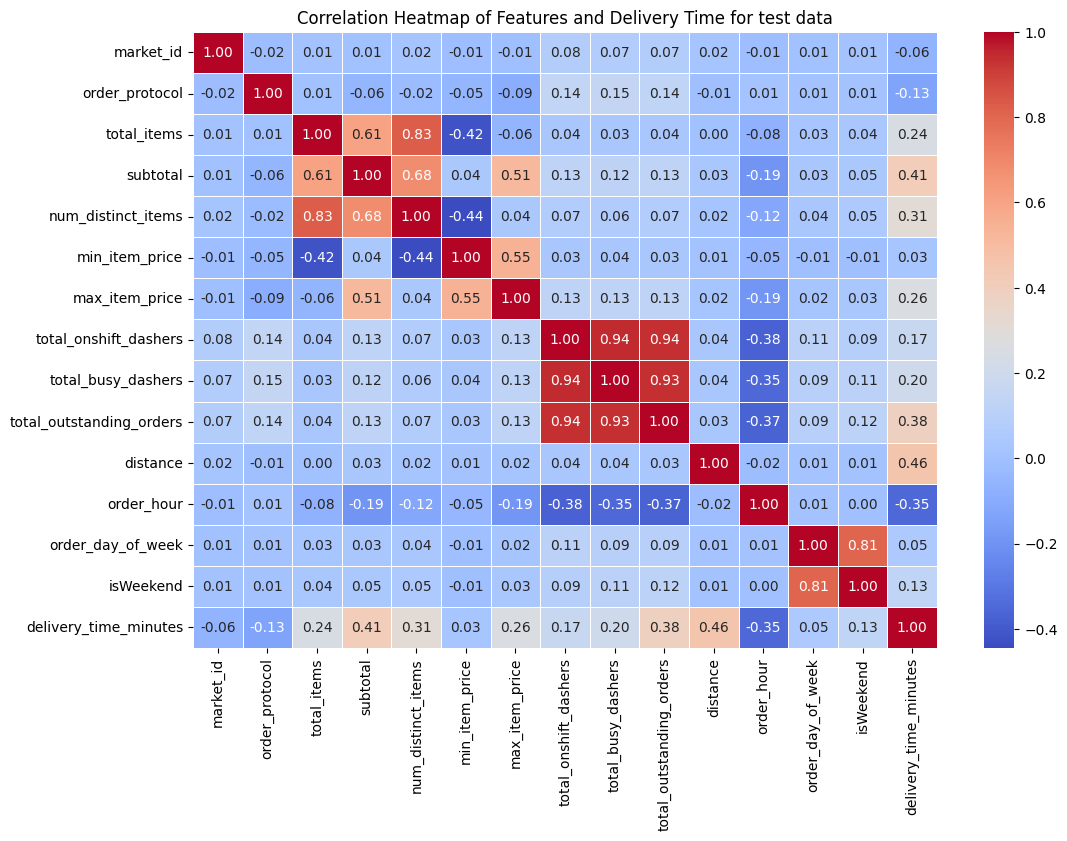

In [113]:
# Plot the heatmap of the correlation matrix
# Combine X_test and y_test for correlation analysis
test_corr = X_test.copy()
test_corr['delivery_time_minutes'] = y_test

# Compute correlation matrix
corr_matrix_test = test_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_test, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set title
plt.title("Correlation Heatmap of Features and Delivery Time for test data")
plt.show()

<span style="color: blue;">From above heatmap we can see that same as train data, for test data too `distance` is having 46% correlation with `delivery_time_minutes` followed by `subtotal` 41% and `total_outstanding_orders` 38% correlation.</span>

<span style="color: blue;">Some independent variables are correlated to each other, which shows **Multicollinearity** like: </span>
- <span style="color: blue;">total_items and num_distinct_items</span>
- <span style="color: blue;">min_item_price and max_item_price</span>
- <span style="color: blue;">total_onshift_dashers, total_busy_dashers and total_outstanding_orders</span>
- <span style="color: blue;">order_day_of_week and isWeekend</span>

In [114]:
# Drop weakly correlated columns from testing dataset
# Set a correlation threshold
threshold = 0.1

# Find features with weak correlation (absolute value < threshold)
weak_features = corr_matrix_test['delivery_time_minutes'][abs(corr_matrix_test['delivery_time_minutes']) < threshold].index

print(f"Dropping features due to weak correlation: {list(weak_features)}")

# Drop weak features from X_train and X_test
X_test_filter = X_test.drop(columns=weak_features)

Dropping features due to weak correlation: ['market_id', 'min_item_price', 'order_day_of_week']


In [115]:
X_test_filter.head()

order_protocol  total_items  subtotal  num_distinct_items  \
50609            1.0            4      2596                   4   
49181            3.0            3      3180                   2   
4526             1.0            1      1199                   1   
131              4.0            5      1590                   4   
57096            5.0            6      3680                   3   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
50609            1099                   55.0                52.0   
49181            1300                  101.0                98.0   
4526             1199                    7.0                 6.0   
131               440                    3.0                 4.0   
57096             750                    9.0                 1.0   

       total_outstanding_orders  distance  order_hour  isWeekend  
50609                      66.0     28.32           2          0  
49181                     192.0     23.56           2          0  
4526                        6.0     14.60           5          0  
131                         4.0     25.64          22          0  
57096                       1.0     16.08          19          1

In [116]:
X_train_filtered.shape, y_train_filtered.shape, X_test_filter.shape, y_test.shape

((130742, 11), (130742,), (35156, 11), (35156,))

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [117]:
# Import libraries

#data preprocessing
from sklearn.preprocessing import StandardScaler

#model training and validation
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Check for the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Checking RFE
from sklearn.feature_selection import RFE

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [118]:
# Apply scaling to the numerical columns

In [119]:
# Initialize scaler
scaler = StandardScaler()

In [120]:
# Fit & transform numerical columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_filtered), columns = X_train_filtered.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_filter), columns = X_test_filter.columns)

In [121]:
X_train_scaled.head()

order_protocol  total_items  subtotal  num_distinct_items  max_item_price  \
0       -0.604102    -1.085390 -1.153475           -1.118244       -0.816473   
1        0.055330    -1.085390 -1.031133           -1.118244       -0.255107   
2        0.055330     0.594588 -0.300578            1.077467       -0.479653   
3       -1.263534    -0.525397 -0.065682           -0.386340        0.652059   
4       -1.263534    -1.085390 -0.727026           -1.118244        0.474668   

   total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0              -0.261873           -0.056038                  0.005515   
1               1.978309            1.005184                  1.217048   
2              -1.128077           -1.213735                 -0.983903   
3              -0.829386           -0.763520                 -0.741597   
4               0.604330            0.201228                 -0.075254   

   distance  order_hour  isWeekend  
0  0.994653    1.408066  -0.719328  
1  1.091669   -0.766207  -0.719328  
2 -0.409768    1.408066  -0.719328  
3  1.354998   -0.651771  -0.719328  
4  1.137867    1.408066  -0.719328

In [122]:
X_test_scaled.head()

order_protocol  total_items  subtotal  num_distinct_items  max_item_price  \
0       -1.263534     0.594588  0.088119            1.077467       -0.021579   
1        0.055330     0.034595  0.496391           -0.386340        0.429759   
2       -1.263534    -1.085390 -0.888517           -1.118244        0.202967   
3        0.714762     1.154580 -0.615171            1.077467       -1.501339   
4        1.374194     1.714573  0.845939            0.345564       -0.805245   

   total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0               0.335509            0.362019                  0.207437   
1               1.709487            1.841299                  2.751657   
2              -1.098208           -1.117260                 -1.004096   
3              -1.217684           -1.181577                 -1.044480   
4              -1.038470           -1.278052                 -1.105057   

   distance  order_hour  isWeekend  
0  0.763663   -0.766207  -0.719328  
1  0.213906   -0.766207  -0.719328  
2 -0.820931   -0.422900  -0.719328  
3  0.454136    1.522502  -0.719328  
4 -0.649998    1.179195   1.390187

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

### <span style="color: blue;">Model 1</span>

In [123]:
X_train_scaled.shape, y_train_filtered.shape

((130742, 11), (130742,))

In [124]:
y_train_final = y_train_filtered.reset_index(drop=True)

In [125]:
y_train_final.head()

0    45.0
1    43.0
2    46.0
3    51.0
4    37.0
Name: delivery_time_minutes, dtype: float64

In [126]:
# Create/Initialise the model
X_train_lm = sm.add_constant(X_train_scaled)

In [127]:
# Train the model using the training data
lr1 = sm.OLS(y_train_final, X_train_lm).fit()

In [128]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_time_minutes   R-squared:                       0.871
Model:                               OLS   Adj. R-squared:                  0.871
Method:                    Least Squares   F-statistic:                 8.011e+04
Date:                   Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                           19:25:05   Log-Likelihood:            -3.3023e+05
No. Observations:                 130742   AIC:                         6.605e+05
Df Residuals:                     130730   BIC:                         6.606e+05
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       45.2916      0.008   5413.854      0.000      45.275      45.308
order_protocol              -1.0047      0.009   -117.579      0.000      -1.021      -0.988
total_items                 -0.0795      0.019     -4.239      0.000      -0.116      -0.043
subtotal                     1.8176      0.016    110.823      0.000       1.785       1.850
num_distinct_items           0.6854      0.017     39.788      0.000       0.652       0.719
max_item_price               0.2520      0.013     20.021      0.000       0.227       0.277
total_onshift_dashers      -11.9684      0.029   -415.150      0.000     -12.025     -11.912
total_busy_dashers          -4.3460      0.028   -157.736      0.000      -4.400      -4.292
total_outstanding_orders    17.0903      0.027    633.282      0.000      17.037      17.143
distance                     4.0365      0.008    481.491      0.000       4.020       4.053
order_hour                  -2.0703      0.009   -224.281      0.000      -2.088      -2.052
isWeekend                    0.6979      0.008     82.643      0.000       0.681       0.714
==============================================================================
Omnibus:                    33663.010   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93352.357
Skew:                           1.370   Prob(JB):                         0.00
Kurtosis:                       6.104   Cond. No.                         7.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
X_test_lm = sm.add_constant(X_test_scaled)

In [130]:
# Make predictions
y_test_pred = lr1.predict(X_test_lm)

In [131]:
y_test_pred.head()

0    49.530172
1    66.491325
2    42.216011
3    43.761325
4    40.348815
dtype: float64

In [132]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2.36
Mean Squared Error (MSE): 11.19
Root Mean Squared Error (RMSE): 3.35
R² Score: 0.8721


<span style="color: blue;">From our **Model 1** we can see that **R²** value with **training data is 0.871** and for **test data is 0.872**. Which is exactly same.</span>

<span style="color: blue;">From Summary of **Model 1**, we can understand that **p-value** for all the features is 0.00 which is less than the threshold value of alpha (i.e. 0.05). This mean these variables are **completely significant with the target variable**.</span>

Note that we have 11 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

#### <span style="color: blue;">Selecting Relevent Features with Recursive Feature Elimination (RFE)</span>

In [133]:
# Loop through the number of features and test the model

##### <span style="color: blue;">Since we have already built model with all predictor features, we will start with n-1 features for RFE model.</span>

#### <span style="color: blue;">Round 1 - with **n-1** features</span>

In [134]:
# Initialize the model
model = LinearRegression()

# Initialize RFE to select the top n-1 features
rfe = RFE(estimator=model, n_features_to_select=(X_train_scaled.shape[1]-1))

In [135]:
# Fit RFE on training data
rfe.fit_transform(X_train_scaled, y_train_filtered)

list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('order_protocol', True, 1),
 ('total_items', False, 2),
 ('subtotal', True, 1),
 ('num_distinct_items', True, 1),
 ('max_item_price', True, 1),
 ('total_onshift_dashers', True, 1),
 ('total_busy_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('order_hour', True, 1),
 ('isWeekend', True, 1)]

In [136]:
# Get selected features
selected_features = X_train_scaled.columns[rfe.get_support()]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['order_protocol', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend'],
      dtype='object')


In [137]:
# Transform data to only keep selected features
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

### <span style="color: blue;">Model 2</span>

In [138]:
# Create/Initialise the model
X_train_lm = sm.add_constant(X_train_selected)

In [139]:
# Train the model using the training data
lr2 = sm.OLS(y_train_final, X_train_lm).fit()

In [140]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_time_minutes   R-squared:                       0.871
Model:                               OLS   Adj. R-squared:                  0.871
Method:                    Least Squares   F-statistic:                 8.810e+04
Date:                   Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                           19:25:05   Log-Likelihood:            -3.3024e+05
No. Observations:                 130742   AIC:                         6.605e+05
Df Residuals:                     130731   BIC:                         6.606e+05
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       45.2916      0.008   5413.503      0.000      45.275      45.308
order_protocol              -1.0052      0.009   -117.644      0.000      -1.022      -0.988
subtotal                     1.7875      0.015    120.855      0.000       1.759       1.817
num_distinct_items           0.6351      0.012     50.897      0.000       0.611       0.660
max_item_price               0.2755      0.011     24.367      0.000       0.253       0.298
total_onshift_dashers      -11.9680      0.029   -415.110      0.000     -12.024     -11.911
total_busy_dashers          -4.3461      0.028   -157.730      0.000      -4.400      -4.292
total_outstanding_orders    17.0904      0.027    633.244      0.000      17.038      17.143
distance                     4.0368      0.008    481.510      0.000       4.020       4.053
order_hour                  -2.0703      0.009   -224.267      0.000      -2.088      -2.052
isWeekend                    0.6977      0.008     82.615      0.000       0.681       0.714
==============================================================================
Omnibus:                    33668.601   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93386.106
Skew:                           1.370   Prob(JB):                         0.00
Kurtosis:                       6.104   Cond. No.                         7.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
X_test_lm = sm.add_constant(X_test_selected)

In [142]:
# Make predictions
y_test_pred = lr2.predict(X_test_lm)

In [143]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2.36
Mean Squared Error (MSE): 11.19
Root Mean Squared Error (RMSE): 3.35
R² Score: 0.8721


<span style="color: blue;">R² Score has been reduced for **Model 2** compared to Model 1, from 0.871 to 0.868. Also Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) everything increased a bit compare to Model 1.</span>

<span style="color: blue;">**Lower MAE & RMSE → Better model performance**</span>

<span style="color: blue;">**R² closer to 1 → Better model explains variance in data**</span>

#### <span style="color: blue;">Round 2 - with **n-2** features</span>

In [144]:
# Initialize the model
model = LinearRegression()

# Initialize RFE to select the top n-2 features
rfe = RFE(estimator=model, n_features_to_select=(X_train_scaled.shape[1]-2))

In [145]:
# Fit RFE on training data
rfe.fit_transform(X_train_scaled, y_train_filtered)

list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('order_protocol', True, 1),
 ('total_items', False, 3),
 ('subtotal', True, 1),
 ('num_distinct_items', True, 1),
 ('max_item_price', False, 2),
 ('total_onshift_dashers', True, 1),
 ('total_busy_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('order_hour', True, 1),
 ('isWeekend', True, 1)]

In [146]:
# Get selected features
selected_features = X_train_scaled.columns[rfe.get_support()]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['order_protocol', 'subtotal', 'num_distinct_items',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend'],
      dtype='object')


In [147]:
# Transform data to only keep selected features
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

### <span style="color: blue;">Model 3</span>

In [148]:
# Create/Initialise the model
X_train_lm = sm.add_constant(X_train_selected)

In [149]:
# Train the model using the training data
lr3 = sm.OLS(y_train_final, X_train_lm).fit()

In [150]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_time_minutes   R-squared:                       0.870
Model:                               OLS   Adj. R-squared:                  0.870
Method:                    Least Squares   F-statistic:                 9.738e+04
Date:                   Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                           19:25:05   Log-Likelihood:            -3.3053e+05
No. Observations:                 130742   AIC:                         6.611e+05
Df Residuals:                     130732   BIC:                         6.612e+05
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       45.2916      0.008   5401.272      0.000      45.275      45.308
order_protocol              -1.0223      0.009   -119.781      0.000      -1.039      -1.006
subtotal                     2.0196      0.011    178.061      0.000       1.997       2.042
num_distinct_items           0.4952      0.011     44.597      0.000       0.473       0.517
total_onshift_dashers      -11.9620      0.029   -413.982      0.000     -12.019     -11.905
total_busy_dashers          -4.3366      0.028   -157.044      0.000      -4.391      -4.282
total_outstanding_orders    17.0882      0.027    631.735      0.000      17.035      17.141
distance                     4.0383      0.008    480.612      0.000       4.022       4.055
order_hour                  -2.0903      0.009   -226.826      0.000      -2.108      -2.072
isWeekend                    0.7025      0.008     83.018      0.000       0.686       0.719
==============================================================================
Omnibus:                    33406.541   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92040.040
Skew:                           1.362   Prob(JB):                         0.00
Kurtosis:                       6.078   Cond. No.                         7.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
X_test_lm = sm.add_constant(X_test_selected)

In [152]:
# Make predictions
y_test_pred = lr3.predict(X_test_lm)

In [153]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2.37
Mean Squared Error (MSE): 11.28
Root Mean Squared Error (RMSE): 3.36
R² Score: 0.8711


<span style="color: blue;">R² Score has been increased slightly for **Model 3** compared to Model 2, from 0.868 to 0.870, but it is less than Model 1. Also Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) everything decreased a bit compare to Model 2, but more than Model 1.</span>

<span style="color: blue;">In all 3 models **Model 1** is having better performance.</span>

#### <span style="color: blue;">Round 3 - with **n-3** features</span>

In [154]:
# Initialize the model
model = LinearRegression()

# Initialize RFE to select the top n-3 features
rfe = RFE(estimator=model, n_features_to_select=(X_train_scaled.shape[1]-3))

In [155]:
# Fit RFE on training data
rfe.fit_transform(X_train_scaled, y_train_filtered)

list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('order_protocol', True, 1),
 ('total_items', False, 4),
 ('subtotal', True, 1),
 ('num_distinct_items', False, 2),
 ('max_item_price', False, 3),
 ('total_onshift_dashers', True, 1),
 ('total_busy_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('order_hour', True, 1),
 ('isWeekend', True, 1)]

In [156]:
# Get selected features
selected_features = X_train_scaled.columns[rfe.get_support()]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['order_protocol', 'subtotal', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'order_hour', 'isWeekend'],
      dtype='object')


In [157]:
# Transform data to only keep selected features
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

### <span style="color: blue;">Model 4</span>

In [158]:
# Create/Initialise the model
X_train_lm = sm.add_constant(X_train_selected)

In [159]:
# Train the model using the training data
lr4 = sm.OLS(y_train_final, X_train_lm).fit()

In [160]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_time_minutes   R-squared:                       0.868
Model:                               OLS   Adj. R-squared:                  0.868
Method:                    Least Squares   F-statistic:                 1.077e+05
Date:                   Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                           19:25:05   Log-Likelihood:            -3.3152e+05
No. Observations:                 130742   AIC:                         6.631e+05
Df Residuals:                     130733   BIC:                         6.631e+05
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       45.2916      0.008   5360.669      0.000      45.275      45.308
order_protocol              -1.0187      0.009   -118.465      0.000      -1.036      -1.002
subtotal                     2.3462      0.009    268.828      0.000       2.329       2.363
total_onshift_dashers      -11.9640      0.029   -410.938      0.000     -12.021     -11.907
total_busy_dashers          -4.3558      0.028   -156.575      0.000      -4.410      -4.301
total_outstanding_orders    17.0905      0.027    627.070      0.000      17.037      17.144
distance                     4.0391      0.008    477.095      0.000       4.023       4.056
order_hour                  -2.0894      0.009   -225.020      0.000      -2.108      -2.071
isWeekend                    0.7102      0.009     83.322      0.000       0.694       0.727
==============================================================================
Omnibus:                    32103.427   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85864.616
Skew:                           1.321   Prob(JB):                         0.00
Kurtosis:                       5.964   Cond. No.                         7.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
X_test_lm = sm.add_constant(X_test_selected)

In [162]:
# Make predictions
y_test_pred = lr4.predict(X_test_lm)

In [163]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2.40
Mean Squared Error (MSE): 11.44
Root Mean Squared Error (RMSE): 3.38
R² Score: 0.8694


<span style="color: blue;">R² Score for **Model 4** is same as Model 2, i.e. 0.868. Also Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) everything is same as Model 2.</span>

<span style="color: blue;">In all 4 models **Model 1** is having better performance.</span>

#### <span style="color: blue;">Round 4 - with **n-4** features</span>

In [164]:
# Initialize the model
model = LinearRegression()

# Initialize RFE to select the top n-4 features
rfe = RFE(estimator=model, n_features_to_select=(X_train_scaled.shape[1]-4))

In [165]:
# Fit RFE on training data
rfe.fit_transform(X_train_scaled, y_train_filtered)

list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('order_protocol', True, 1),
 ('total_items', False, 5),
 ('subtotal', True, 1),
 ('num_distinct_items', False, 3),
 ('max_item_price', False, 4),
 ('total_onshift_dashers', True, 1),
 ('total_busy_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('order_hour', True, 1),
 ('isWeekend', False, 2)]

In [166]:
# Get selected features
selected_features = X_train_scaled.columns[rfe.get_support()]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['order_protocol', 'subtotal', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'order_hour'],
      dtype='object')


In [167]:
# Transform data to only keep selected features
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

### <span style="color: blue;">Model 5</span>

In [168]:
# Create/Initialise the model
X_train_lm = sm.add_constant(X_train_selected)

In [169]:
# Train the model using the training data
lr5 = sm.OLS(y_train_final, X_train_lm).fit()

In [170]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_time_minutes   R-squared:                       0.861
Model:                               OLS   Adj. R-squared:                  0.861
Method:                    Least Squares   F-statistic:                 1.159e+05
Date:                   Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                           19:25:06   Log-Likelihood:            -3.3490e+05
No. Observations:                 130742   AIC:                         6.698e+05
Df Residuals:                     130734   BIC:                         6.699e+05
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       45.2916      0.009   5223.779      0.000      45.275      45.309
order_protocol              -1.0289      0.009   -116.616      0.000      -1.046      -1.012
subtotal                     2.3969      0.009    268.281      0.000       2.379       2.414
total_onshift_dashers      -12.1106      0.030   -406.091      0.000     -12.169     -12.052
total_busy_dashers          -4.2737      0.029   -149.794      0.000      -4.330      -4.218
total_outstanding_orders    17.2180      0.028    616.592      0.000      17.163      17.273
distance                     4.0439      0.009    465.476      0.000       4.027       4.061
order_hour                  -2.0534      0.010   -215.738      0.000      -2.072      -2.035
==============================================================================
Omnibus:                    26295.595   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60059.919
Skew:                           1.149   Prob(JB):                         0.00
Kurtosis:                       5.398   Cond. No.                         7.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
X_test_lm = sm.add_constant(X_test_selected)

In [172]:
# Make predictions
y_test_pred = lr5.predict(X_test_lm)

In [173]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2.48
Mean Squared Error (MSE): 11.77
Root Mean Squared Error (RMSE): 3.43
R² Score: 0.8655


<span style="color: blue;">R² Score has been reduced for **Model 5** compared to all other models to 0.861. Also Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) everything increased a bit compare to all other models.</span>

#### <span style="color: blue;">Hence, from all above 5 models it is clear that as we are reducing the features the R² value is also reducing.</span>

#### <span style="color: blue;">We will consider **Model 1** as final model.</span>

In [174]:
# Build the final model with selected number of features

In [175]:
# Create/Initialise the model
X_train_lm = sm.add_constant(X_train_scaled)

In [176]:
# Train the model using the training data
lr1 = sm.OLS(y_train_final, X_train_lm).fit()

In [177]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_time_minutes   R-squared:                       0.871
Model:                               OLS   Adj. R-squared:                  0.871
Method:                    Least Squares   F-statistic:                 8.011e+04
Date:                   Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                           19:25:06   Log-Likelihood:            -3.3023e+05
No. Observations:                 130742   AIC:                         6.605e+05
Df Residuals:                     130730   BIC:                         6.606e+05
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       45.2916      0.008   5413.854      0.000      45.275      45.308
order_protocol              -1.0047      0.009   -117.579      0.000      -1.021      -0.988
total_items                 -0.0795      0.019     -4.239      0.000      -0.116      -0.043
subtotal                     1.8176      0.016    110.823      0.000       1.785       1.850
num_distinct_items           0.6854      0.017     39.788      0.000       0.652       0.719
max_item_price               0.2520      0.013     20.021      0.000       0.227       0.277
total_onshift_dashers      -11.9684      0.029   -415.150      0.000     -12.025     -11.912
total_busy_dashers          -4.3460      0.028   -157.736      0.000      -4.400      -4.292
total_outstanding_orders    17.0903      0.027    633.282      0.000      17.037      17.143
distance                     4.0365      0.008    481.491      0.000       4.020       4.053
order_hour                  -2.0703      0.009   -224.281      0.000      -2.088      -2.052
isWeekend                    0.6979      0.008     82.643      0.000       0.681       0.714
==============================================================================
Omnibus:                    33663.010   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93352.357
Skew:                           1.370   Prob(JB):                         0.00
Kurtosis:                       6.104   Cond. No.                         7.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
X_test_lm = sm.add_constant(X_test_scaled)

In [179]:
# Make predictions
y_test_pred = lr1.predict(X_test_lm)

In [180]:
# Find results for evaluation metrics

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2.36
Mean Squared Error (MSE): 11.19
Root Mean Squared Error (RMSE): 3.35
R² Score: 0.8721


#### <span style="color: blue;">Check the actual and predicted values</span>

In [202]:
df_predicted = X_test_scaled

In [208]:
df_predicted['delivery_time_actual'] = y_test.reset_index(drop=True)

In [211]:
df_predicted['delivery_time_pred'] = y_test_pred

In [214]:
# Checking actual delivery time vs predicted delivery time
df_predicted[['delivery_time_actual','delivery_time_pred']].head()

delivery_time_actual  delivery_time_pred
0                  50.0           49.530172
1                  69.0           66.491325
2                  41.0           42.216011
3                  45.0           43.761325
4                  40.0           40.348815

### <span style="color: blue;">From above data we can see that the predicted values are very close to actual delivery time. Which means our model is good fit model.</span>

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [181]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

In [182]:
# Calculate residuals
residuals = y_test - y_test_pred

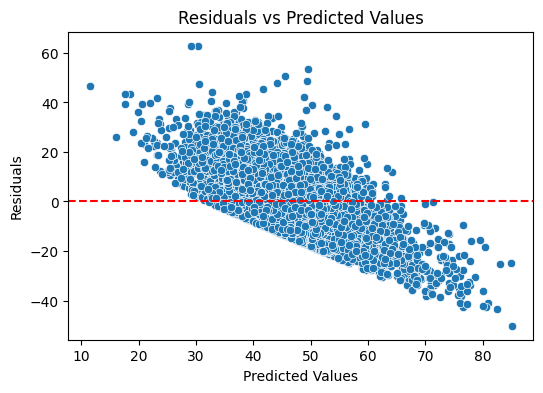

In [183]:
#residuals vs predicted values
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

<span style="color: blue;">From this residuals vs predicted values plot we **cannot find any particular pattern** in the residuals. Means, **residuals are independent**.</span>

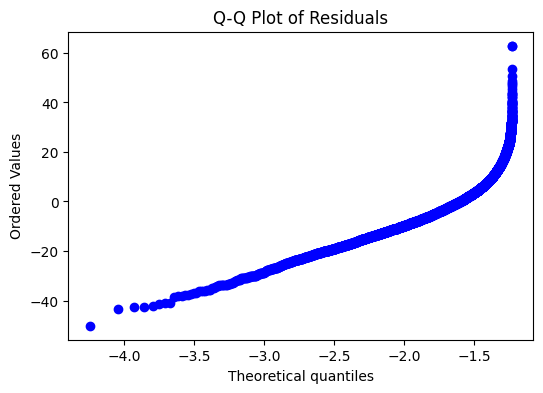

In [184]:
import scipy.stats as stats

#Q-Q plot for Normality Check
plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

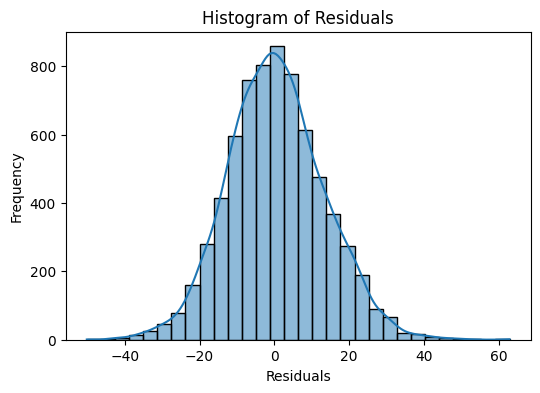

In [185]:
# Residual Histogram
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

<span style="color: blue;">Residuals are normally distributed with mean 0. Which means **Model 1** is a **Good fit model**.</span>

[Your inferences here:]



> 1. <span style="color: blue;">**Residuals vs. Predicted Values**</span>
>     - Since Residuals are randomly scattered around zero with no clear pattern, this is a good model.
> 2. <span style="color: blue;">**Q-Q Plot**</span>
>     - Since Residuals are following a straight diagonal line, this is a good model.
> 3. <span style="color: blue;">**Histogram of Residuals**</span>
>     - Since Residuals are following a normal (bell-shaped) distribution, this is a good fit model.

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [186]:
# Compare the scaled vs unscaled features used in the final model

In [187]:
# Get model coefficients
coefficients = lr1.params

In [188]:
coef_df = coefficients.reset_index(name = 'scaled_coef')

In [189]:
X_train_final = X_train_filtered.reset_index(drop=True)

In [190]:
# Create/Initialise the model with unscaled data
X_train_lm = sm.add_constant(X_train_final)

In [191]:
# Train the model using the unsclaed training data
lr_unscale = sm.OLS(y_train_final, X_train_lm).fit()

In [192]:
lr_unscale.params

const                       35.867868
order_protocol              -0.662508
total_items                 -0.044541
subtotal                     0.001271
num_distinct_items           0.501671
max_item_price               0.000566
total_onshift_dashers       -0.357486
total_busy_dashers          -0.139760
total_outstanding_orders     0.345092
distance                     0.466200
order_hour                  -0.236912
isWeekend                    1.472166
dtype: float64

In [193]:
coef_df['Unscaled Coefficient'] = lr_unscale.params.values

In [194]:
coef_df

index  scaled_coef  Unscaled Coefficient
0                      const    45.291643             35.867868
1             order_protocol    -1.004664             -0.662508
2                total_items    -0.079539             -0.044541
3                   subtotal     1.817582              0.001271
4         num_distinct_items     0.685433              0.501671
5             max_item_price     0.251992              0.000566
6      total_onshift_dashers   -11.968431             -0.357486
7         total_busy_dashers    -4.345996             -0.139760
8   total_outstanding_orders    17.090346              0.345092
9                   distance     4.036533              0.466200
10                order_hour    -2.070265             -0.236912
11                 isWeekend     0.697869              1.472166

<span style="color: blue;">Key Takeaways from Scaled and Unscaled Coefficient:</span>

| Feature                   | Interpretation                                                                              |
|---------------------------|---------------------------------------------------------------------------------------------|
| order_protocol            | A higher protocol value decreases delivery time, meaning certain order methods are faster.  |
| total_items               | More items slightly reduce delivery time, possibly due to batch efficiency.                 |
| subtotal                  | A higher order value has almost no effect on delivery time.                                 |
| num_distinct_items        | More variety in an order increases delivery time, likely due to preparation complexity.     |
| max_item_price            | More expensive items slightly increase delivery time, likely due to food preparation time.  |
| total_onshift_dashers     | More available dashers reduce delivery time significantly.                                  |
| total_busy_dashers        | More busy dashers slightly reduce delivery time, possibly due to efficient route batching.  |
| total_outstanding_orders  | More pending orders increase delivery time, suggesting delivery congestion.                 |
| distance                  | Most important predictor—Distance strongly increases delivery time.                         |
| order_hour                | Later orders are delivered faster, possibly due to less traffic or fewer restaurant orders. |
| IsWeekend                 | Deliveries on weekends take longer, likely due to higher demand and traffic.                |

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [195]:
# Analyze the effect of a unit change in a feature, say 'total_items'

In [196]:
unscaled_coef_total_items = coef_df[coef_df['index']=='total_items']['Unscaled Coefficient'].values[0]

In [197]:
scaled_coef_total_items = coef_df[coef_df['index']=='total_items']['scaled_coef'].values[0]

In [198]:
# Standard deviation of 'total_items' from training data
std_total_items = X_train_filtered['total_items'].std()

In [199]:
# Effect of a unit change in 'total_items' using unscaled coefficient
effect_unscaled = unscaled_coef_total_items * 1  # Since we are changing by 1 unit

# Effect of a unit change in 'total_items' using scaled coefficient
effect_scaled = scaled_coef_total_items * std_total_items 

In [200]:
# Display results
print(f"Effect of 1 additional item (Unscaled Coefficient): {effect_unscaled:.4f} minutes")
print(f"Effect of 1 additional item (Scaled Coefficient): {effect_scaled:.4f} minutes")

Effect of 1 additional item (Unscaled Coefficient): -0.0445 minutes
Effect of 1 additional item (Scaled Coefficient): -0.1420 minutes


In [201]:
# Effect of a 3-unit change in 'total_items' using the unscaled coefficient
effect_unscaled_3 = unscaled_coef_total_items * 3  

# Effect of a 3-unit change in 'total_items' using the scaled coefficient
effect_scaled_3 = scaled_coef_total_items * std_total_items * 3  

# Display the results
print(f"Effect of increasing 'total_items' by 3 (Unscaled): {effect_unscaled_3:.4f} minutes")
print(f"Effect of increasing 'total_items' by 3 (Scaled): {effect_scaled_3:.4f} minutes")


Effect of increasing 'total_items' by 3 (Unscaled): -0.1336 minutes
Effect of increasing 'total_items' by 3 (Scaled): -0.4261 minutes


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

> <span style="color: blue;">If effect_unscaled = -0.04, it means that increasing total_items by 1 unit would decrease delivery time by 0.04 minutes.</span>
>
> <span style="color: blue;">If effect_scaled = -0.14, it means that in the standardized scale, a 1-unit increase results in a 0.14 minute decrease in delivery time.</span>
>
> <span style="color: blue;">If effect_unscaled_3 = -0.13, it means that increasing total_items by 3 units would decrease delivery time by 0.13 minutes.</span>
>
> <span style="color: blue;">If effect_scaled_3 = -0.42, it means that in the standardized scale, a 3-unit increase results in a 0.42 minute decrease in delivery time.</span>

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Yes there are categorical Variables in the data.
> - **market_id** - This variable has a very weak relationship with delivery time.
> - **store_primary_category** - This is type of restaurant like fast food, dine-in etc. Restaurant type does not have any effect on delivery time.
> - **order_protocol** - If some protocols involve manual confirmation (e.g., phone orders), they may increase the order processing time and then delivery time too. Automated order placement methods (via an app) might be faster.
> - **isWeekend** - Orders placed on weekends might take longer time due to higher demand, traffic congestion, or restaurant workload.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> - In train-test splitting, the parameter `test_size=0.2` refers to the proportion of the dataset that will be allocated to the test set.
> - This means 20% of the total data will be used for testing purpose and 80% of the total data will be used to Train the model.
> - A proper splitting of data in train and test datasets ensure that the model is trained with one portion of the data and evaluated with another portion of unseen data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Looking at the heatmap, variable `distance` has the highest (i.e. 0.46) positive correlation with target variable `delivery_time_minutes`. This means that with increase in distance the delivery time also increases.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
> My Approach to detect outliers:
> - **Boxplots (Visual Inspection)**
>      - I used box plots to visualise the outliers in the numerical features.
>      - Outliers appear as points outside the whiskers of the boxplot.
>      - **Inference**: Some features has extreme values which suggests extreme outliers.
> - **Z-Score Method (Statistical Approach)**
>      - A Z-Score method measures how many standard deviations a data point is from the mean.
>      - Generally a data point with |Z-Score| > 3 were considered as an Outliers.
>      - **Inference**: High absolute Z-scores indicate extreme outliers.
> - **IQR Method (Interquartile Range)**
>      - IQR = Q3 - Q1, where Q1 = 25th percentile, Q3 = 75th percentile
>      - Outlier Rule: Any value below (Q1 - 1.5IQR) or above (Q3 + 1.5IQR) is considered an outlier.
>
> My Approach to address outliers:
> - **Removal of Extreme Outliers**
>      - I have checked the percentage of data with outliers, it mostly less than 2-3 % hence I have dropped the rows with extreme outlier values.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Based on the final model, below top 3 features are significantly affecting the delivery time:
> - **Total Outstanding Orders (Coefficient: 17.09)**
>      - Total Outstanding orders has highest coefficient means, when total outstanding orders increases the delivery time also increase.
>      - Reason: More outstanding orders is a sign of a higher workload for delivery person, which will lead to longer wait times before an order is picked up.
> - **Distance (Coefficient: 4.04)**
>      - A positive coefficient indicates that an increase in delivery distance leads to a longer delivery time.
>      - Reason: Longer distances naturally result in longer travel times plus traffic for delivery partners.
> - **Total On-Shift Dashers (Coefficient: -11.97)**
>      - A negative coefficient means that as the number of available delivery partners increases, delivery time decreases.
>      - Reason: More available dashers ensure that orders are picked up and delivered faster, reducing wait times which lowers the delivery time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear Regression is **supervised learning algorithm** used for predicting continuous dependent variable (target) based on one or many independent variables (features). With the use of this algorithm we can find best fit line which minimizes the error between the actual values and predicted values.
> There are 2 types of Linear Regressions:
> 1.  **Simple Linear Regression**:
>      - This involves **one dependent** variable and **one independent** variable to predict dependent variable.
>      - The relaionship between dependent and independent variable is modeled as:
>      - $ Y=mX+c $
> 2. **Multiple Linear Regression**:
>      - This involves **one depedent** variable and **multiple independent** variables to predict dependent variable.
>      - The relaionship between dependent and independent variables is modeled as:
>      - $ Y = b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n $
>
> Working of Linear Regression Algorithm:
> 1. **Step 1: Understanding the Relationship Between Variables**
>      - We assume that the dependent variable 𝑌 has a linear relationship with the independent variables X.
>      - We fit a straight line that best captures this relationship.
> 2. **Cost Function (Error Measurement)**
>      - The model calculates errors by comparing the predicted and actual values.
>      - The most common error metric used is Mean Squared Error (MSE).
> 3. **Optimization (Finding the Best Fit Line)**
>      - The goal is to minimize the MSE by finding the optimal coefficients.
>      - This is done using Gradient Descent or Ordinary Least Squares (OLS).
> 4. **Model Evaluation**
>      - The model's performance is measured using metrics like:
>      - **Mean Absolute Error (MAE)**: Measures average absolute differences.
>      - **Mean Squared Error (MSE)**: Penalizes larger errors.
>      - **Root Mean Squared Error (RMSE)**: More interpretable version of MSE.
>      - **R² Score**: Measures the proportion of variance explained by the model.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> The difference between Simple Linear Regression and Multiple Linear Regression:</span>

| Feature                              | Simple Linear Regression                             | Multiple Linear Regression                           |
|--------------------------------------|------------------------------------------------------|------------------------------------------------------|
| **Definition**                       | relationship between one independent variable and    | relationship between multiple independent variables  |
|                                      | one dependent variable.                              | and one dependent variable.                          |
| **Equation**                         | $Y=b_0 + b_1X_1$                                     | $Y=b_0+b_1X_1+b_2X_2+...+b_nX_n$                     |
| **Number of Independent Variables**  | Only one independent variable (predictor).           | Two or more independent variables (predictors).      |
| **Complexity**                       | Simple to understand and interpret.                  | More complex due to multiple predictors.             |
| **Visualization**                    | Can be represented on a 2D graph (straight line).    | Cannot be visualized easily beyond 3D (higher-       |
|                                      |                                                      | dimensional space).                                  |
| **Use Case**                         | Used when there is only one influencing factor.      | Used when multiple factors influence the dependent   |
|                                      |                                                      | variable.                                            |
| **Example**                          | Predicting sales based on marketing spend on TV.     | Predicting house price based on area, location and   |
|                                      |                                                      | number of rooms.                                     |



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> Role of Cost function in Linear Regression:
> - The cost function in linear regression measures how well the model’s predictions match the actual values. It quantifies the error between predicted values $\hat{Y}$ and actual values $Y$.
> - The most commonly used cost function in linear regression is Mean Squared Error (MSE).
> - $MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$
> - where $Y_i$ = Actual Values, $\hat{Y}_i$ = Predicted Values, $n$ = Number of Observations
> - Minimizing the cost function helps us find the best-fit line that reduces the prediction error and improves model’s accuracy.
> - There are many optimization techniques to minimize the cost function:
>      - 1. **Ordinary Least Squares (OLS)**: Finds the best-fit line by solving for coefficients analytically.
>             - $β=(X^TX)^{-1}X^TY$
>             - where $𝑋$ is the matrix of input features and $𝑌$ is the target variable.
>      - 2. **Gradient Descent (GD)**: Iterative approach to minimize the cost function.
>             - Updates coefficients using $b_j:=b_j - α \frac{∂J}{∂b_j}$
>             - where $𝛼$ = Learning rate (step size) and $\frac{∂J}{∂b_j}$ = Partial derivative of the cost function w.r.t. coefficient $b_j$.
> - The cost function evaluates model accuracy.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**
> The difference between Overfitting and Underfitting:</span>

| Feature                              | Overfitting                                          | Underfitting                                         |
|--------------------------------------|------------------------------------------------------|------------------------------------------------------|
| **Definition**                       | The model learns the training data too well,         | The model is too simple and fails to capture the     |
|                                      | including noise, leading to poor generalization on   | patterns in the data.                                |
|                                      | new data.                                            |                                                      |
| **Performance on Training Data**     | High accuracy (low error).                           | Low accuracy (high error).                           |
| **Performance on Test Data**         | Poor generalization (high error).                    | Poor performance (high error).                       |
| **Bias-Variance Tradeoff**           | Low bias, high variance.                             | High bias, low variance.                             |
| **Cause**                            | Too many features or overly complex model.           | Too few features or overly simple model.             |
| **Visualization**                    | The model fits training data too closely and         | The model fails to capture important patterns in the |
|                                      | fails to generalize.                                 | data.                                                |



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> A residual plot helps assess the validity of a linear regression model by visualizing the residuals (errors) between predicted and actual values. It plots residuals on the Y-axis and predicted values on the X-axis.
> Through Residual Plot we check for 4 assumptions of Linear Regressions:
>    1. **Residuals should be randomly scattered around zero** - If there is any pattern or any curve in residual plot then the relationship may be non-linear, suggesting that linear regression is not the best fit.
>    2. **Detecting Heteroscedasticity** - Residuals should have constant spread across all values. If the spread increases or decreases systematically (e.g., forming a funnel shape), it indicates heteroscedasticity, violating the assumption of constant variance.
>    3. **Residuals should show no correlation** - If residuals display a pattern (e.g., cyclical behaviour), there might be autocorrelation between the variables.
>    4. **Detecting Outliers**: There should not be any extreme residuals. Large residuals suggest outliers which may mislead the model while doing predictions.